In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from tabulate import tabulate
crime_data = pd.read_csv('C:/Users/Sandi/Downloads/Crime1.csv',
                           sep= ',', header= 0)


print(tabulate(crime_data.head(), tablefmt="grid", headers="keys"))


+----+-----------------+----------------+------------------------------+-------------+--------------+----------------+---------------------------+----------+---------+
|    | Dates           | Category       | Descript                     | DayOfWeek   | PdDistrict   | Resolution     | Address                   |        X |       Y |
+====+=================+================+==============================+=============+==============+================+===========================+==========+=========+
|  0 | 5/13/2015 23:53 | WARRANTS       | WARRANT ARREST               | Wednesday   | NORTHERN     | ARREST, BOOKED | OAK ST / LAGUNA ST        | -122.426 | 37.7746 |
+----+-----------------+----------------+------------------------------+-------------+--------------+----------------+---------------------------+----------+---------+
|  1 | 5/13/2015 23:53 | OTHER OFFENSES | TRAFFIC VIOLATION ARREST     | Wednesday   | NORTHERN     | ARREST, BOOKED | OAK ST / LAGUNA ST        | -122.426 | 37

In [2]:
print(crime_data.shape)
columnsTitles=['Category', 'Dates', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y']
crime_data=crime_data.reindex(columns=columnsTitles)
crime_data= crime_data[:3000]
print(tabulate(crime_data.head(), tablefmt="grid", headers="keys"))


(3000, 9)
+----+----------------+-----------------+------------------------------+-------------+--------------+----------------+---------------------------+----------+---------+
|    | Category       | Dates           | Descript                     | DayOfWeek   | PdDistrict   | Resolution     | Address                   |        X |       Y |
+====+================+=================+==============================+=============+==============+================+===========================+==========+=========+
|  0 | WARRANTS       | 5/13/2015 23:53 | WARRANT ARREST               | Wednesday   | NORTHERN     | ARREST, BOOKED | OAK ST / LAGUNA ST        | -122.426 | 37.7746 |
+----+----------------+-----------------+------------------------------+-------------+--------------+----------------+---------------------------+----------+---------+
|  1 | OTHER OFFENSES | 5/13/2015 23:53 | TRAFFIC VIOLATION ARREST     | Wednesday   | NORTHERN     | ARREST, BOOKED | OAK ST / LAGUNA ST        | -12

In [3]:
# new data frame with split value columns 
new = crime_data["Dates"].str.split(" ", n = 1, expand = True) 
  
# making seperate date column from Dates Column 
crime_data["Date"]= new[0] 
  
# making seperate time column from Dates Column 
crime_data["Time"]= new[1] 
  
# Dropping old Dates columns 
crime_data.drop(columns =["Dates"], inplace = True) 

print(tabulate(crime_data.head(), tablefmt="grid", headers="keys"))

+----+----------------+------------------------------+-------------+--------------+----------------+---------------------------+----------+---------+-----------+--------+
|    | Category       | Descript                     | DayOfWeek   | PdDistrict   | Resolution     | Address                   |        X |       Y | Date      | Time   |
+====+================+==============================+=============+==============+================+===========================+==========+=========+===========+========+
|  0 | WARRANTS       | WARRANT ARREST               | Wednesday   | NORTHERN     | ARREST, BOOKED | OAK ST / LAGUNA ST        | -122.426 | 37.7746 | 5/13/2015 | 23:53  |
+----+----------------+------------------------------+-------------+--------------+----------------+---------------------------+----------+---------+-----------+--------+
|  1 | OTHER OFFENSES | TRAFFIC VIOLATION ARREST     | Wednesday   | NORTHERN     | ARREST, BOOKED | OAK ST / LAGUNA ST        | -122.426 | 37.77

+-----------------------------+---------+
| Category                    |   Count |
+=============================+=========+
| LARCENY/THEFT               |     821 |
+-----------------------------+---------+
| NON-CRIMINAL                |     379 |
+-----------------------------+---------+
| OTHER OFFENSES              |     354 |
+-----------------------------+---------+
| ASSAULT                     |     242 |
+-----------------------------+---------+
| VEHICLE THEFT               |     205 |
+-----------------------------+---------+
| VANDALISM                   |     134 |
+-----------------------------+---------+
| BURGLARY                    |     127 |
+-----------------------------+---------+
| WARRANTS                    |     112 |
+-----------------------------+---------+
| SUSPICIOUS OCC              |     100 |
+-----------------------------+---------+
| MISSING PERSON              |      99 |
+-----------------------------+---------+
| ROBBERY                     |   

<Figure size 432x288 with 0 Axes>

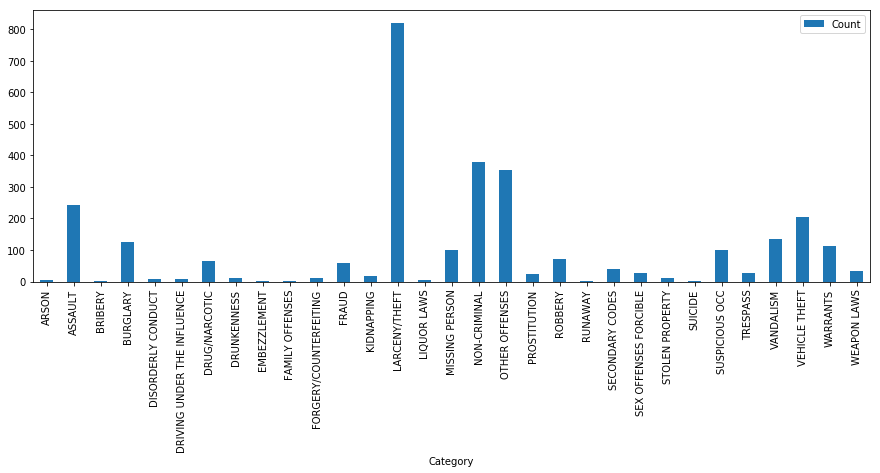

In [4]:
# BR1: Find the total count of offenses in each category
columnsTitles=['Category', 'Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br1 = df_temp.groupby(['Category'], as_index = True).sum()
plt.figure()
plt.rcParams['figure.figsize'] = [15, 5]
df_br1.plot.bar()
df_br1 = df_br1.sort_values(['Count'], ascending = False)
print(tabulate(df_br1, tablefmt="grid", headers="keys"))


In [5]:
#BR2: Find the place of most occurrences of offenses (as a whole and category wise)
columnsTitles=['Category', 'Address', 'Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br2_1 = df_temp.groupby(['Address'], as_index = True).sum()

df_br2_2 = df_temp.groupby(['Category','Address'], as_index = False).sum()
df_br2_2 = df_br2_2.sort_values(['Category'], ascending = True)
idx = df_br2_2.groupby(['Category'])['Count'].transform(max) == df_br2_2['Count']
print('\n Maximum count of offenses in the area per category:')
print(tabulate(df_br2_2[idx], tablefmt="grid", headers="keys"))

print('Maximum count of offense in the area:')
print(df_br2_1.loc[df_br2_1['Count'].idxmax()])


 Maximum count of offenses in the area per category:
+------+-----------------------------+-----------------------------+---------+
|      | Category                    | Address                     |   Count |
+======+=============================+=============================+=========+
|    0 | ARSON                       | 1400 Block of SELBY ST      |       1 |
+------+-----------------------------+-----------------------------+---------+
|    1 | ARSON                       | 1800 Block of MARKET ST     |       1 |
+------+-----------------------------+-----------------------------+---------+
|    2 | ARSON                       | 200 Block of 11TH AV        |       1 |
+------+-----------------------------+-----------------------------+---------+
|    3 | ARSON                       | 200 Block of FOLSOM ST      |       1 |
+------+-----------------------------+-----------------------------+---------+
|    4 | ARSON                       | 200 Block of MCALLISTER ST  |       1 

Maximum number of offenses in the District:
Count    525
Name: SOUTHERN, dtype: int64

Maximum number of offenses in the District per category:
+-----+-----------------------------+--------------+---------+
|     | Category                    | PdDistrict   |   Count |
+=====+=============================+==============+=========+
|  81 | LARCENY/THEFT               | SOUTHERN     |     195 |
+-----+-----------------------------+--------------+---------+
| 114 | OTHER OFFENSES              | SOUTHERN     |      62 |
+-----+-----------------------------+--------------+---------+
|  98 | NON-CRIMINAL                | CENTRAL      |      56 |
+-----+-----------------------------+--------------+---------+
|   7 | ASSAULT                     | MISSION      |      48 |
+-----+-----------------------------+--------------+---------+
| 191 | VEHICLE THEFT               | MISSION      |      37 |
+-----+-----------------------------+--------------+---------+
| 185 | VANDALISM                   |

<Figure size 1080x360 with 0 Axes>

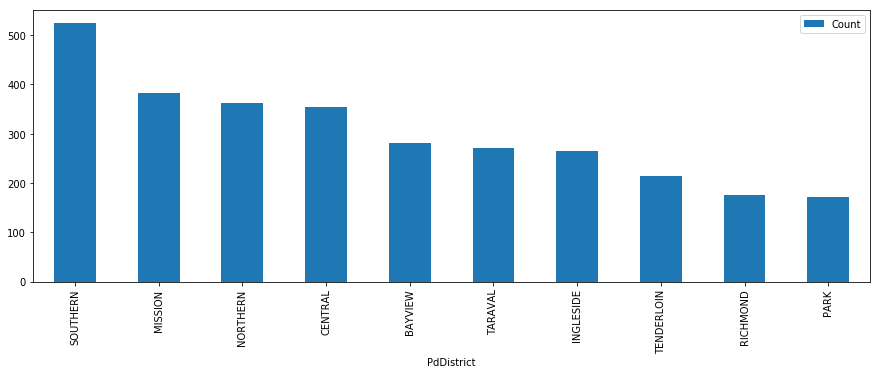

In [6]:
#BR3: Find the District having highest number of offenses (as a whole and category wise)
columnsTitles=['Category', 'PdDistrict', 'Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br3_1 = df_temp.groupby(['PdDistrict'], as_index = True).sum()
print('Maximum number of offenses in the District:')
print(df_br3_1.loc[df_br3_1['Count'].idxmax()])
df_br3_2 = df_temp.groupby(['Category','PdDistrict'], as_index = False).sum()
df_br3_2 = df_br3_2.sort_values(['Count'], ascending = False)
idx = df_br3_2.groupby(['Category'])['Count'].transform(max) == df_br3_2['Count']
print('\nMaximum number of offenses in the District per category:')
print(tabulate(df_br3_2[idx], tablefmt="grid", headers="keys"))

columnsTitles=['PdDistrict', 'Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br3_3 = df_temp.groupby(['PdDistrict'], as_index = True).sum()
df_br3_3 = df_br3_3.sort_values(['Count'], ascending = False)
print('\nTotal count of offenses in districts')
print(tabulate(df_br3_3, tablefmt="grid", headers="keys"))
plt.figure()
df_br3_3.plot.bar()

Maximum count of offenses in the DayOfWeek:
Count    689
Name: Wednesday, dtype: int64

Maximum count of offenses in the DayOfWeek per category:
+-----+-----------------------------+-------------+---------+
|     | Category                    | DayOfWeek   |   Count |
+=====+=============================+=============+=========+
|  66 | LARCENY/THEFT               | Wednesday   |     196 |
+-----+-----------------------------+-------------+---------+
|  84 | NON-CRIMINAL                | Wednesday   |      85 |
+-----+-----------------------------+-------------+---------+
|  91 | OTHER OFFENSES              | Wednesday   |      85 |
+-----+-----------------------------+-------------+---------+
|  10 | ASSAULT                     | Wednesday   |      52 |
+-----+-----------------------------+-------------+---------+
| 152 | VEHICLE THEFT               | Wednesday   |      45 |
+-----+-----------------------------+-------------+---------+
| 159 | WARRANTS                    | Wednesday  

<Figure size 1080x360 with 0 Axes>

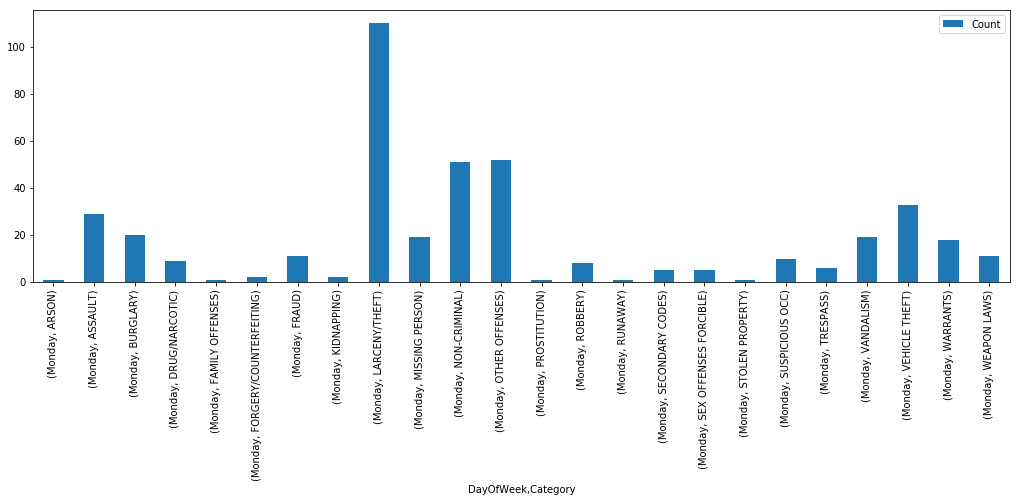

<Figure size 1260x360 with 0 Axes>

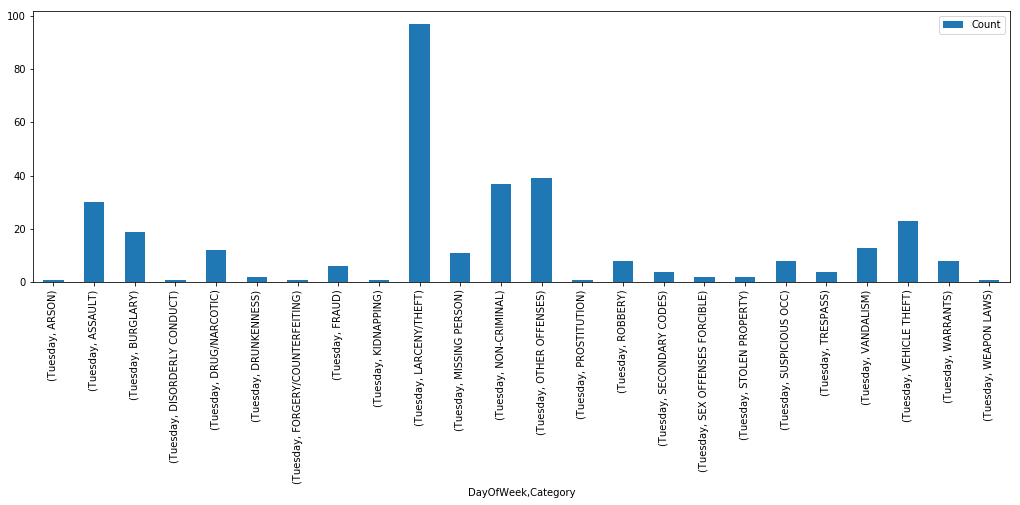

<Figure size 1260x360 with 0 Axes>

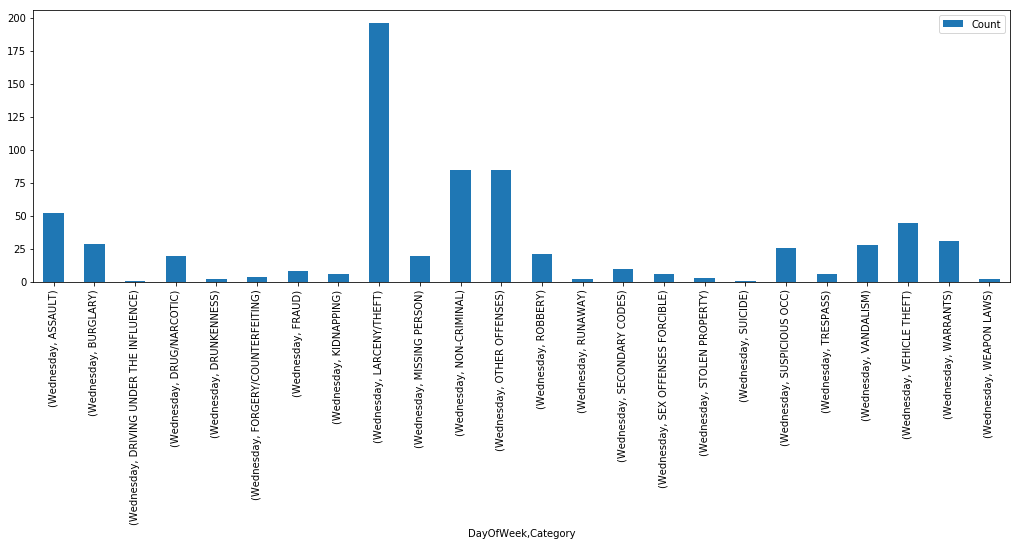

<Figure size 1260x360 with 0 Axes>

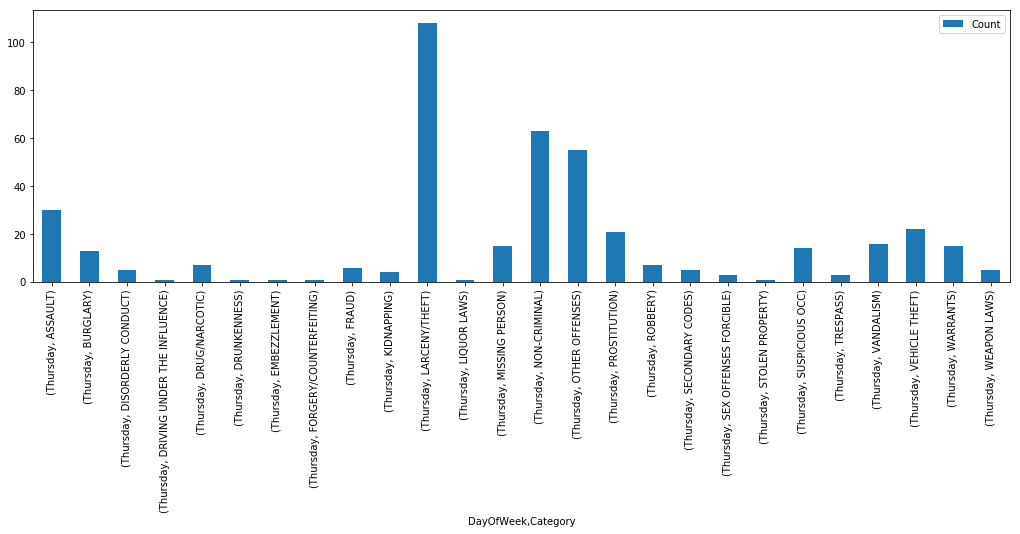

<Figure size 1260x360 with 0 Axes>

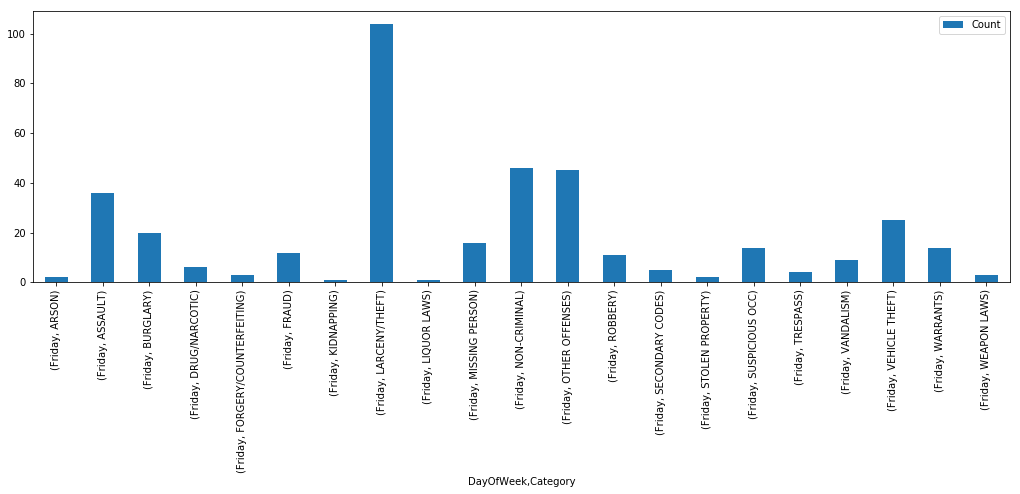

<Figure size 1260x360 with 0 Axes>

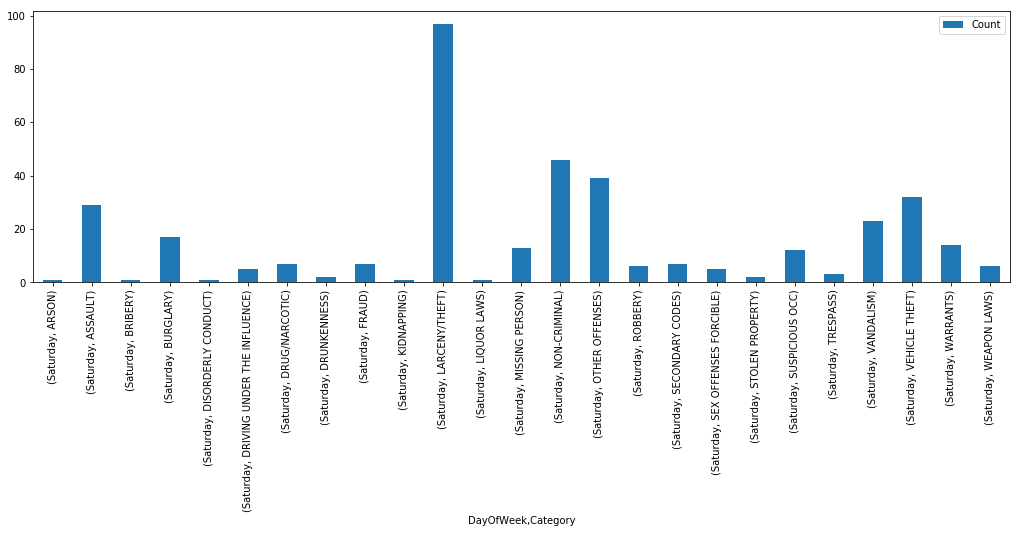

<Figure size 1260x360 with 0 Axes>

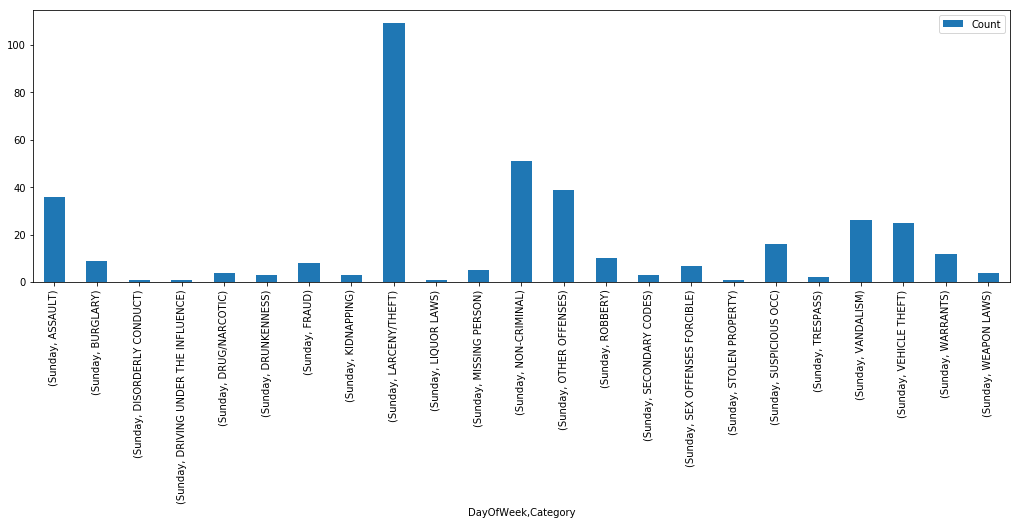

<Figure size 1260x360 with 0 Axes>

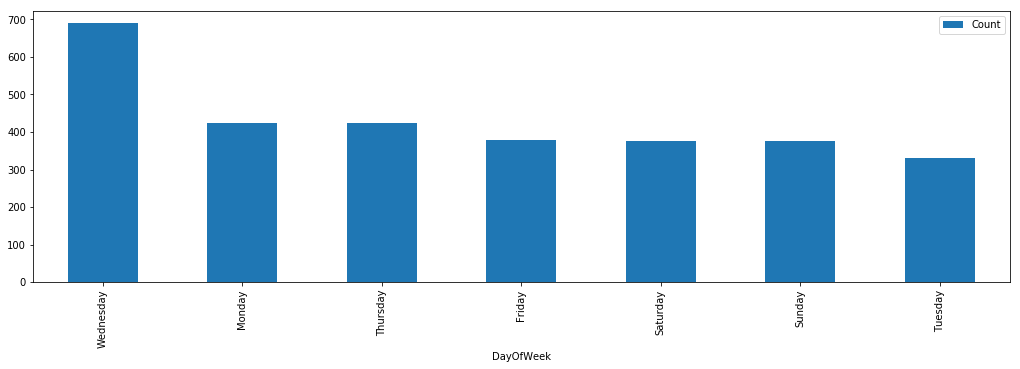

In [7]:
# BR4 Frequency of offences depending on the day of the week

def PlotCrimeDay(df, day):
    df_pcd = df.loc[(df['DayOfWeek'] == day)]
    df_pcd = df_pcd.groupby(['DayOfWeek','Category'], as_index = True).sum()
    
    plt.figure()
    plt.rcParams['figure.figsize'] = [17.5, 5]
    df_pcd.plot.bar()
    

columnsTitles=['Category', 'DayOfWeek','Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
PlotCrimeDay(df_temp, 'Monday')
PlotCrimeDay(df_temp, 'Tuesday')
PlotCrimeDay(df_temp, 'Wednesday')
PlotCrimeDay(df_temp, 'Thursday')
PlotCrimeDay(df_temp, 'Friday')
PlotCrimeDay(df_temp, 'Saturday')
PlotCrimeDay(df_temp, 'Sunday')

df_br4_1 = df_temp.groupby(['DayOfWeek'], as_index = True).sum()
print('Maximum count of offenses in the DayOfWeek:')
print(df_br4_1.loc[df_br4_1['Count'].idxmax()])
df_br4_2 = df_temp.groupby(['Category','DayOfWeek'], as_index = False).sum()
df_br4_2 = df_br4_2.sort_values(['Count'], ascending = False)
idx = df_br4_2.groupby(['Category'])['Count'].transform(max) == df_br4_2['Count']
print('\nMaximum count of offenses in the DayOfWeek per category:')
print(tabulate(df_br4_2[idx], tablefmt="grid", headers="keys"))

columnsTitles=['DayOfWeek', 'Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br4_3 = df_temp.groupby(['DayOfWeek'], as_index = True).sum()
df_br4_3 = df_br4_3.sort_values(['Count'], ascending = False)
print('\nTotal count of offenses per day')
print(tabulate(df_br4_3, tablefmt="grid", headers="keys"))
plt.figure()
df_br4_3.plot.bar()

In [8]:
# BR5: Find the Day of the week in a District/Address where a certain category of offense is more.

def daycrimecount(df, day):
    print('\n')
    df_br5_dcc = df.loc[(df['DayOfWeek'] == day)]
    df_br5_dcc = df_br5_dcc.groupby(['DayOfWeek','Category','PdDistrict','Address'], as_index = True).sum().sort_values(['Count'], ascending = False)
    print(df_br5_dcc.loc[(df_br5_dcc['Count'] >1)])
    

from pandas.api.types import CategoricalDtype

columnsTitles=['Category', 'DayOfWeek','PdDistrict','Address','Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
print('Offenses at loction w.r.t. DayOfWeek:')
daycrimecount(df_temp, 'Monday')
daycrimecount(df_temp, 'Tuesday')
daycrimecount(df_temp, 'Wednesday')
daycrimecount(df_temp, 'Thursday')
daycrimecount(df_temp, 'Friday')
daycrimecount(df_temp, 'Saturday')
daycrimecount(df_temp, 'Sunday')



Offenses at loction w.r.t. DayOfWeek:


                                                                 Count
DayOfWeek Category       PdDistrict Address                           
Monday    LARCENY/THEFT  CENTRAL    2300 Block of STOCKTON ST        4
                         SOUTHERN   800 Block of MARKET ST           3
          NON-CRIMINAL   TENDERLOIN 500 Block of JONES ST            3
          WEAPON LAWS    BAYVIEW    1300 Block of THOMAS AV          3
          MISSING PERSON SOUTHERN   0 Block of DORE ST               2
                         INGLESIDE  200 Block of CAYUGA AV           2
          WARRANTS       BAYVIEW    1100 Block of FITZGERALD AV      2
          MISSING PERSON TARAVAL    300 Block of STRATFORD DR        2
          BURGLARY       INGLESIDE  600 Block of PERALTA AV          2
          SUSPICIOUS OCC INGLESIDE  0 Block of LELAND AV             2
          MISSING PERSON SOUTHERN   0 Block of MOSS ST               2
          LARCENY/THEFT  SOUTHERN   9

+----------------------------------------+---------+
| Resolution                             |   Count |
+========================================+=========+
| ARREST, BOOKED                         |     716 |
+----------------------------------------+---------+
| ARREST, CITED                          |      21 |
+----------------------------------------+---------+
| CLEARED-CONTACT JUVENILE FOR MORE INFO |       2 |
+----------------------------------------+---------+
| EXCEPTIONAL CLEARANCE                  |      10 |
+----------------------------------------+---------+
| JUVENILE BOOKED                        |      15 |
+----------------------------------------+---------+
| LOCATED                                |       2 |
+----------------------------------------+---------+
| NONE                                   |    2196 |
+----------------------------------------+---------+
| PSYCHOPATHIC CASE                      |       5 |
+----------------------------------------+----

<Figure size 1260x360 with 0 Axes>

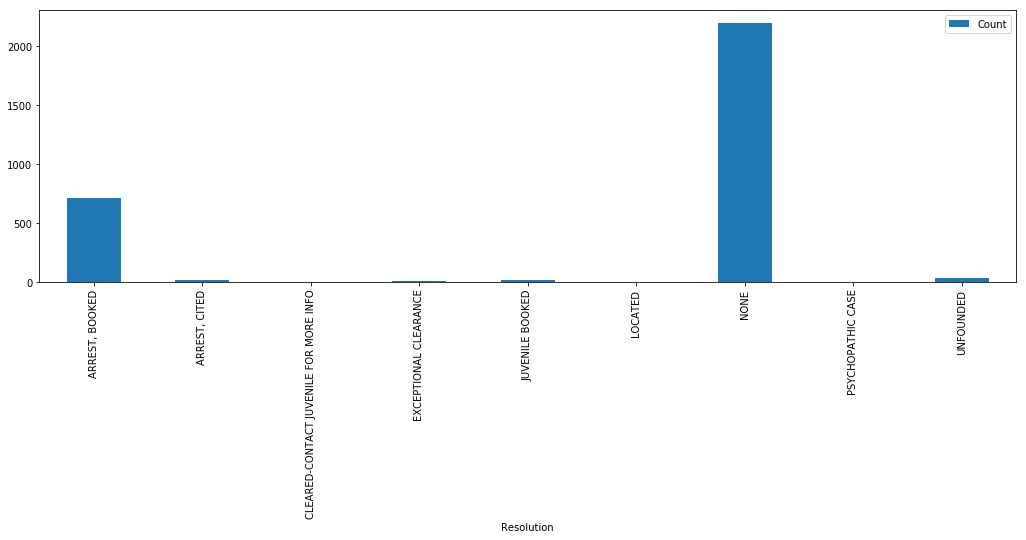

In [9]:
#BR7: Depict Resolution of cases in percentage w.r.t. category / day of week / district / address
def plotRes(df, col):
    columnTitles = ['Resolution',col,'Count']
    df_br7_pr = df.reindex(columns=columnsTitles)
    df_br7_pr = df_br7_pr.groupby(['Resolution',col], as_index = True).sum().reset_index()
    
    print(tabulate(df_br7_pr, tablefmt="grid", headers="keys"))
    df = df_br7_pr.pivot(index='Resolution', columns=col)
    
    print(df)
    
    

columnsTitles=['Category', 'DayOfWeek','PdDistrict','Address','Resolution','Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br7 = df_temp.groupby(['Resolution'], as_index = True).sum()

print(tabulate(df_br7, tablefmt="grid", headers="keys"))

plt.figure()
df_br7.plot.bar()

plotRes(df_temp, 'DayOfWeek')
plotRes(df_temp, 'PdDistrict')




In [10]:
#Mapping string type columns to number/int type.

crime_data['category_id'] = crime_data['Category'].factorize()[0]
crime_data['Date_id'] = crime_data['Date'].factorize()[0]
crime_data['Time_id'] = crime_data['Time'].factorize()[0]
crime_data['DayOfWeek_id'] = crime_data['DayOfWeek'].factorize()[0]
crime_data['PdDistrict_id'] = crime_data['PdDistrict'].factorize()[0]
crime_data['Resolution_id'] = crime_data['Resolution'].factorize()[0]
crime_data['Address_id'] = crime_data['Address'].factorize()[0]
columnsTitles=['Category', 'category_id', 'Date', 'Date_id','Time','Time_id', 'Descript', 'DayOfWeek', 'DayOfWeek_id','PdDistrict','PdDistrict_id', 'Resolution', 'Resolution_id','Address','Address_id', 'X', 'Y']
crime_data=crime_data.reindex(columns=columnsTitles)

print(tabulate(crime_data.head(), tablefmt="grid", headers="keys"))

+----+----------------+---------------+-----------+-----------+--------+-----------+------------------------------+-------------+----------------+--------------+-----------------+----------------+-----------------+---------------------------+--------------+----------+---------+
|    | Category       |   category_id | Date      |   Date_id | Time   |   Time_id | Descript                     | DayOfWeek   |   DayOfWeek_id | PdDistrict   |   PdDistrict_id | Resolution     |   Resolution_id | Address                   |   Address_id |        X |       Y |
+====+================+===============+===========+===========+========+===========+==============================+=============+================+==============+=================+================+=================+===========================+==============+==========+=========+
|  0 | WARRANTS       |             0 | 5/13/2015 |         0 | 23:53  |         0 | WARRANT ARREST               | Wednesday   |              0 | NORTHERN     |  

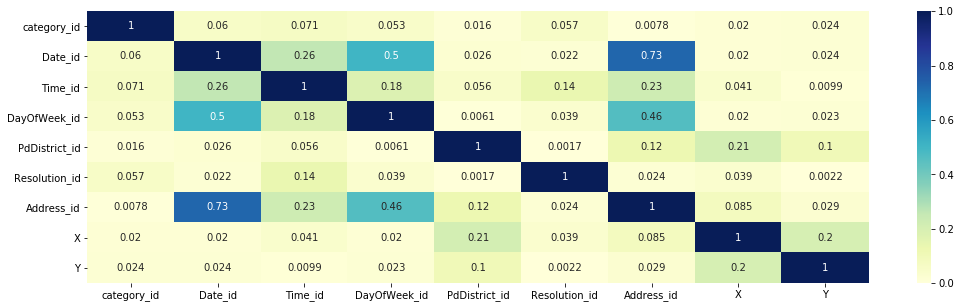

In [11]:
correlations = crime_data[crime_data.columns].corr(method='pearson')
sns.heatmap(abs(correlations), cmap="YlGnBu", annot = True)

<Figure size 1260x360 with 0 Axes>

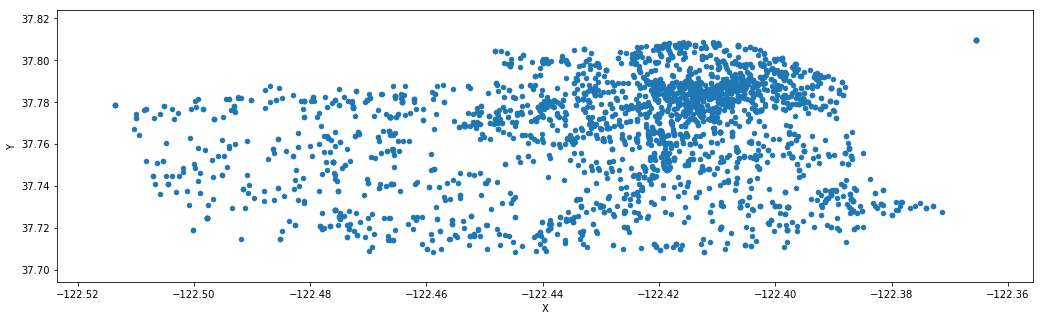

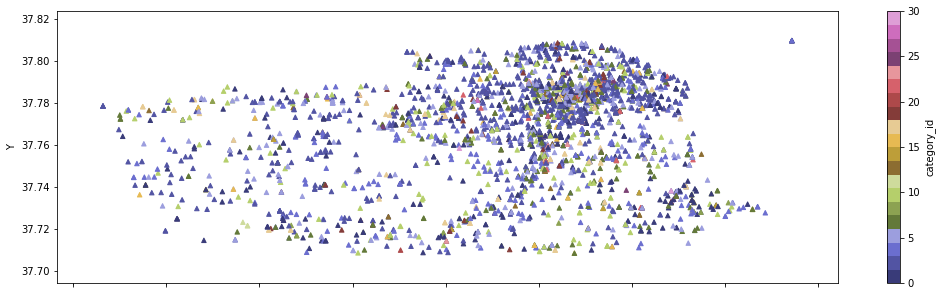

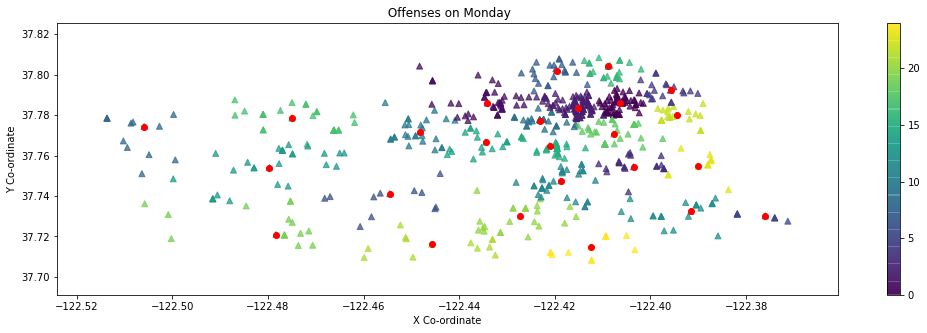

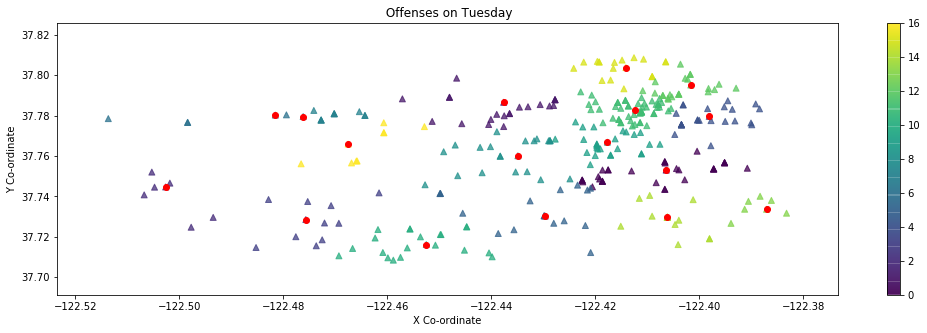

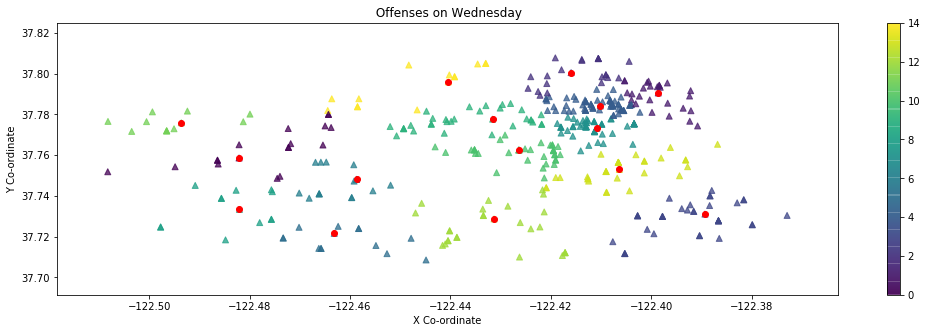

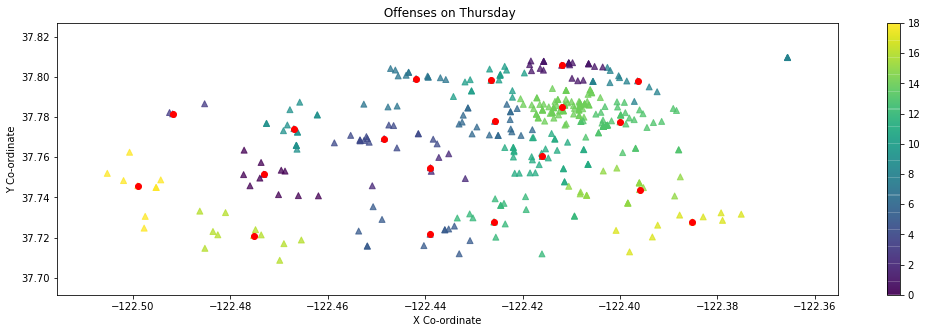

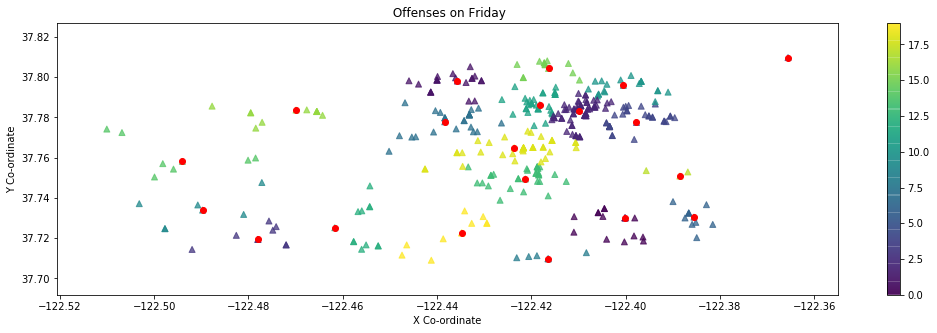

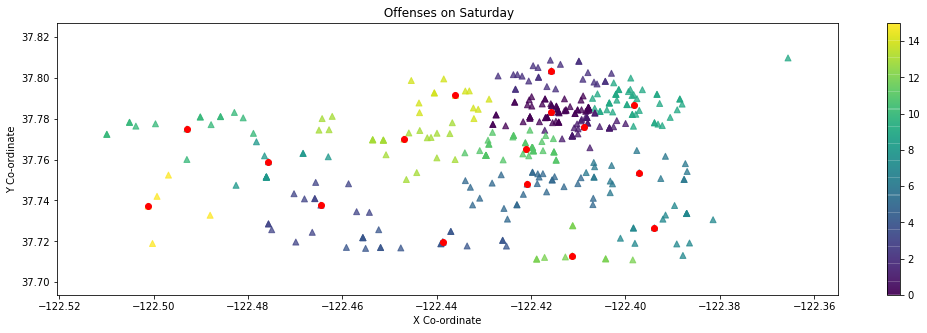

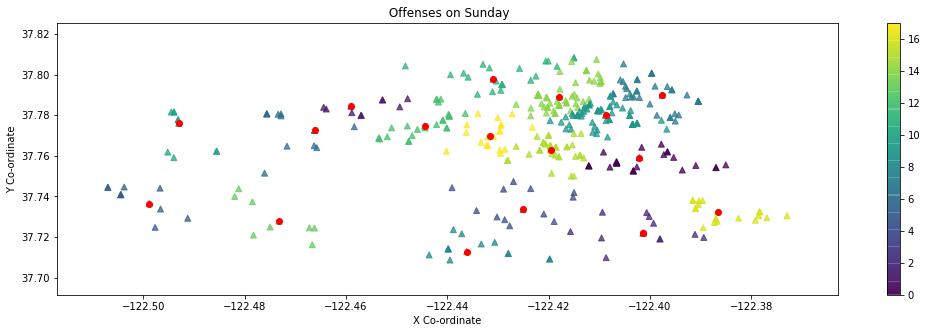

In [16]:
# Scatter plot of offenses w.r.t address co-ordinates (clustering: not category based)
from sklearn.cluster import AffinityPropagation

def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

def weekdaycrime(df, day):
    day_index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    temp = df.loc[(df['DayOfWeek_id'] == day)]
    #temp.plot.scatter(x = 'X', y = 'Y', c = 'category_id',  marker='^')
    clust_labels2, cent2 = doAffinity(temp)
    
    affinity = pd.DataFrame(clust_labels2)
    temp.insert((temp.shape[1]),'affinity',affinity)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(temp['X'], temp['Y'], c = affinity[0],  marker='^' , alpha=0.75)
    title = " Offenses on "+ day_index[day]
    ax.set_title(title)
    ax.set_xlabel('X Co-ordinate')
    ax.set_ylabel('Y Co-ordinate')
    plt.colorbar(scatter)
    #plt.figure()
    plt.scatter(cent2[:,1],cent2[:,2], marker='o', color='r')
    

columnsTitles=['category_id', 'DayOfWeek_id','X','Y']
df_temp = crime_data.reindex(columns=columnsTitles)
plt.figure()
df_temp.plot.scatter(x = 'X', y = 'Y')
df_temp.plot.scatter(x = 'X', y = 'Y', c = 'category_id',  marker='^', colormap = 'tab20b')
#df_temp.plot.scatter(x = 'X', y = 'Y', c = colors,  marker='^')
#scatPlot(0,df_temp)
columnsTitles=['DayOfWeek_id','X','Y']
df_temp = crime_data.reindex(columns=columnsTitles)
for i in range(0,7):
    weekdaycrime(df_temp,i)

C:\Users\Sandi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Sandi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Sandi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

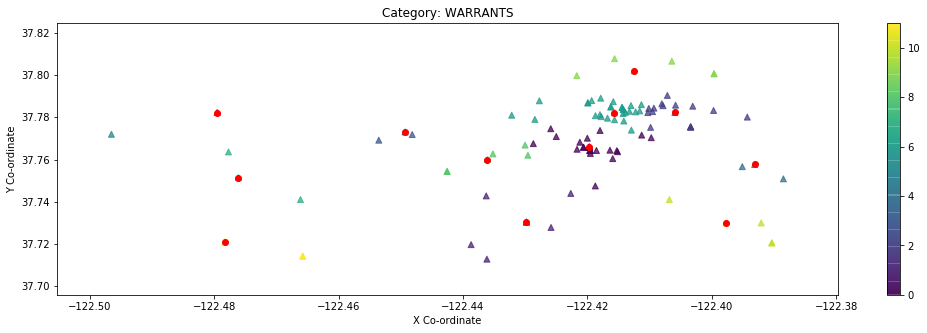

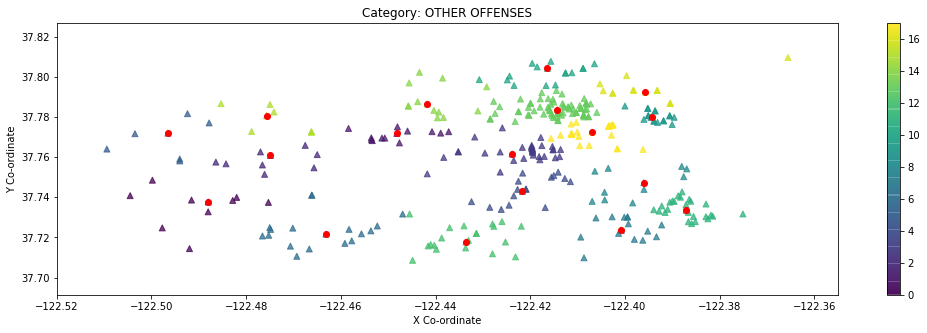

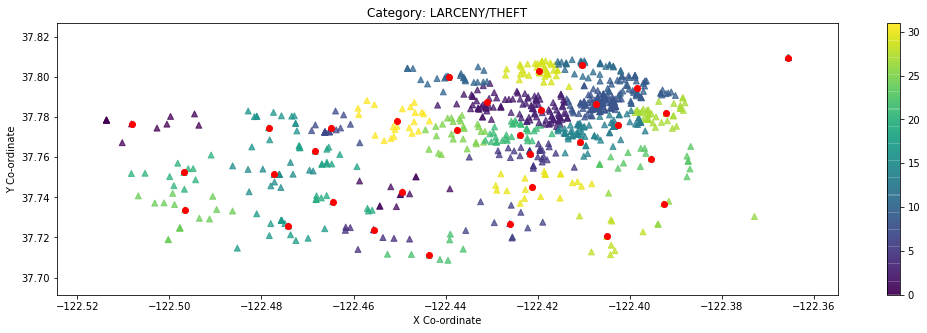

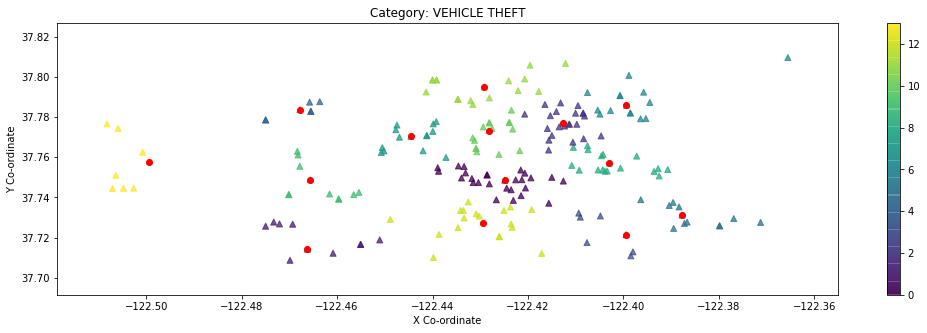

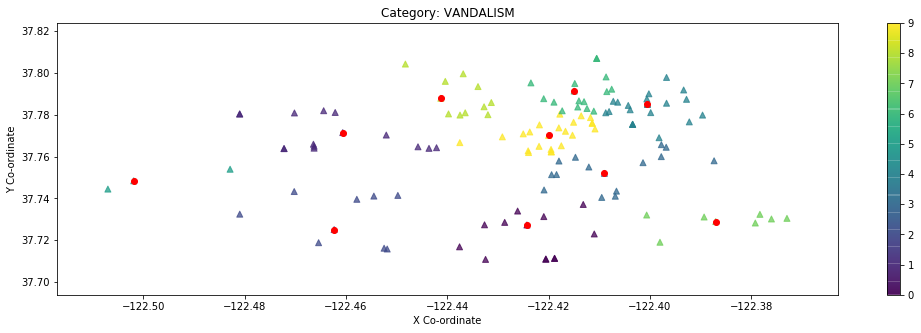

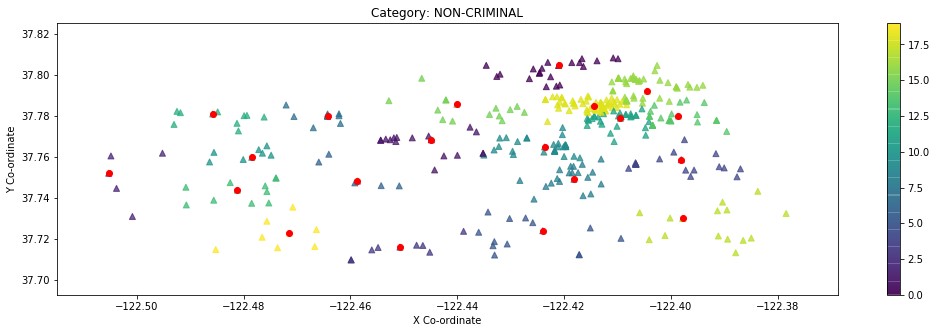

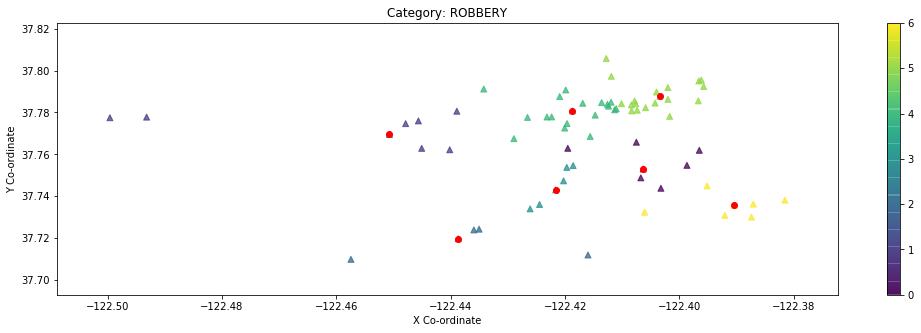

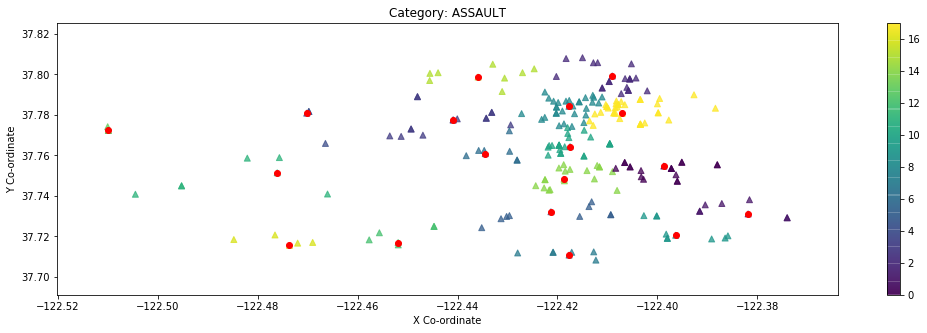

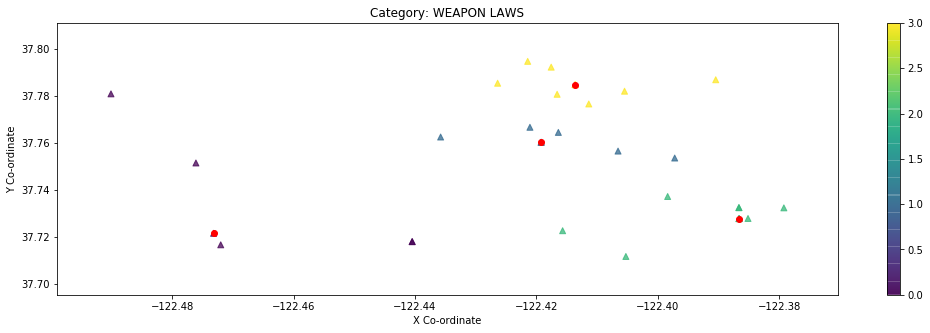

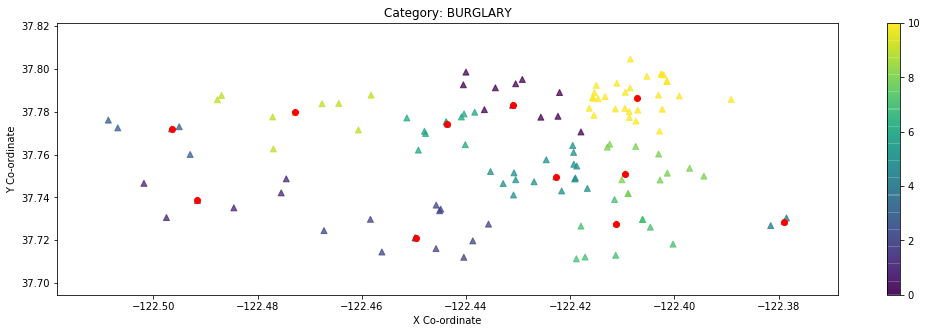

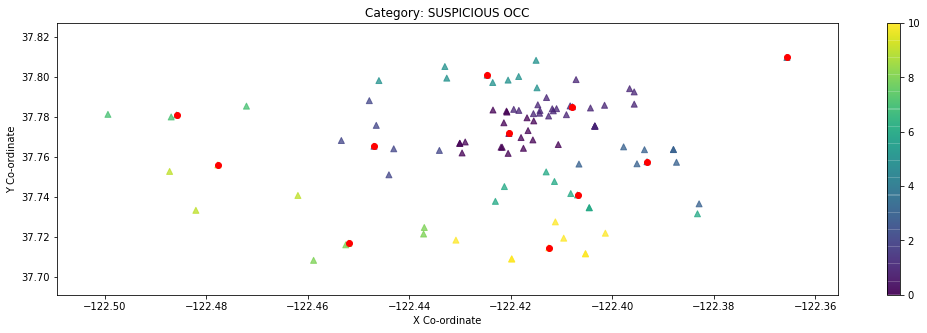

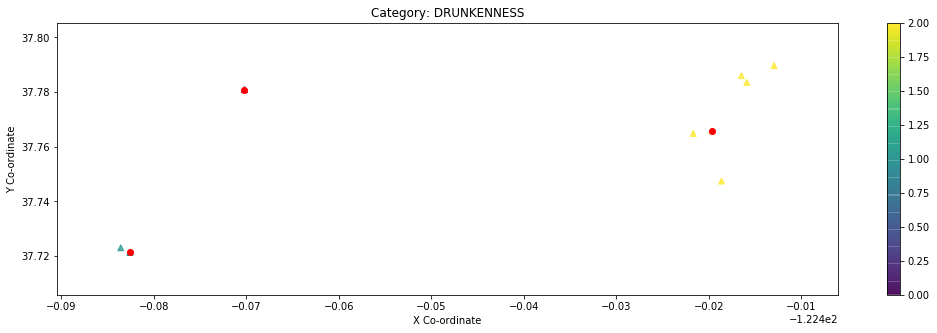

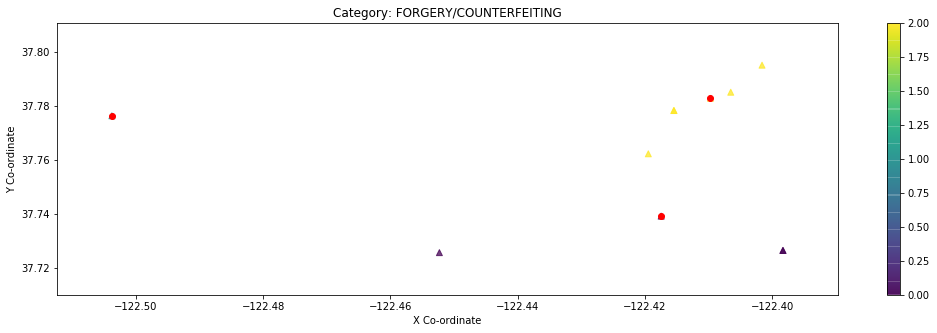

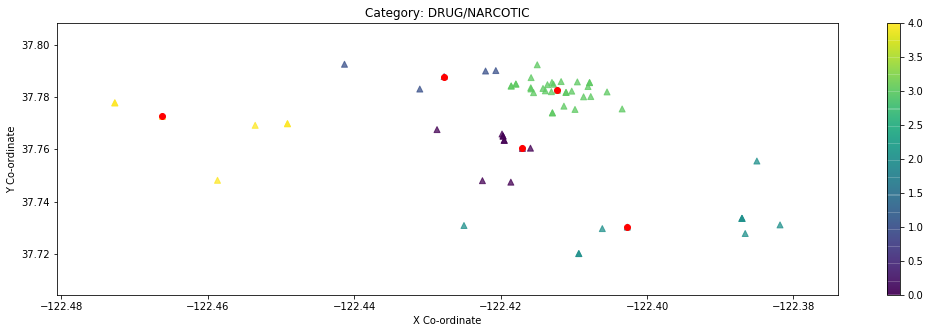

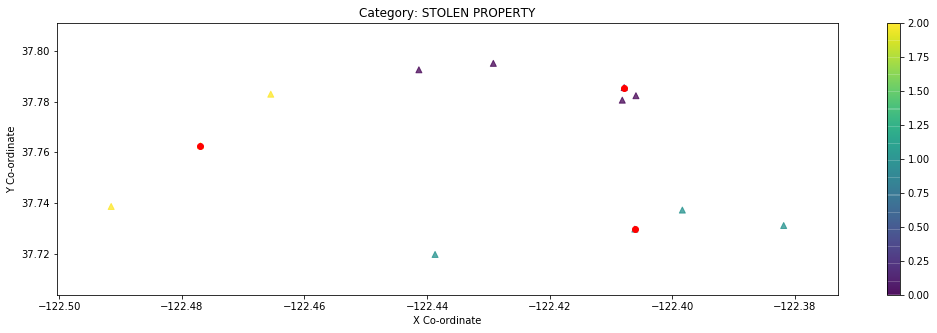

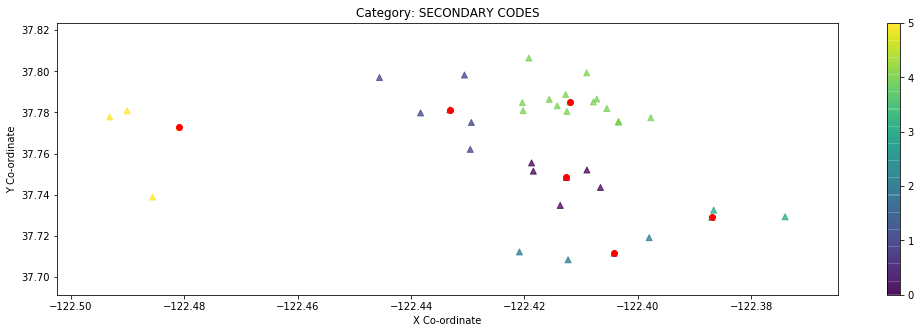

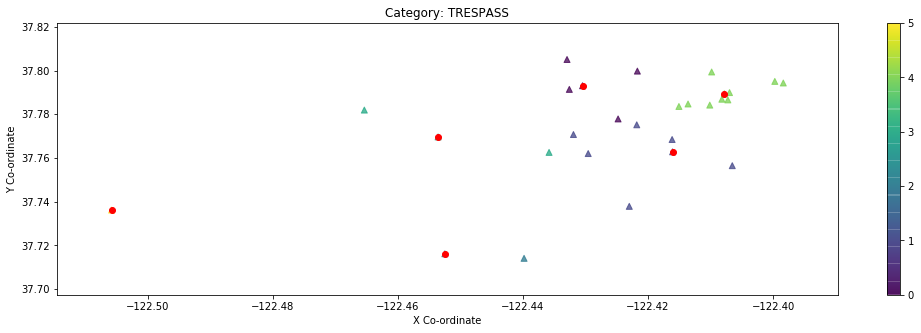

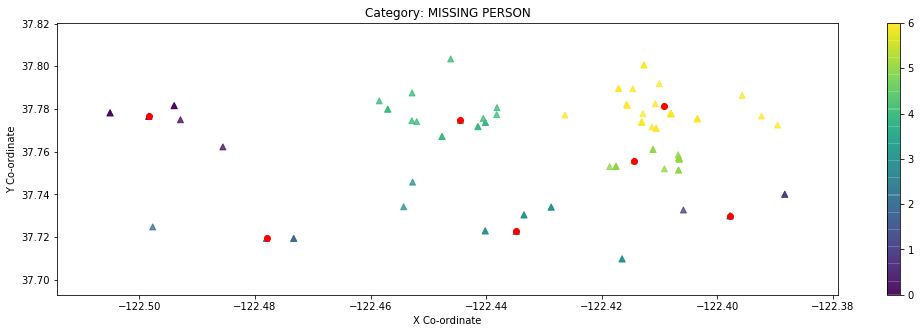

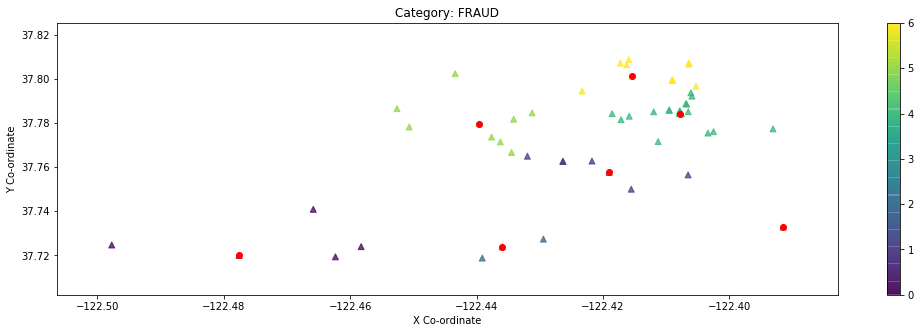

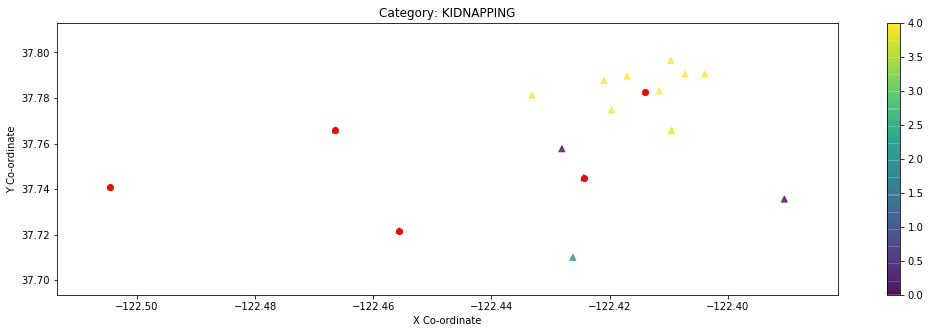

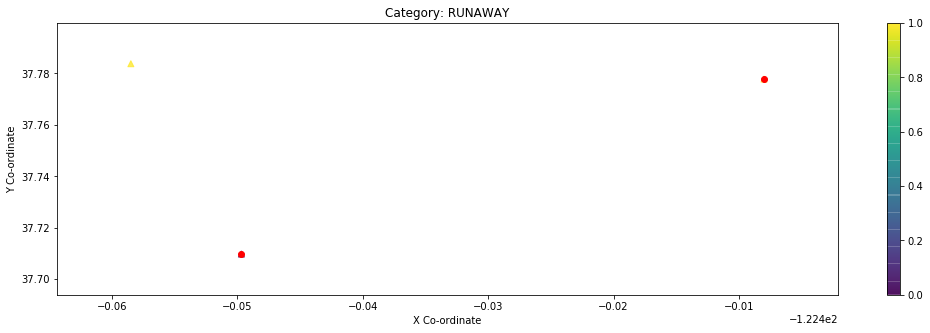

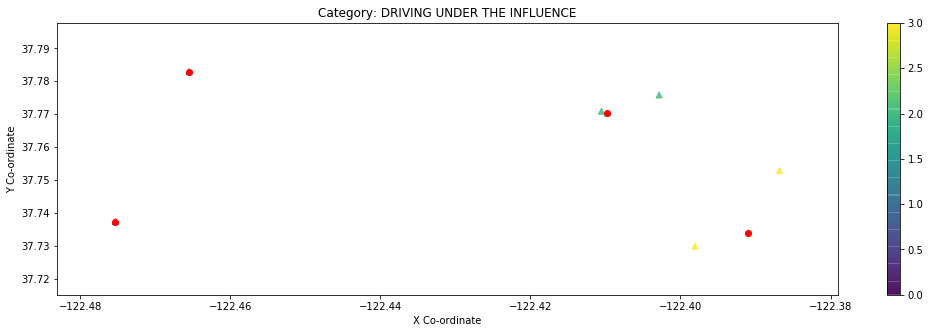

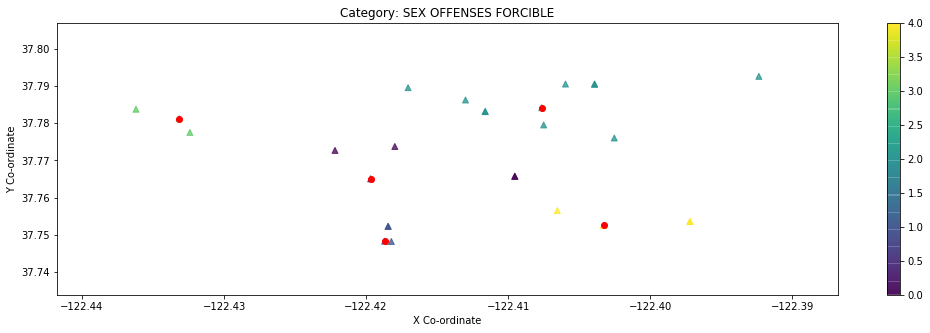

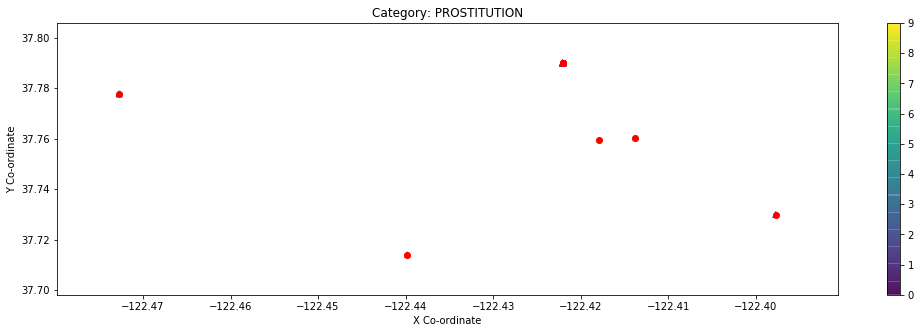

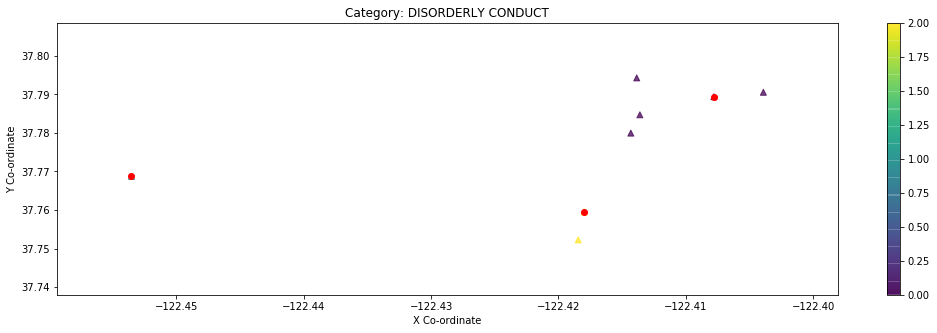

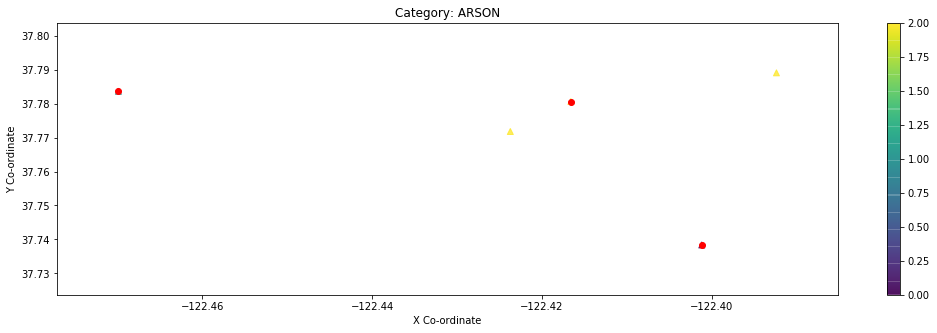

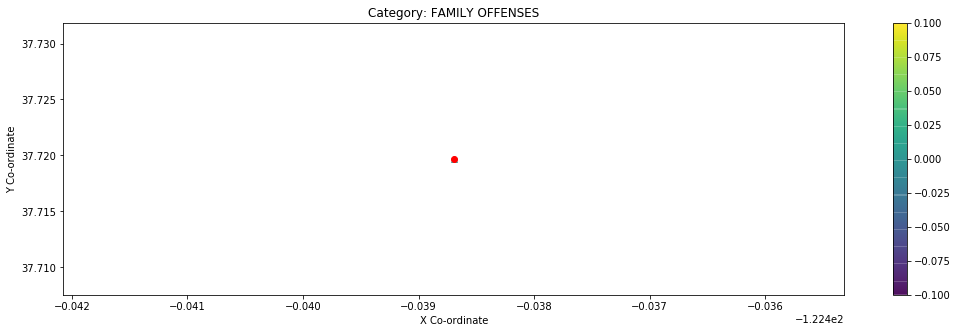

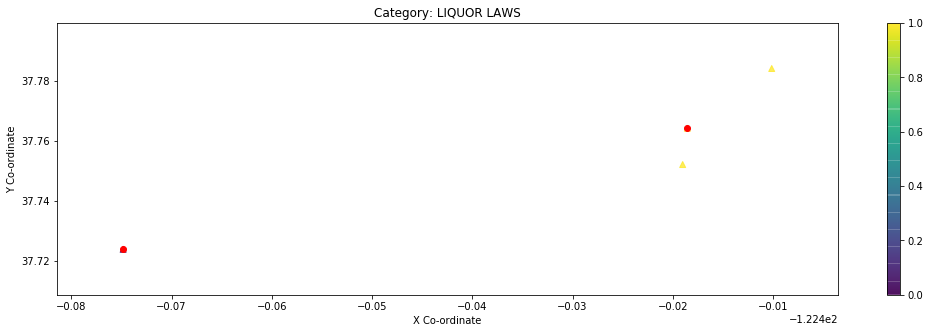

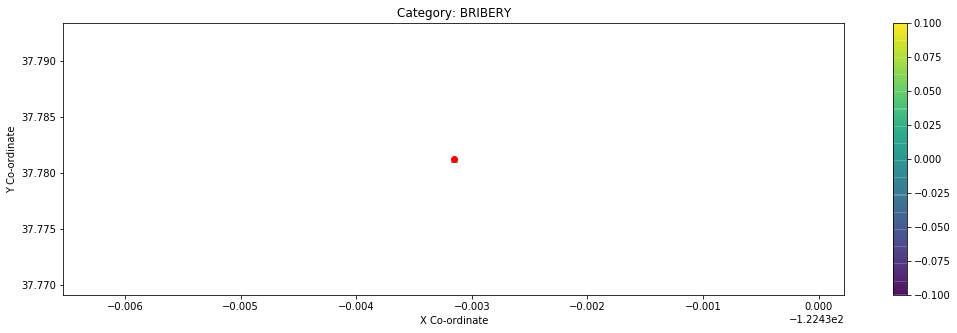

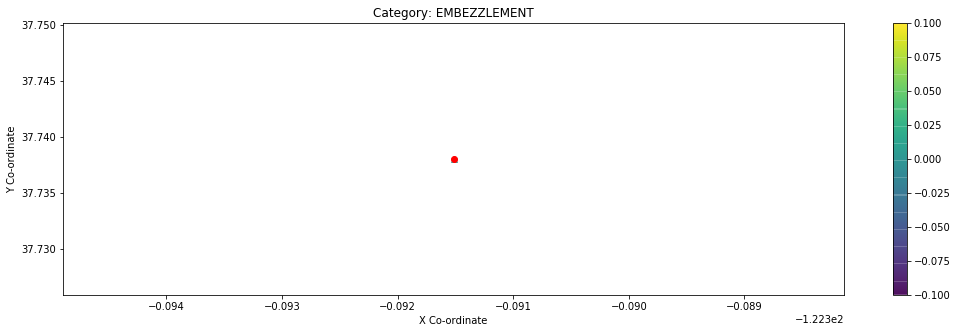

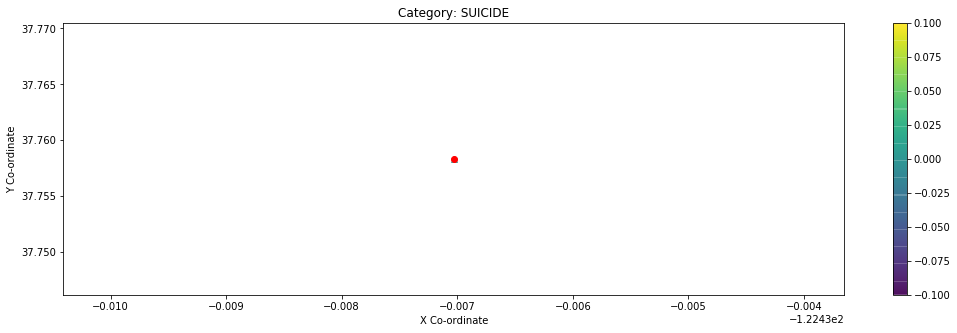

In [13]:
# Scatter plot of offences (clustering: per category based)
def crimeCat(df, cat):
    Cat_Index = ['WARRANTS','OTHER OFFENSES','LARCENY/THEFT','VEHICLE THEFT','VANDALISM','NON-CRIMINAL','ROBBERY','ASSAULT','WEAPON LAWS','BURGLARY','SUSPICIOUS OCC','DRUNKENNESS','FORGERY/COUNTERFEITING','DRUG/NARCOTIC','STOLEN PROPERTY','SECONDARY CODES','TRESPASS','MISSING PERSON','FRAUD','KIDNAPPING','RUNAWAY','DRIVING UNDER THE INFLUENCE','SEX OFFENSES FORCIBLE','PROSTITUTION','DISORDERLY CONDUCT','ARSON','FAMILY OFFENSES','LIQUOR LAWS','BRIBERY','EMBEZZLEMENT','SUICIDE']
    temp = df.loc[(df['category_id']==cat)]
    if(len(temp)>0):
        clust_labels2, cent2 = doAffinity(temp)
        affinity = pd.DataFrame(clust_labels2)
        temp.insert((temp.shape[1]),'affinity',affinity)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(temp['X'], temp['Y'], c = affinity[0],  marker='^' , alpha=0.75)
        title = "Category: "+ Cat_Index[cat] 
        ax.set_title(title)
        ax.set_xlabel('X Co-ordinate')
        ax.set_ylabel('Y Co-ordinate')
        plt.colorbar(scatter)
        plt.scatter(cent2[:,1],cent2[:,2], marker='o', color='r')
        
columnsTitles=['category_id','X','Y']
df_temp = crime_data.reindex(columns=columnsTitles)
for i in range(0,31):
    crimeCat(df_temp,i)

C:\Users\Sandi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Sandi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Sandi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

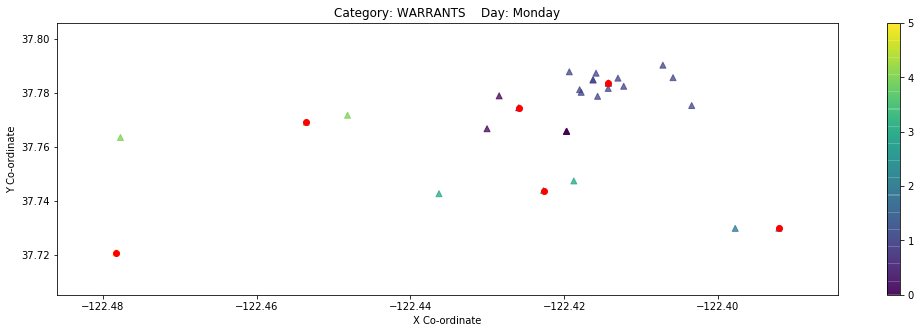

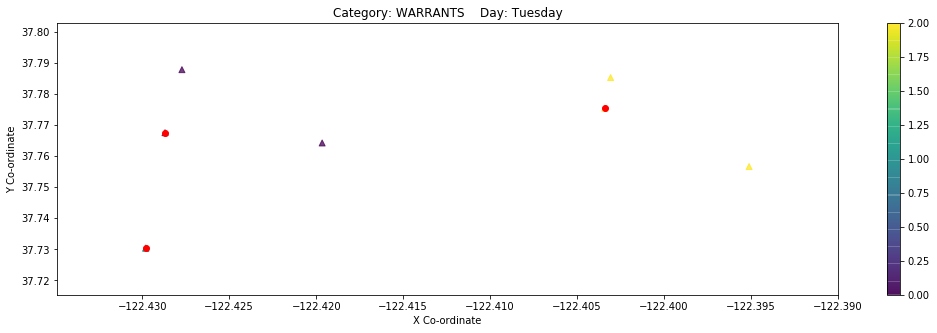

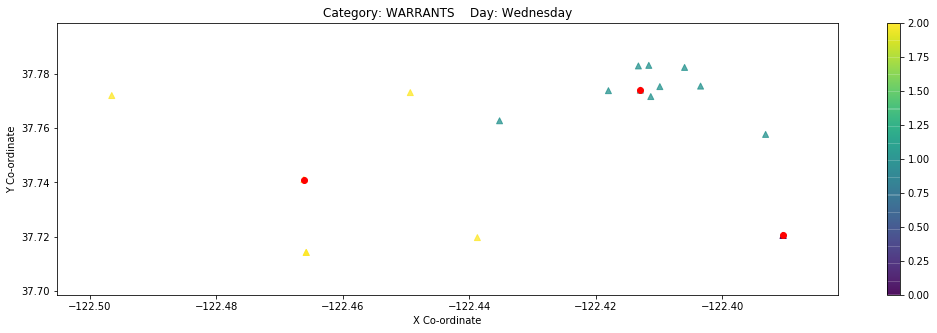

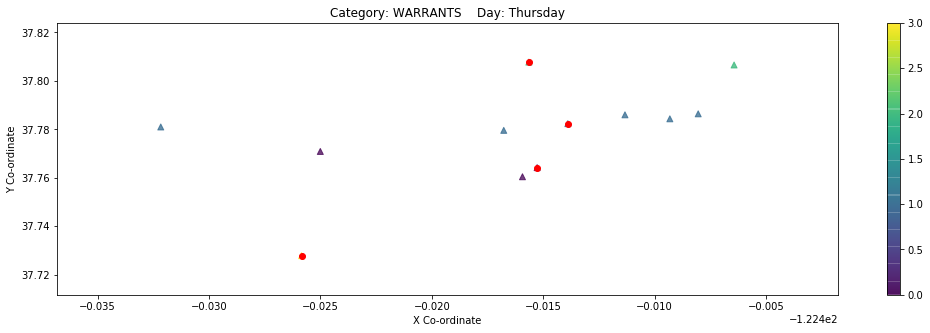

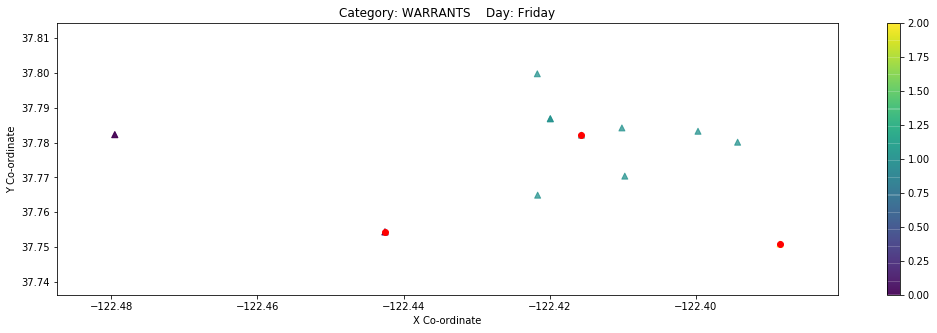

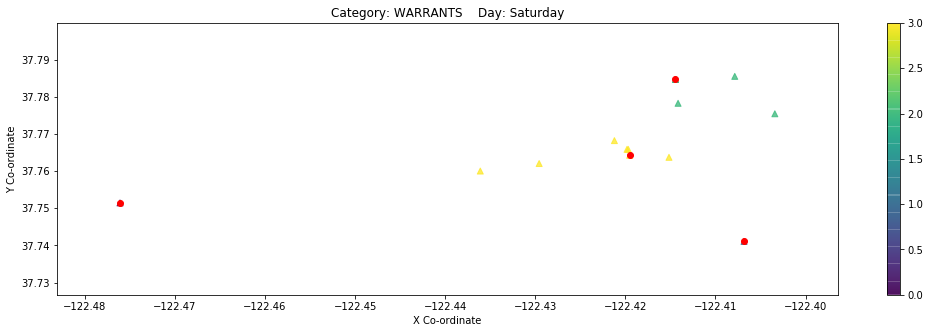

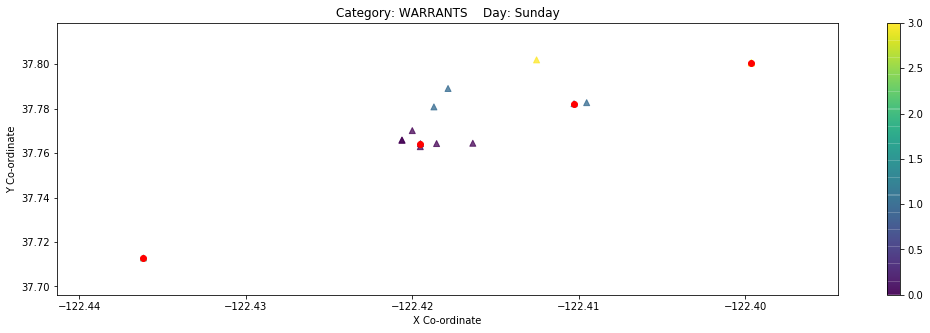

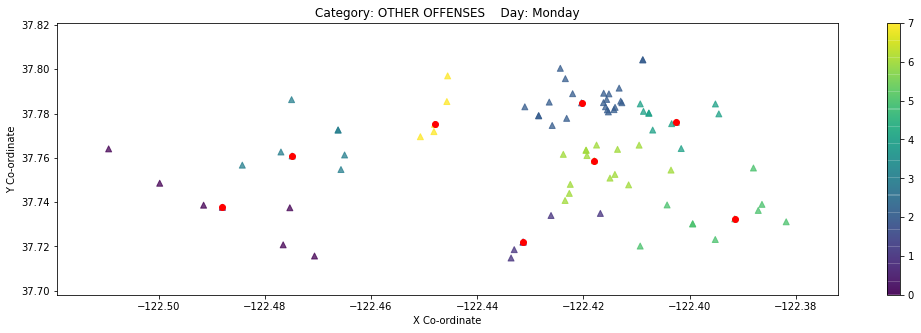

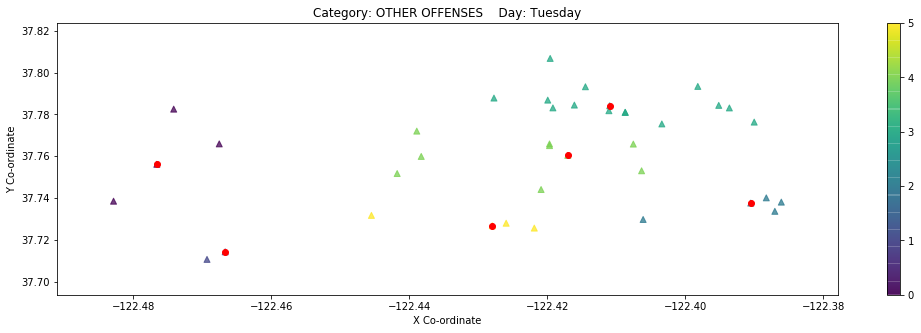

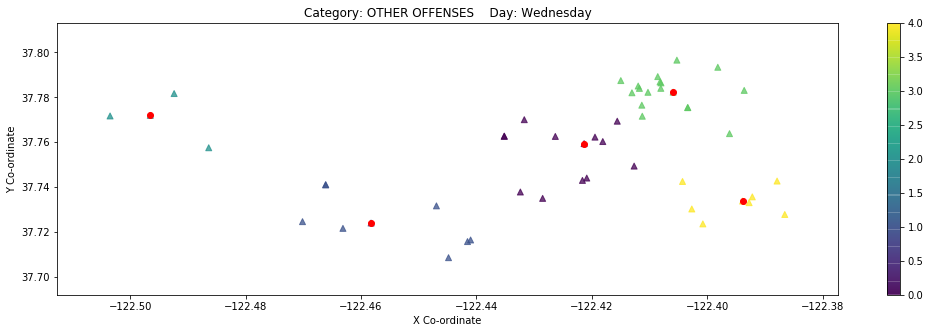

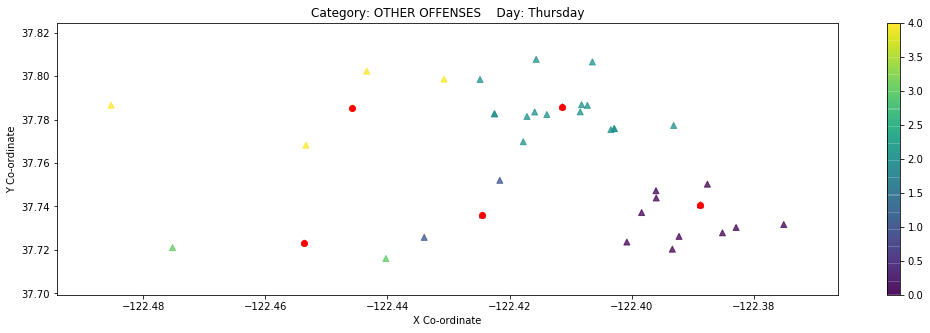

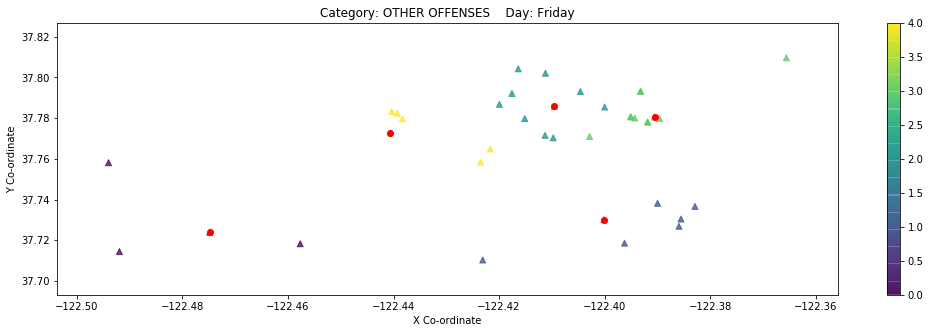

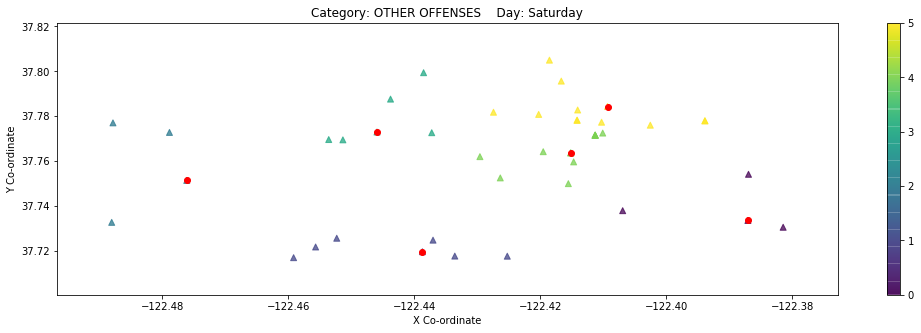

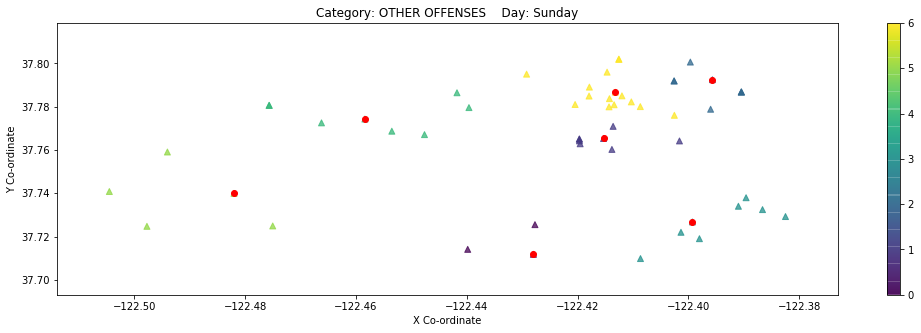

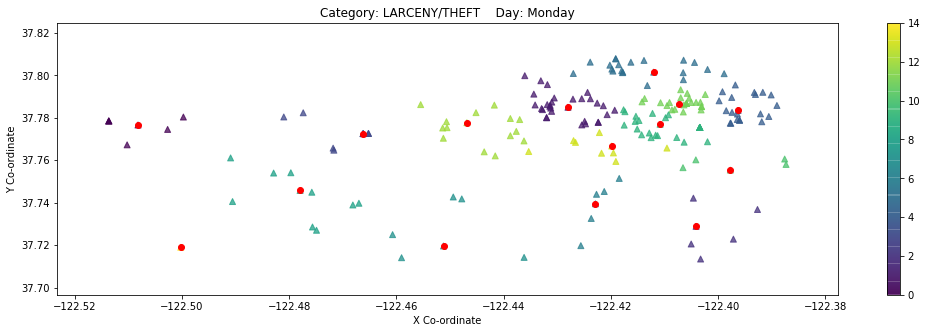

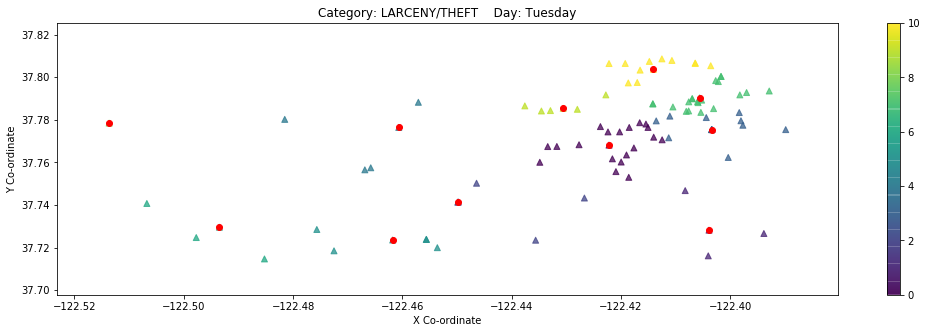

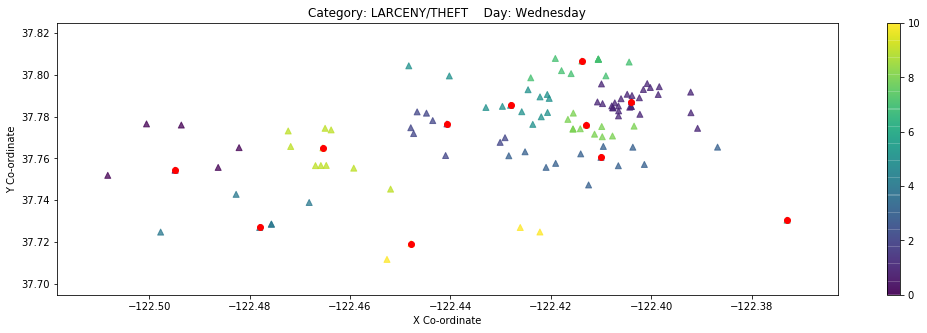

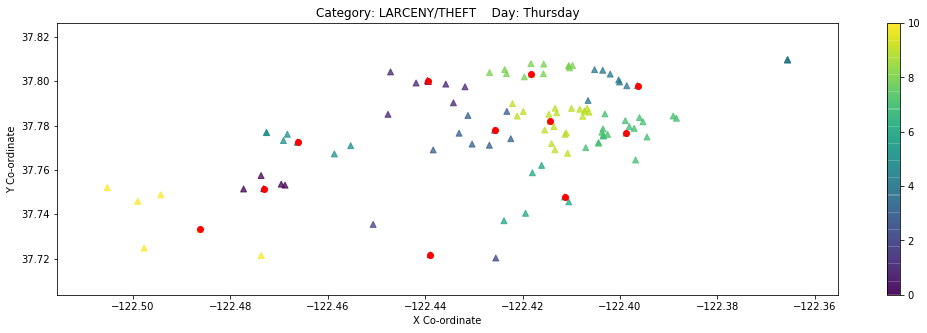

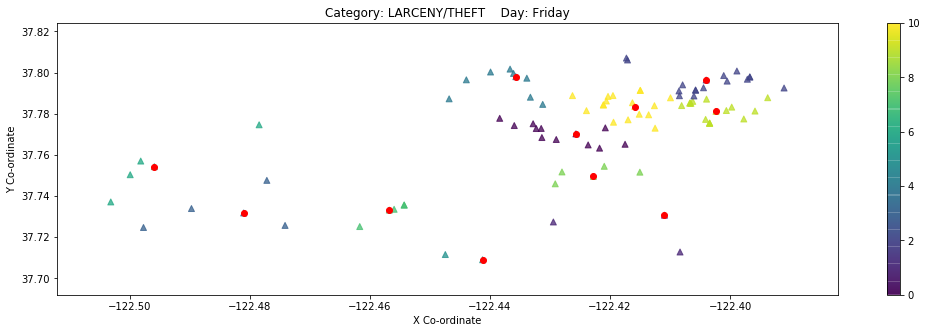

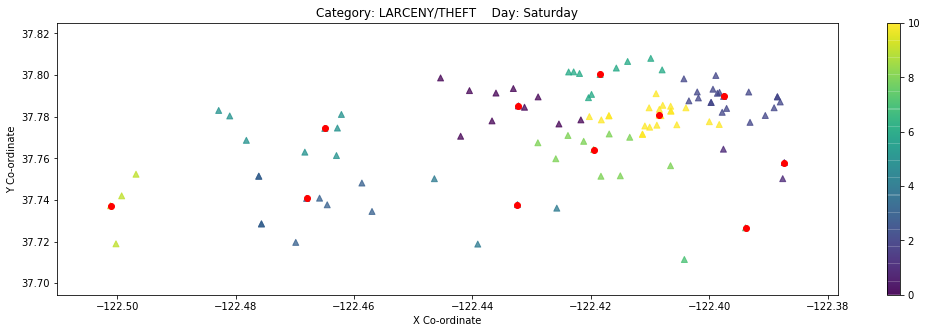

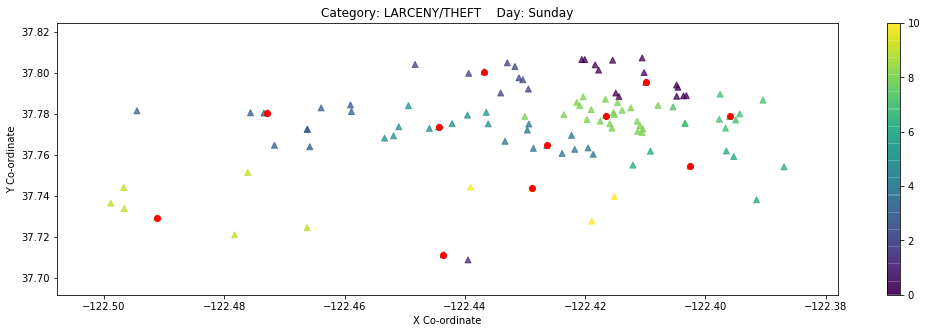

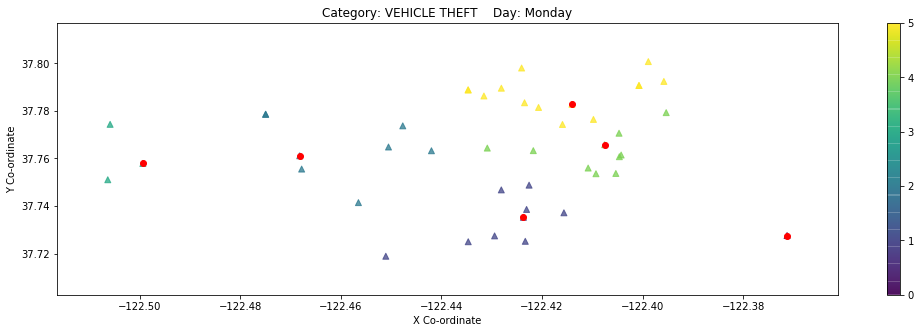

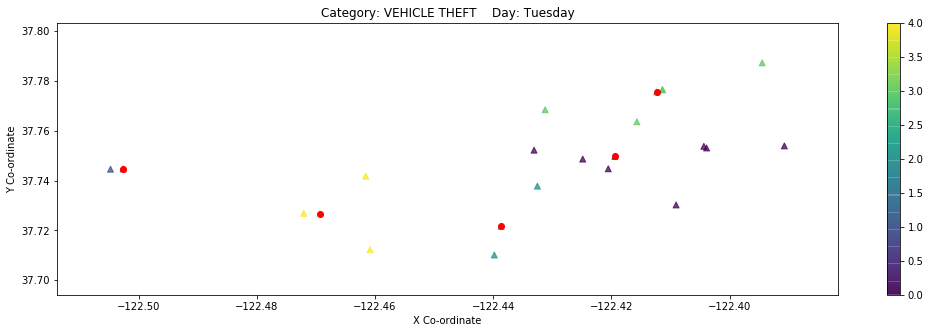

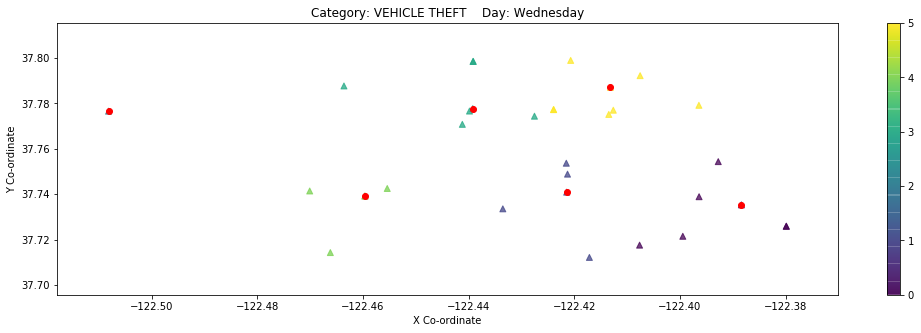

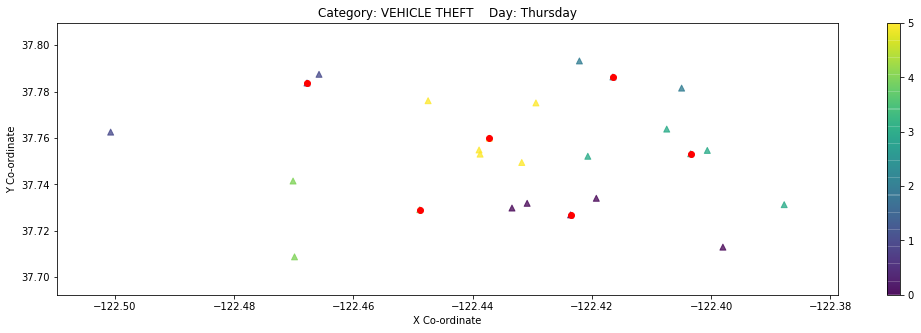

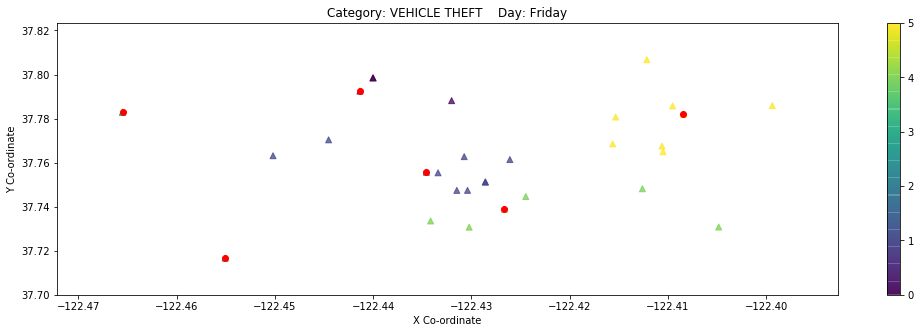

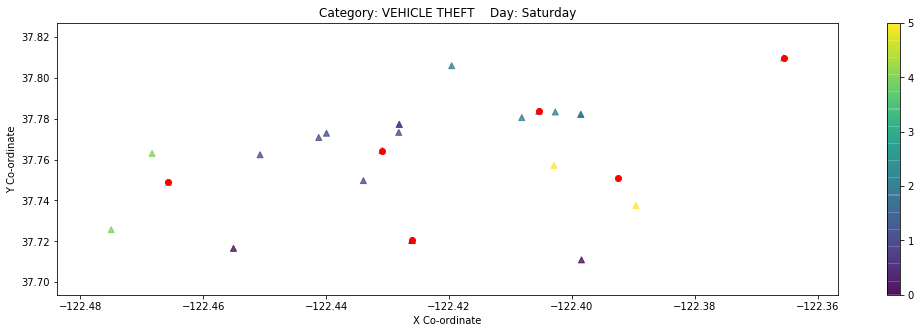

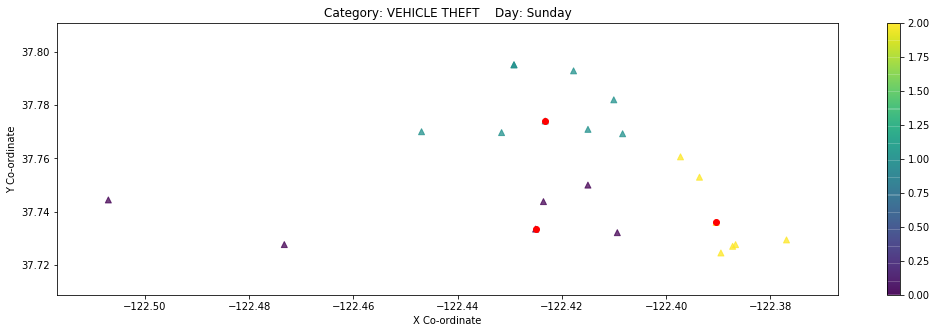

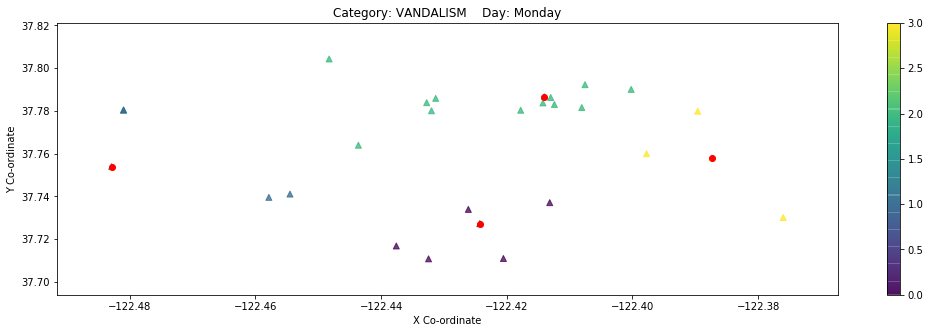

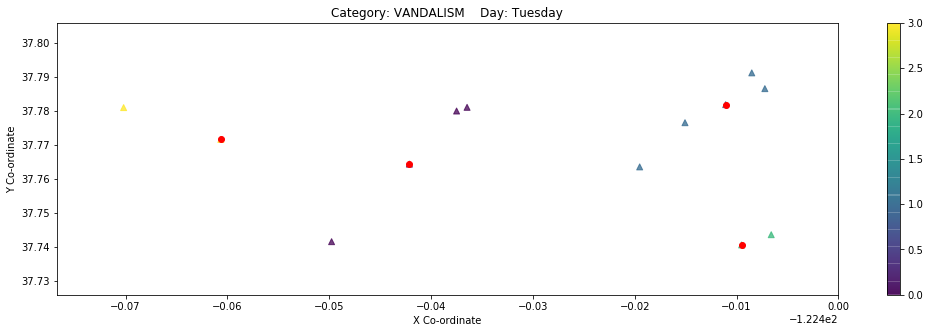

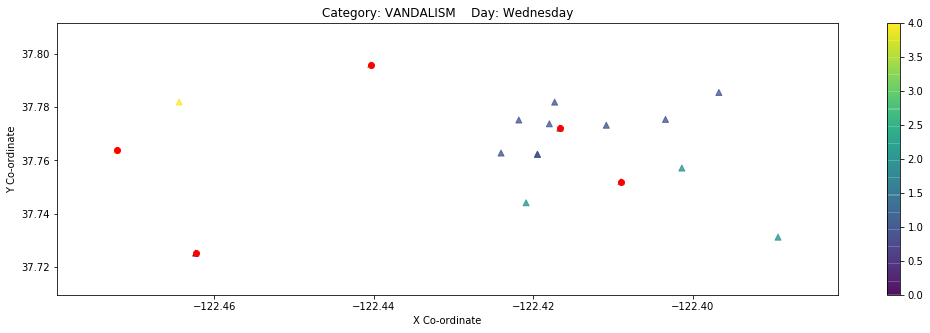

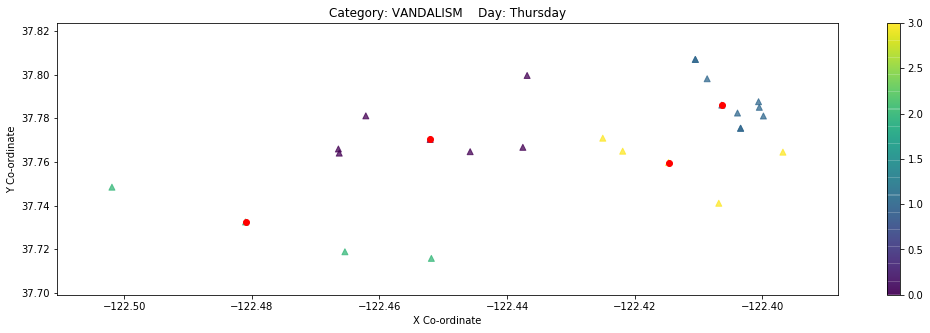

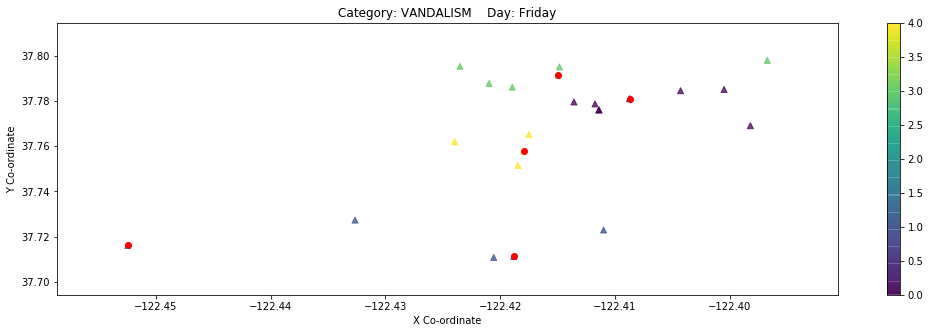

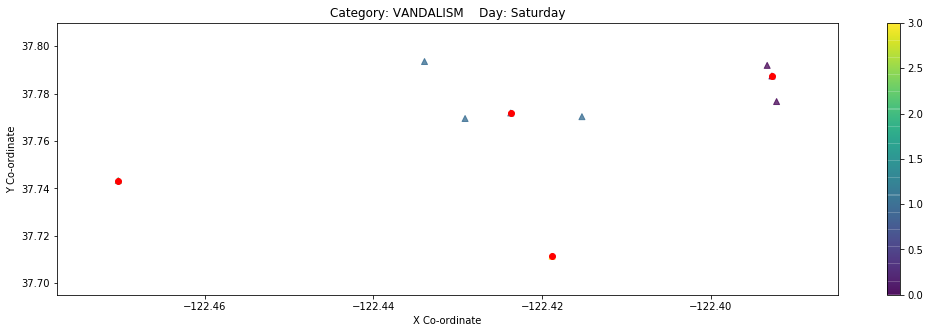

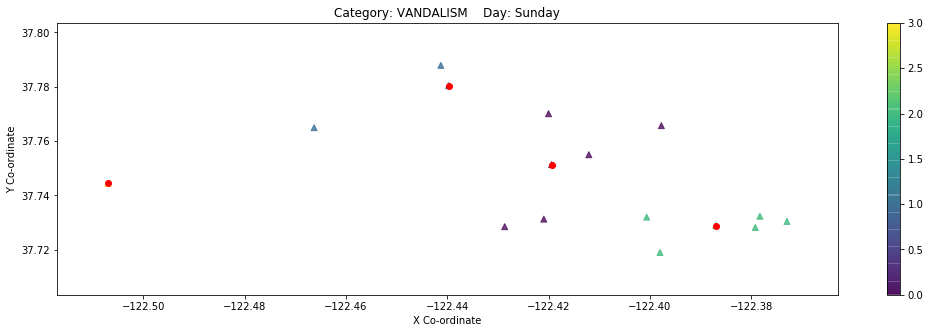

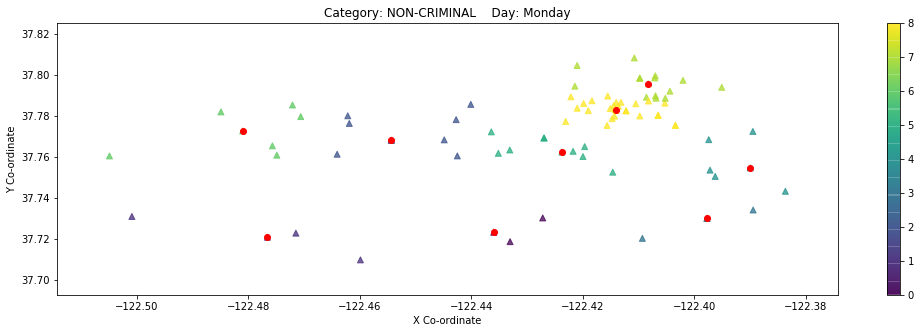

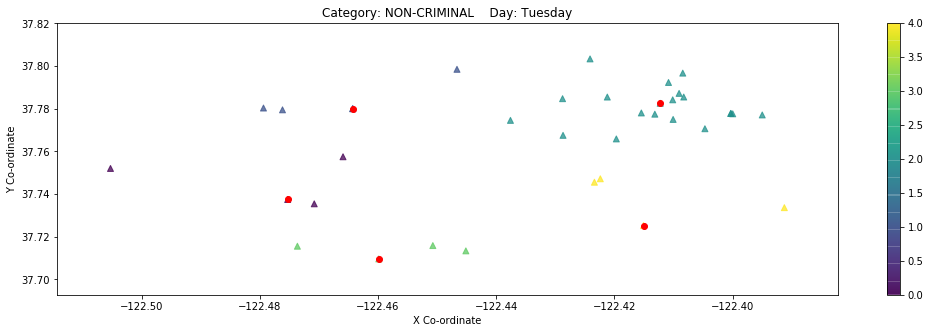

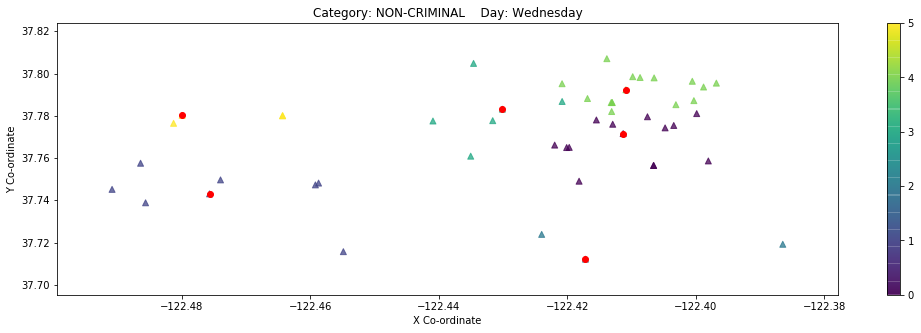

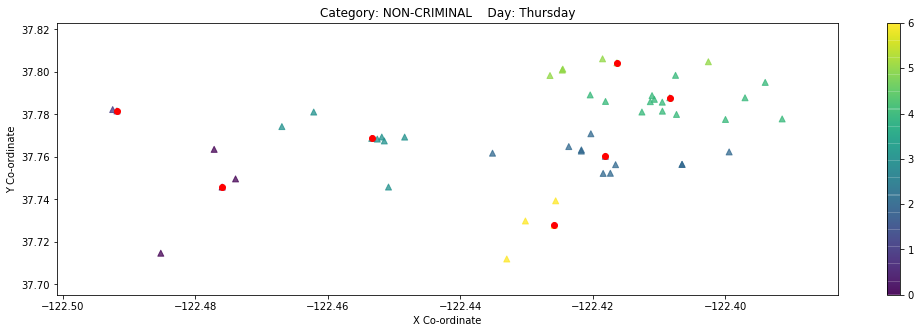

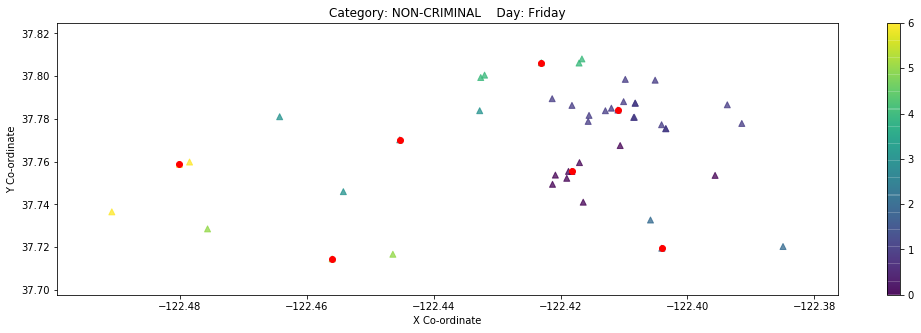

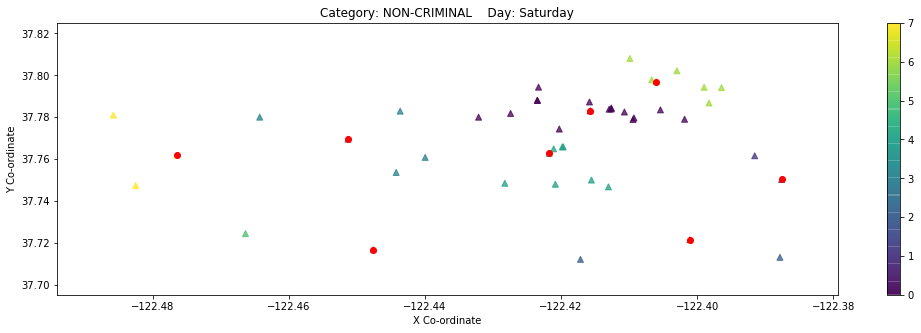

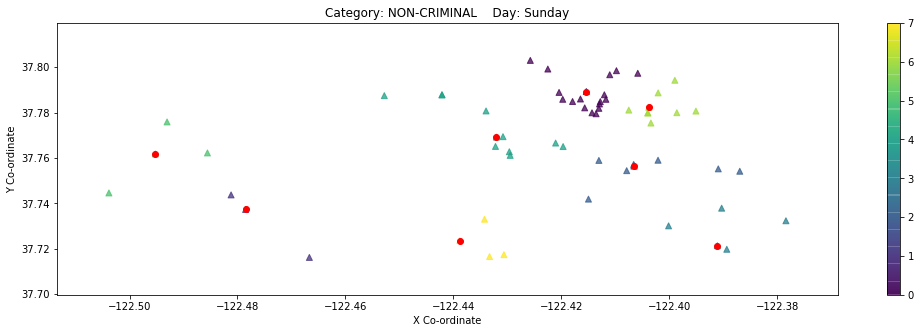

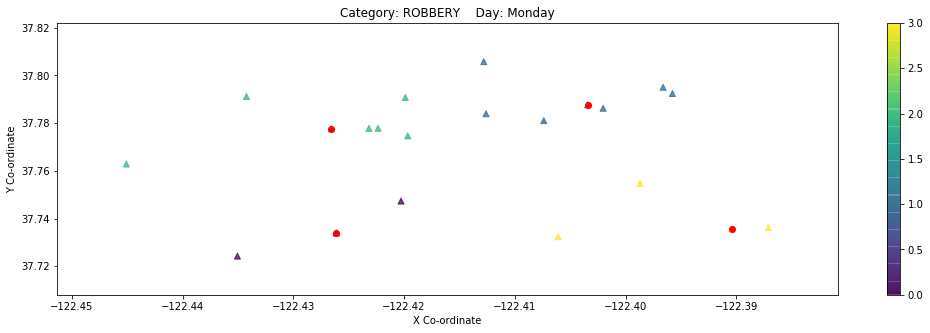

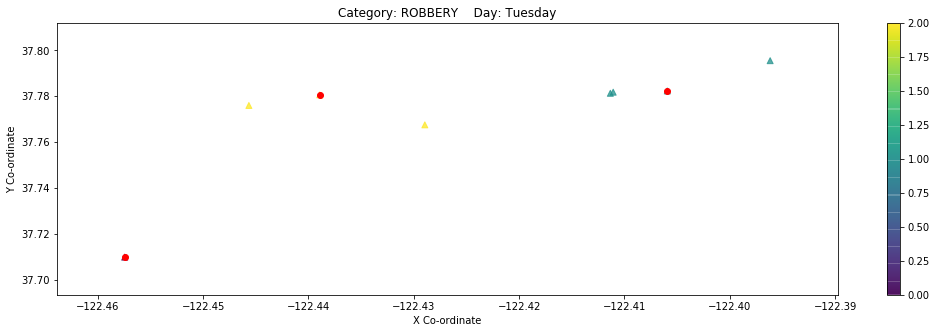

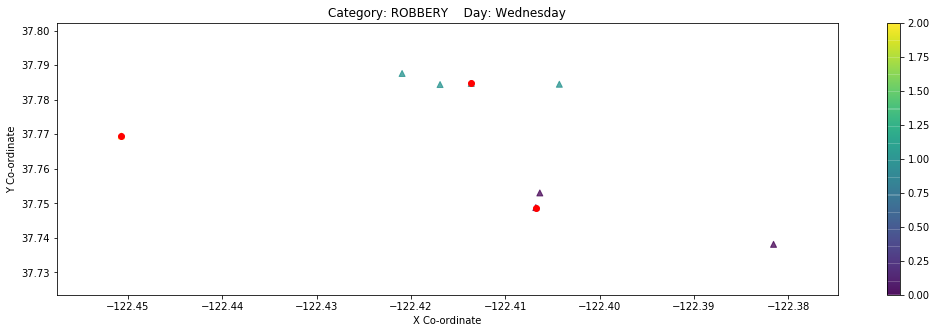

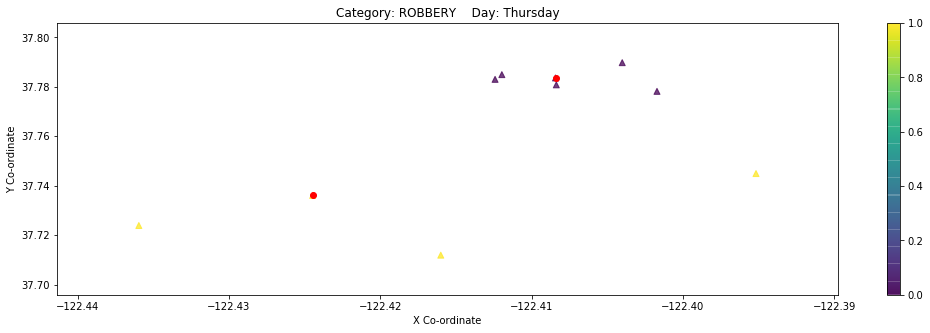

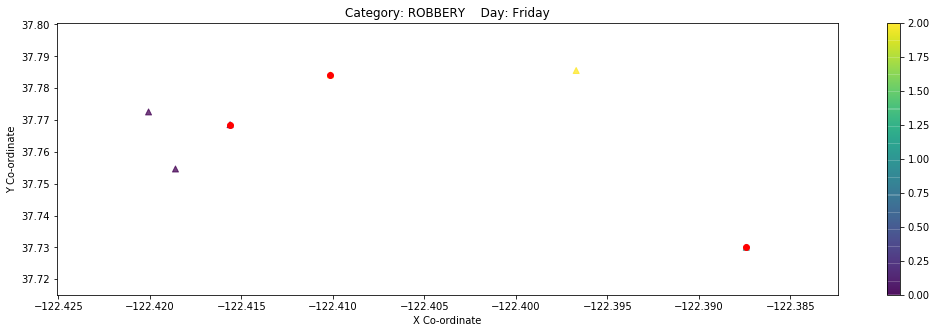

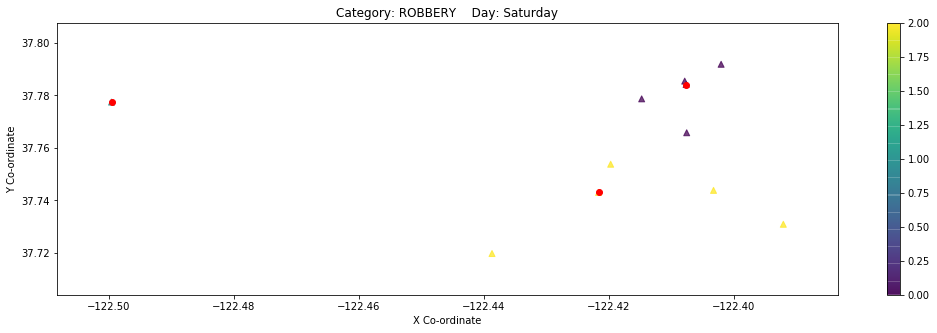

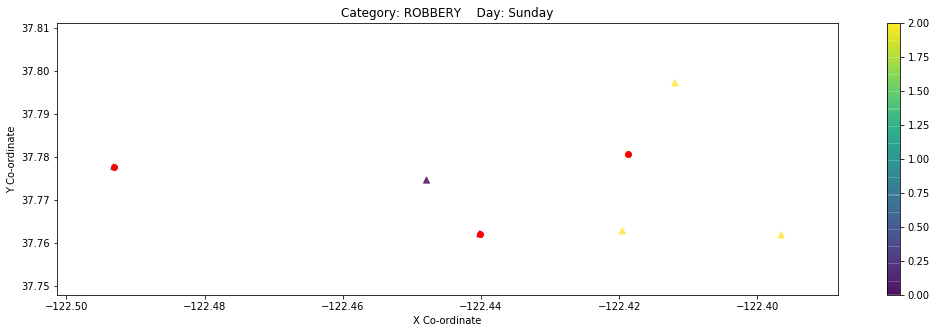

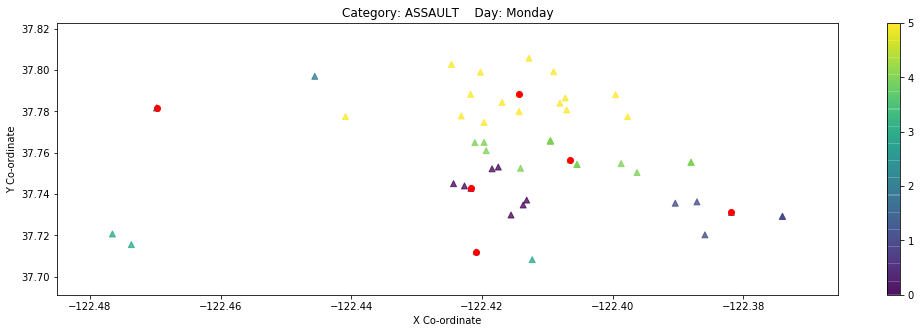

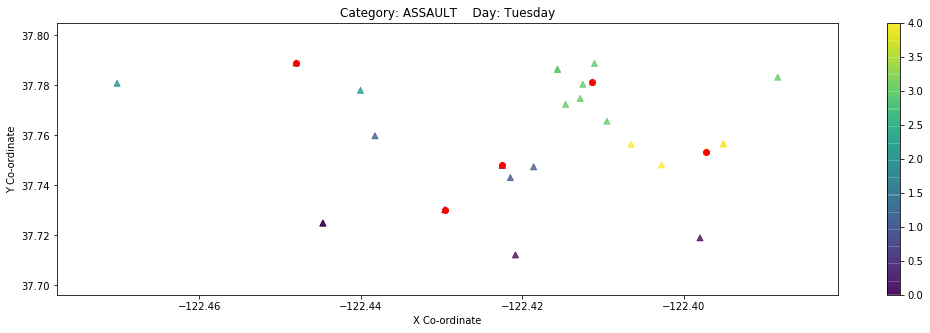

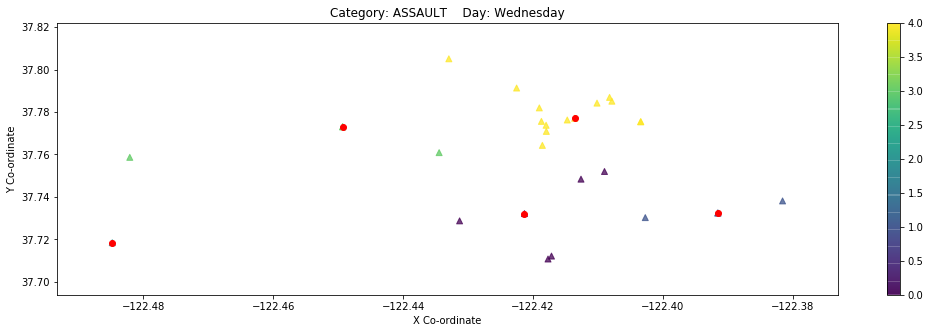

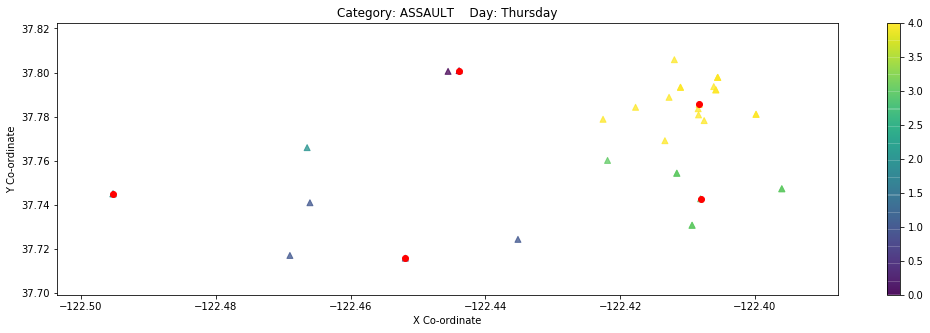

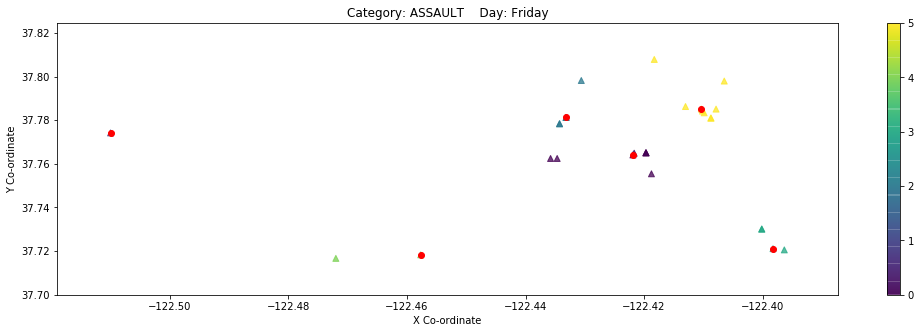

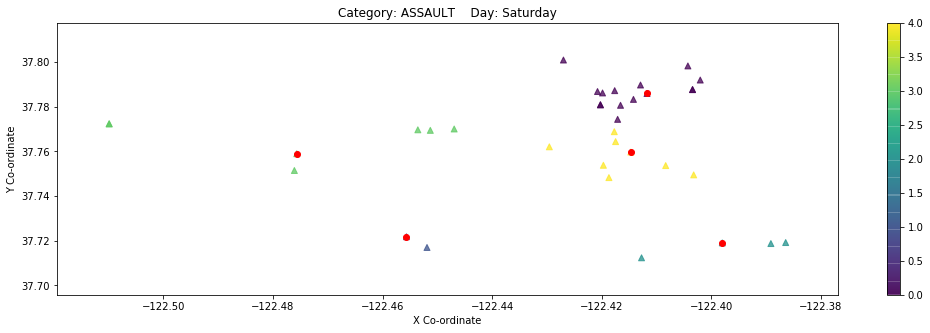

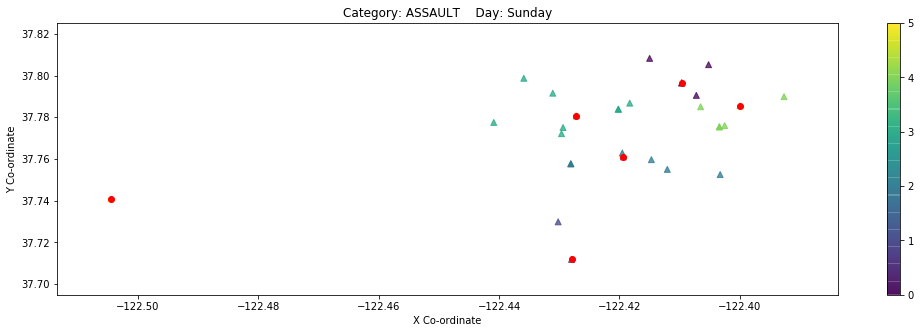

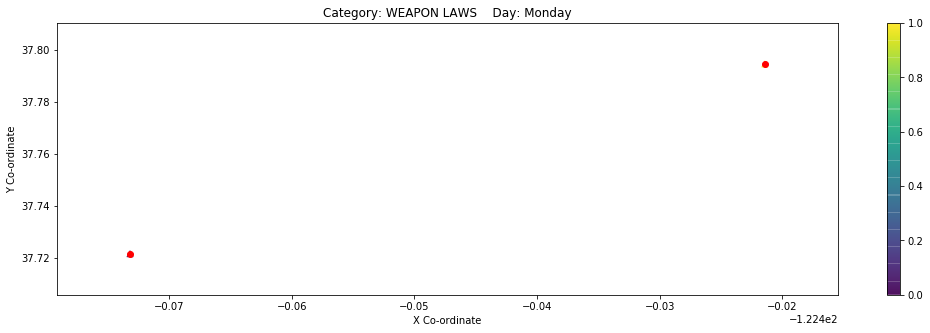

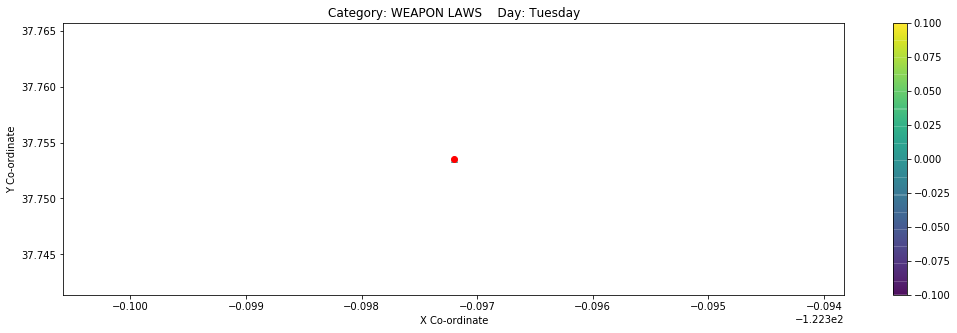

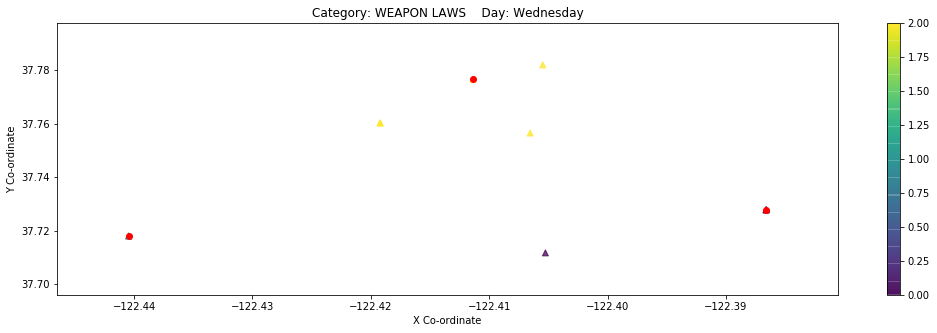

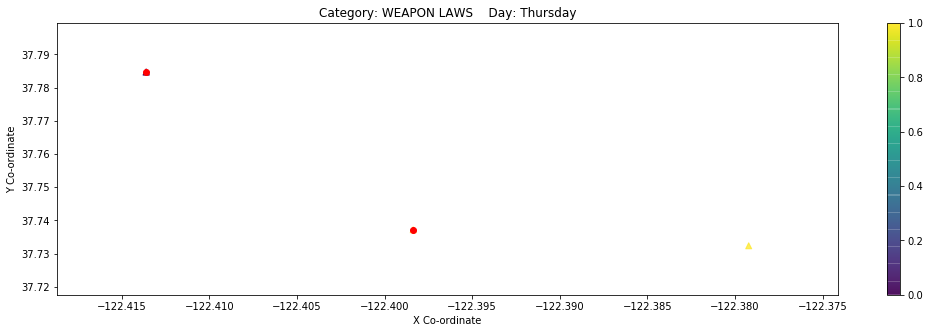

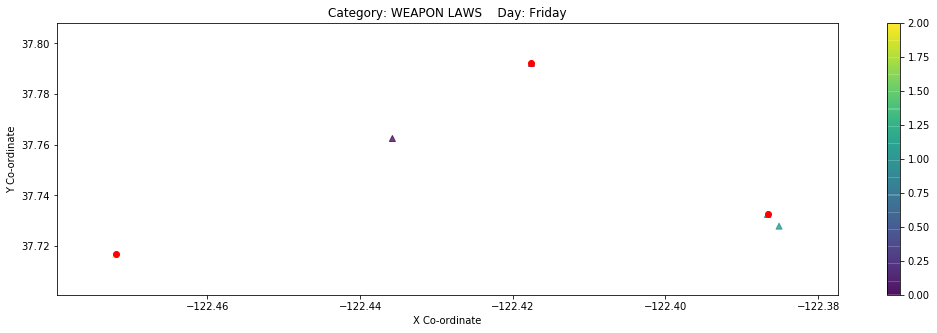

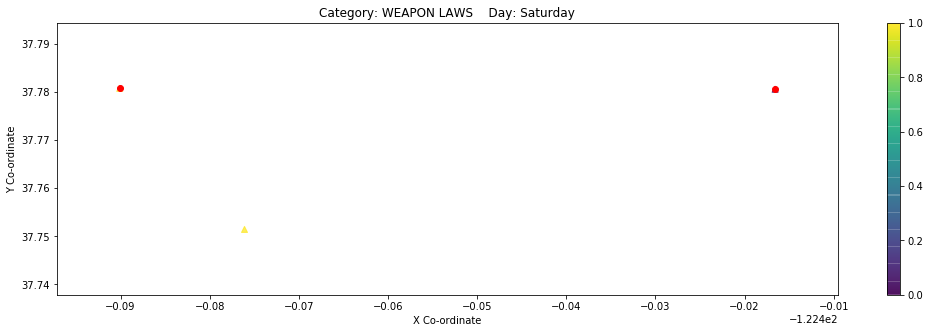

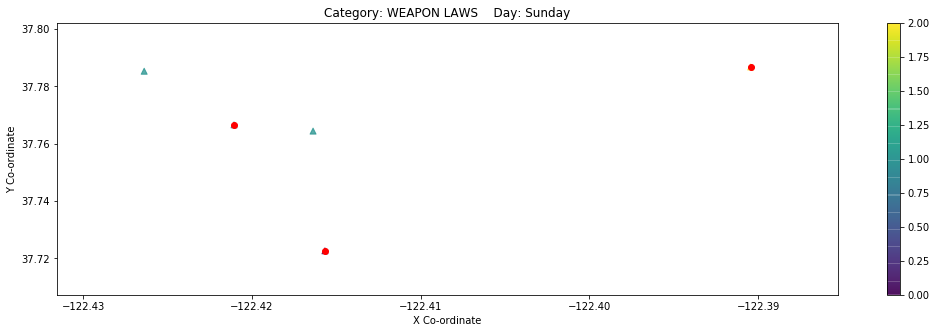

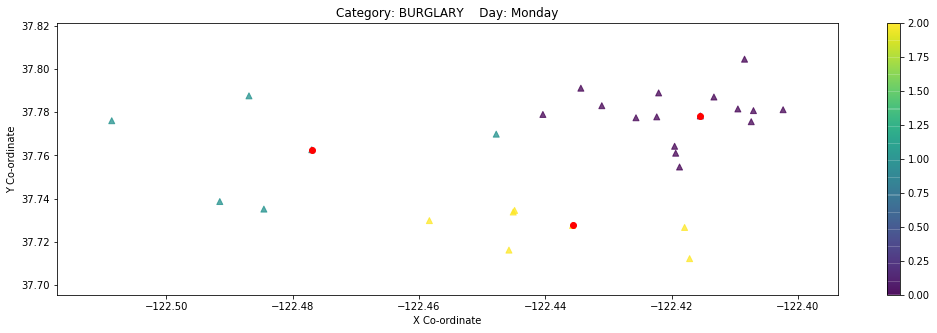

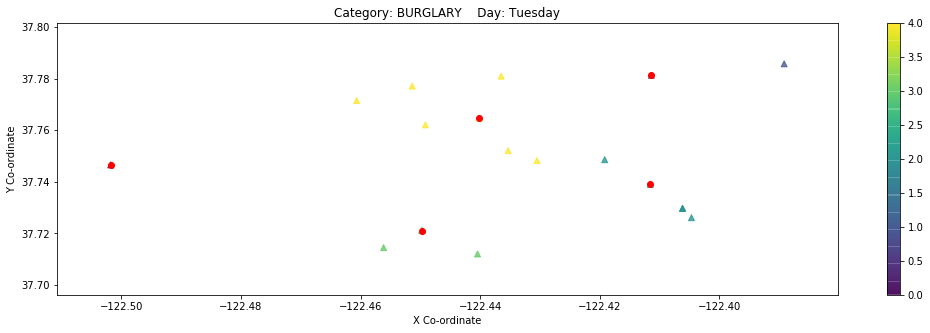

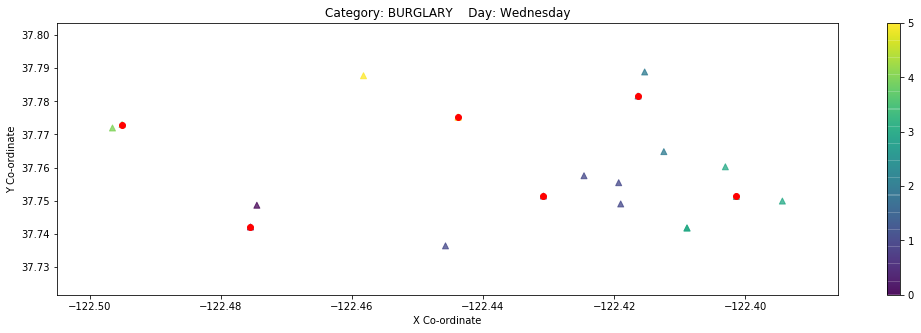

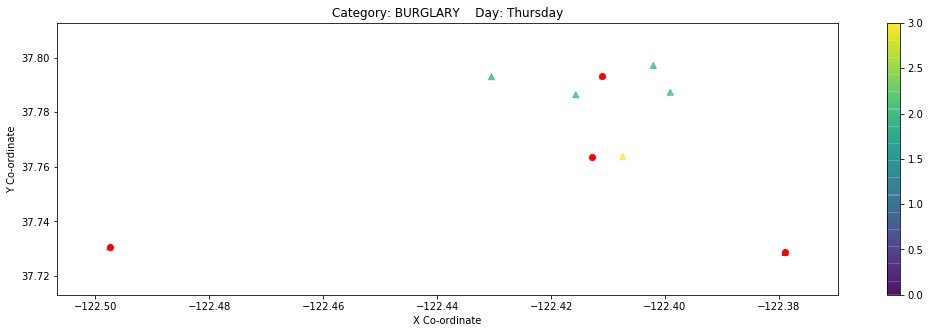

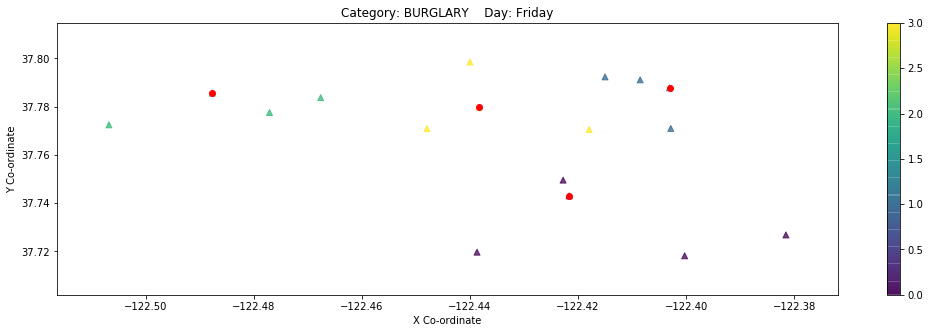

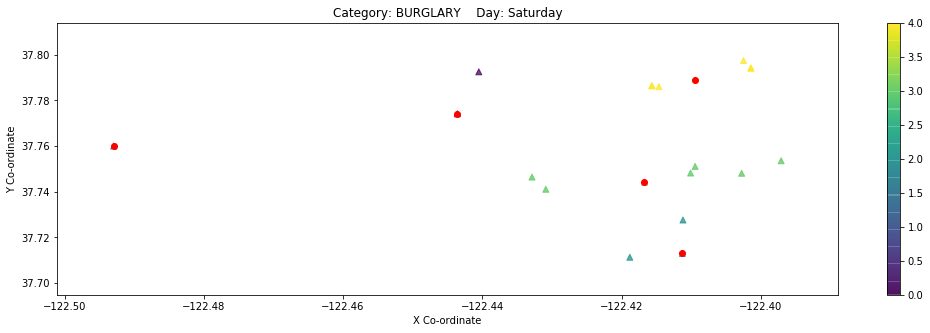

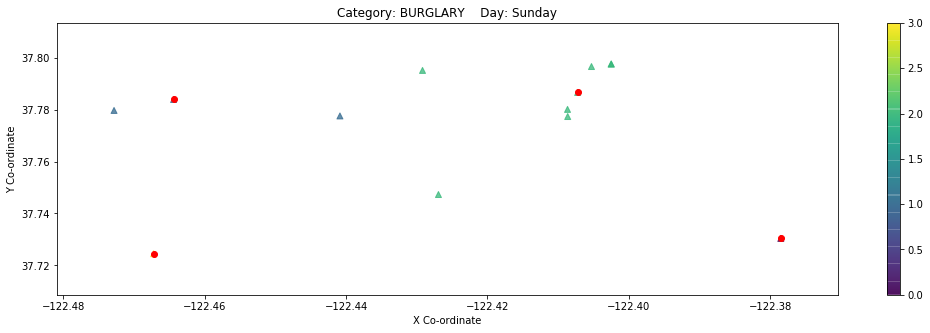

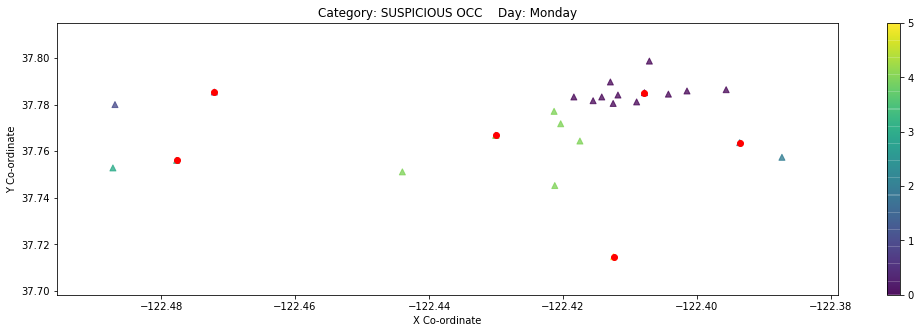

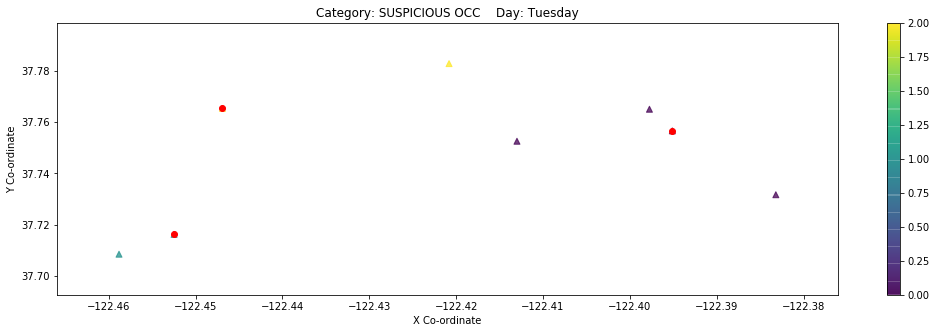

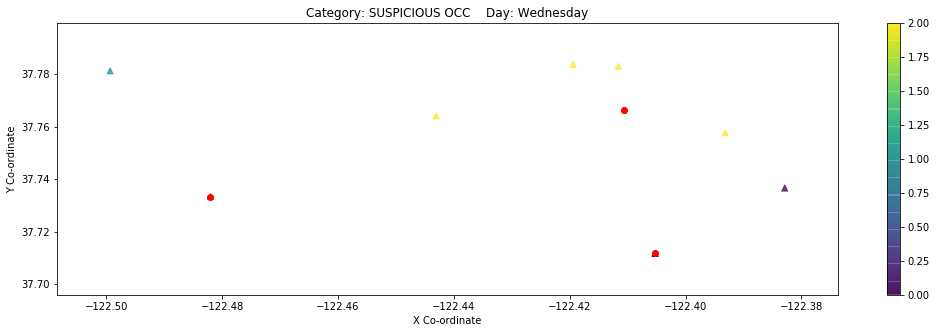

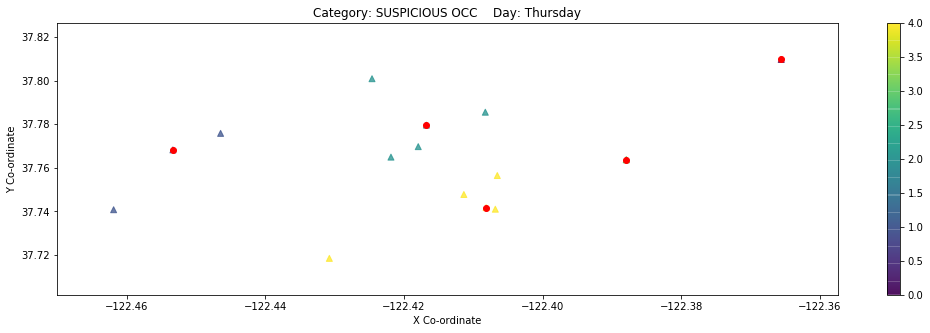

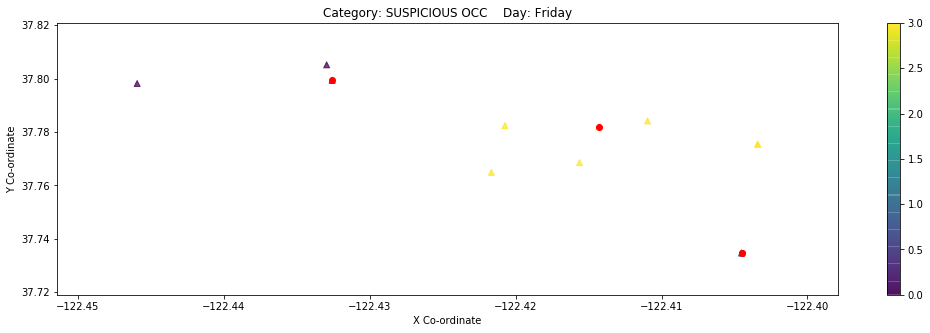

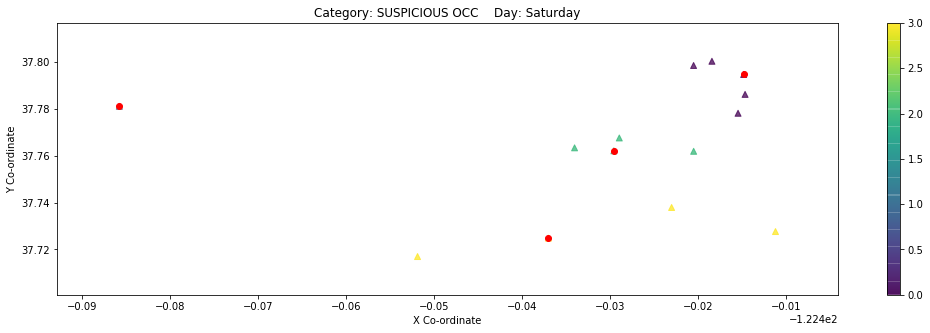

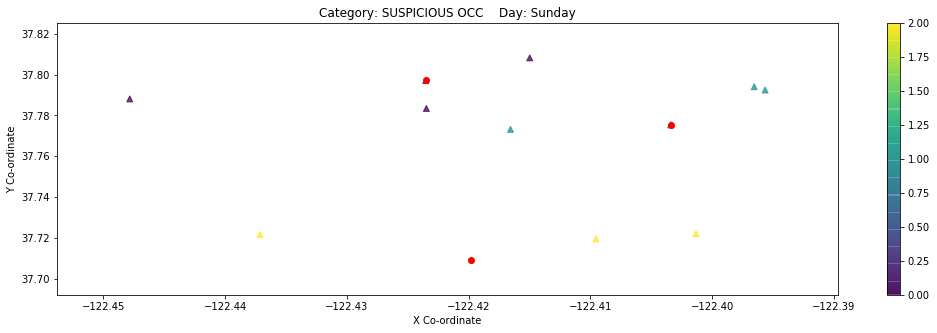

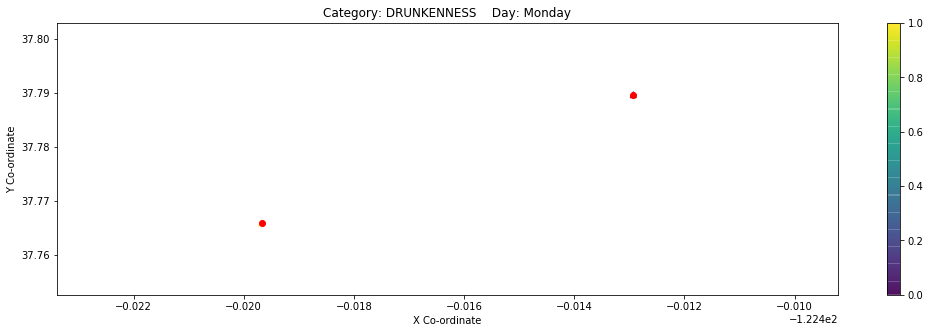

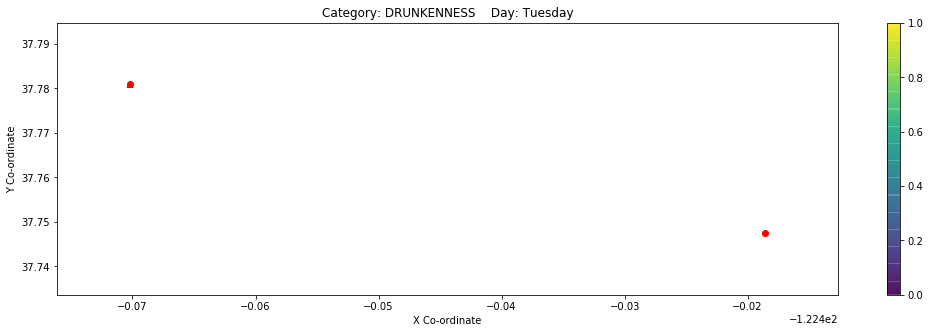

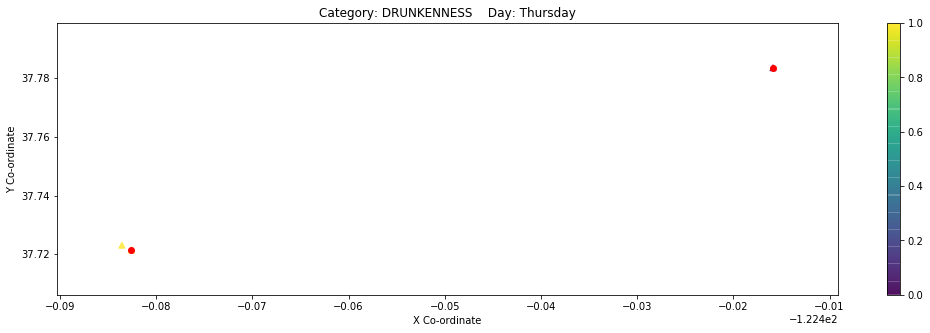

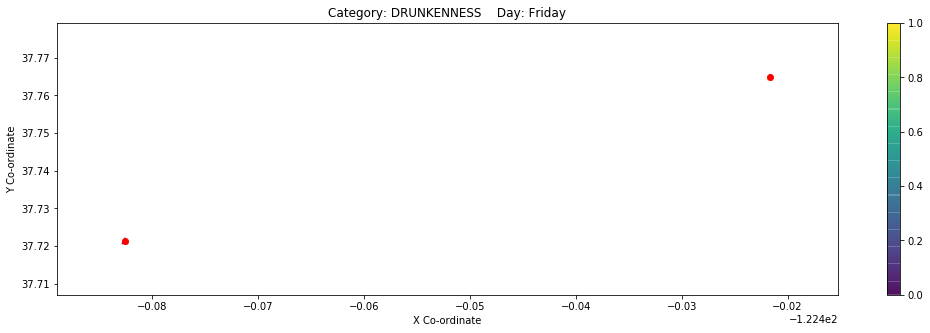

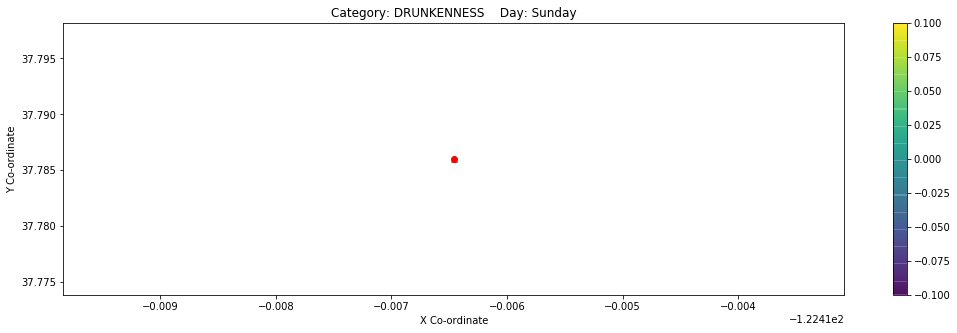

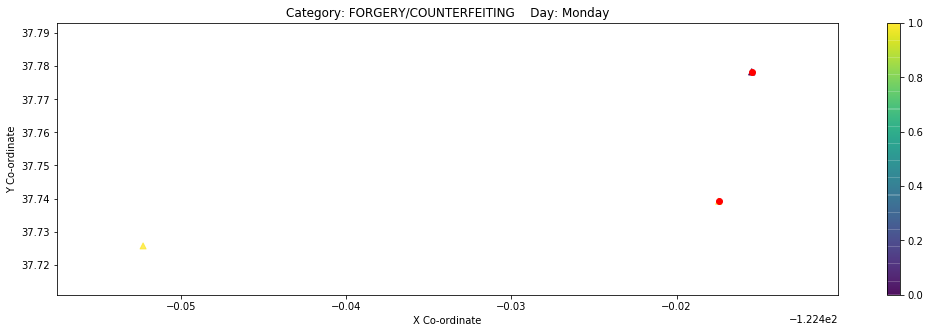

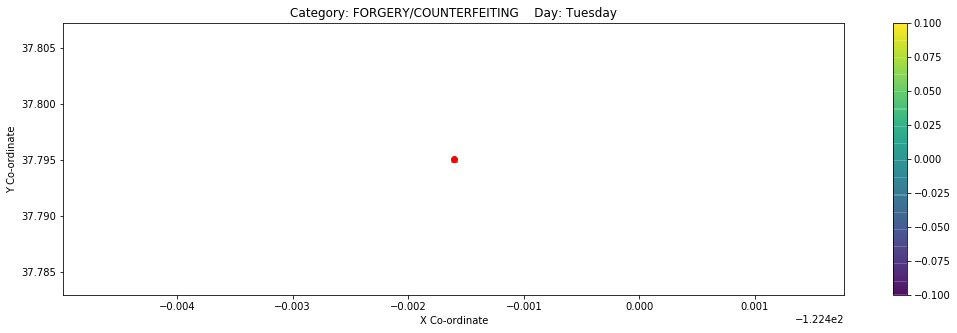

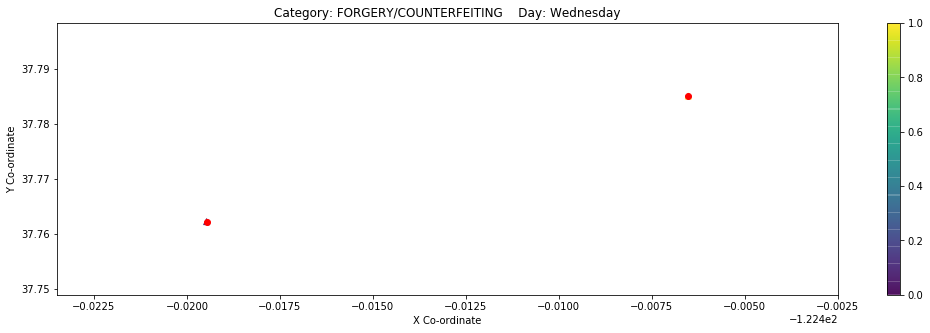

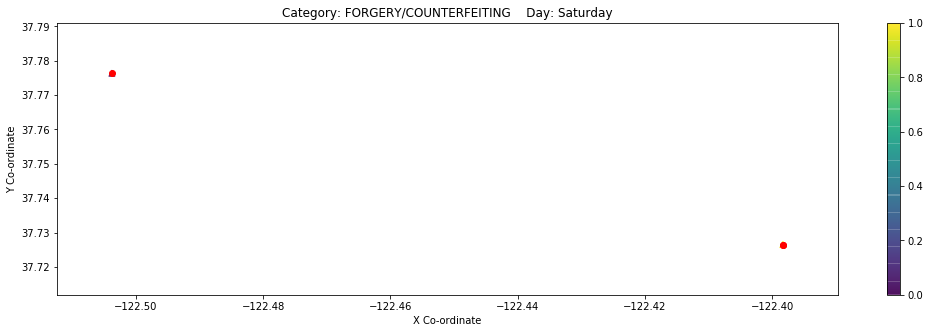

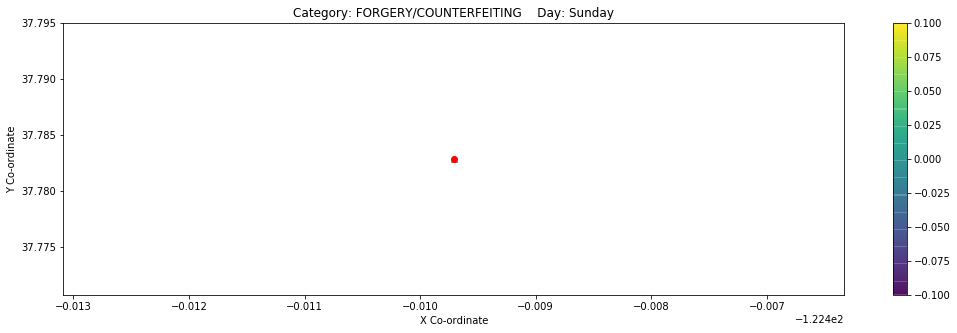

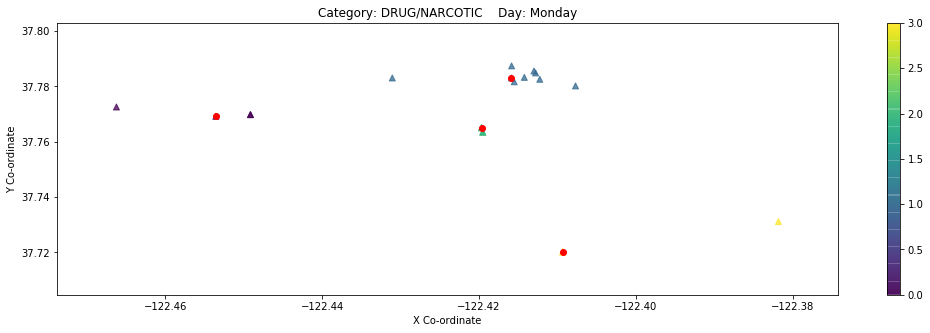

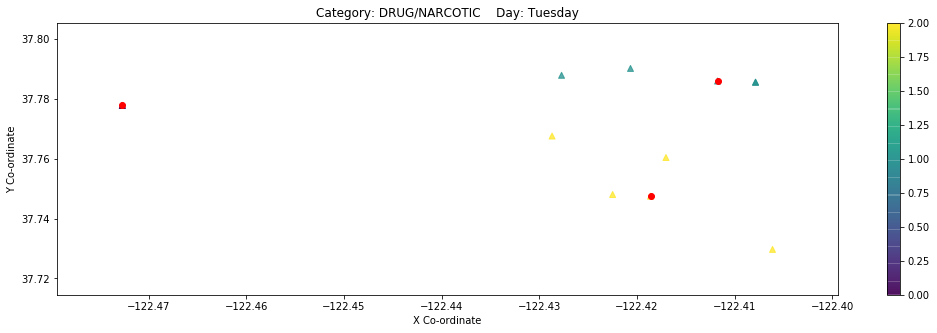

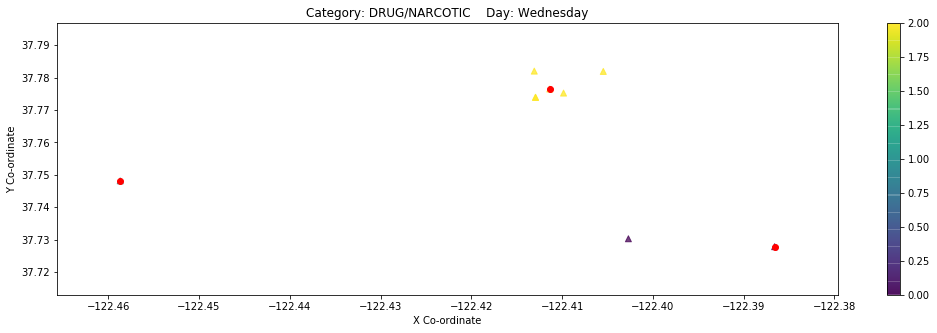

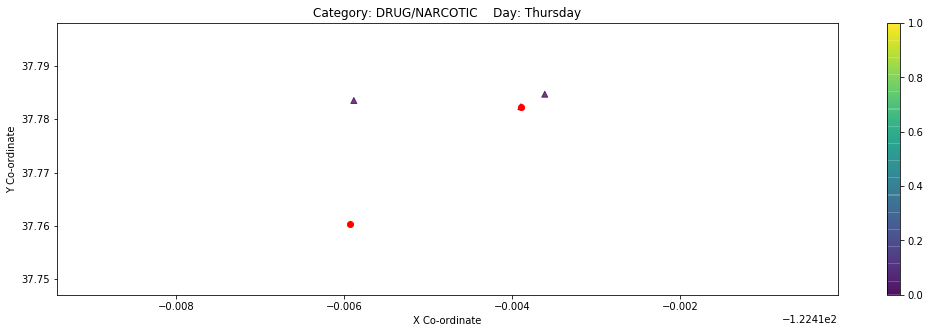

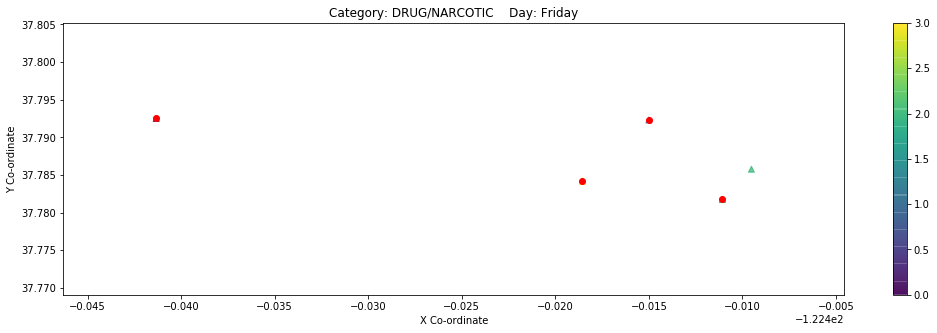

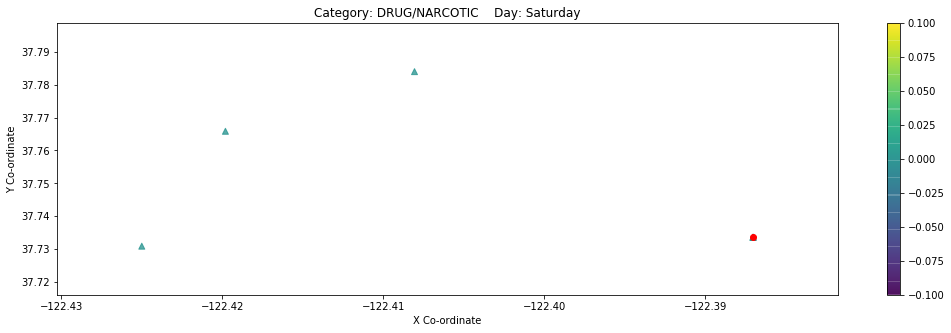

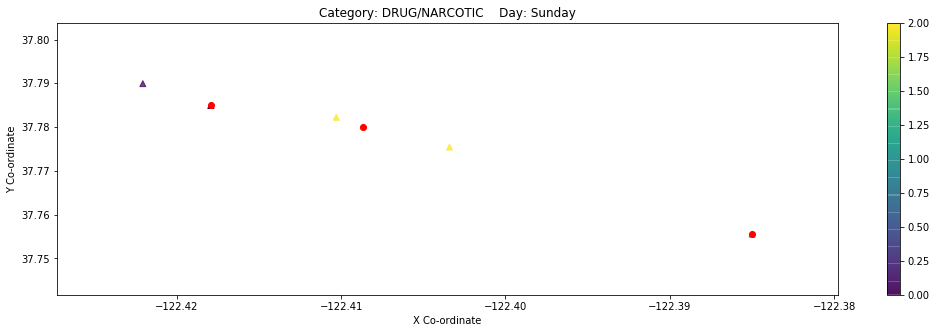

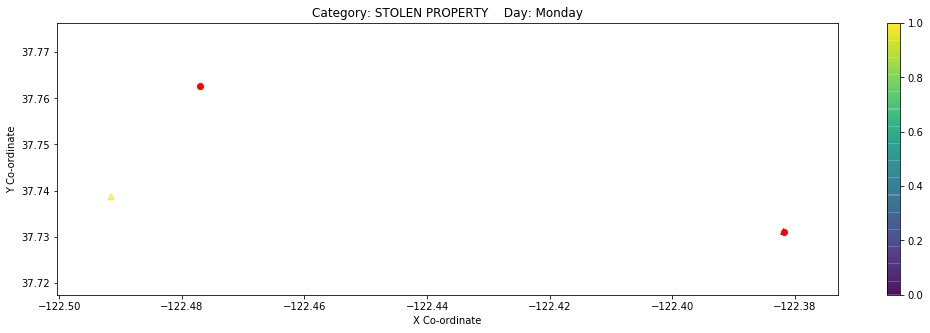

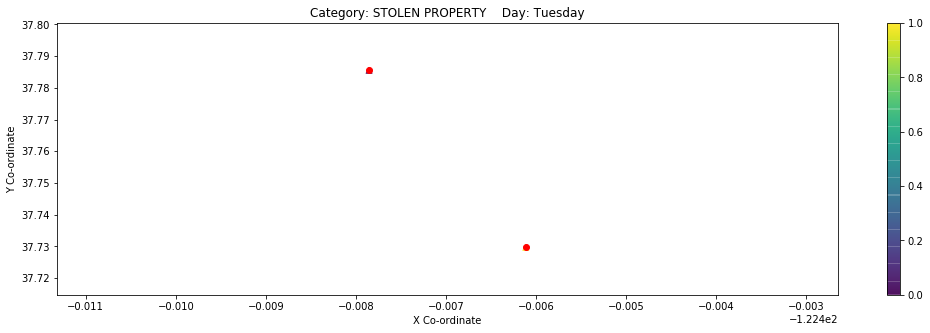

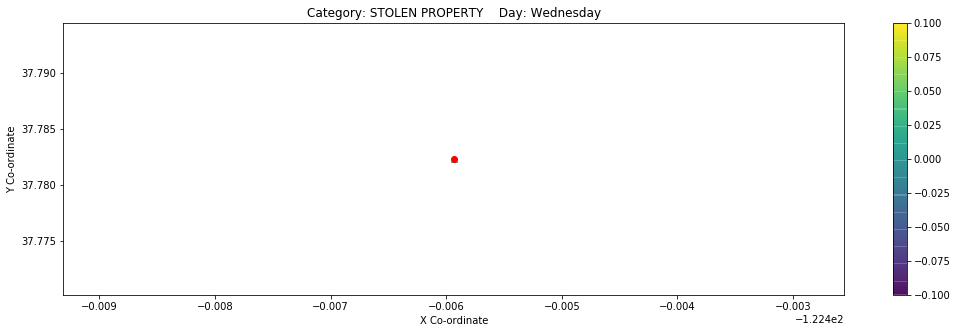

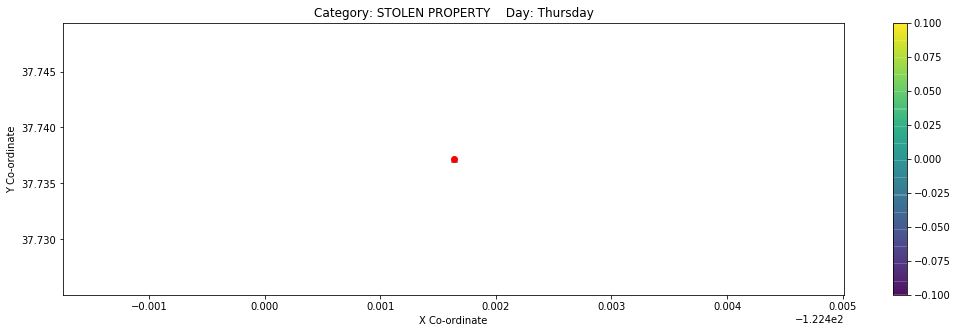

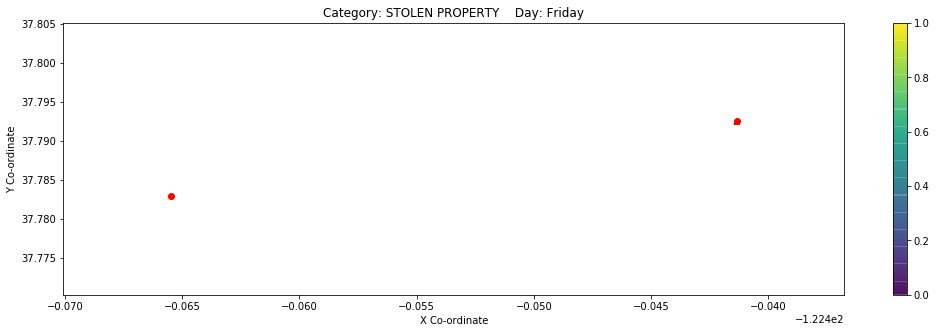

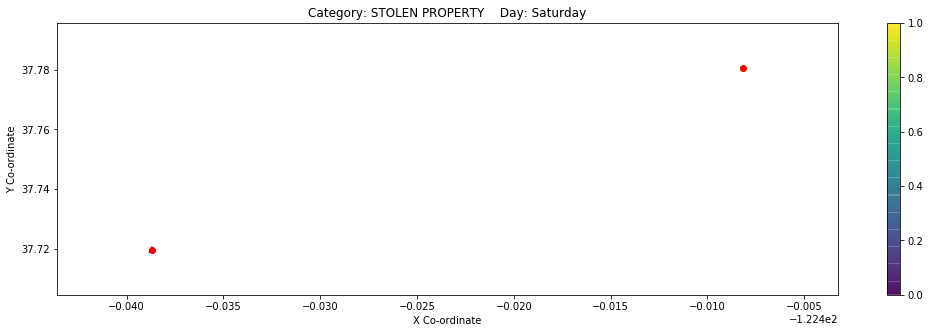

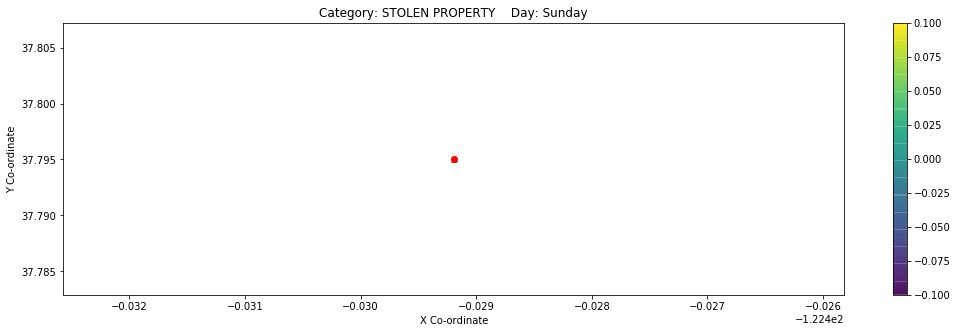

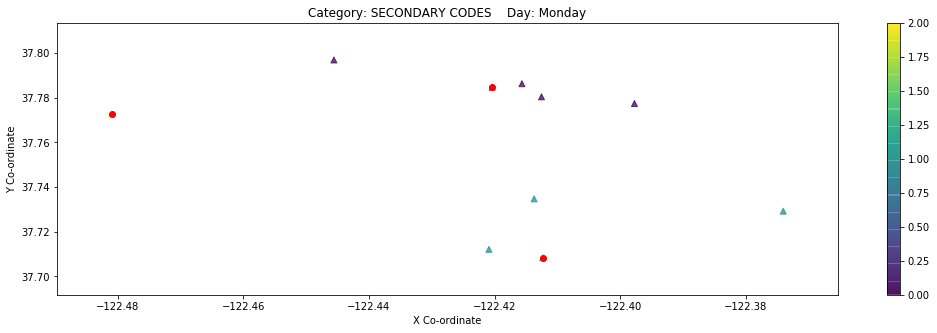

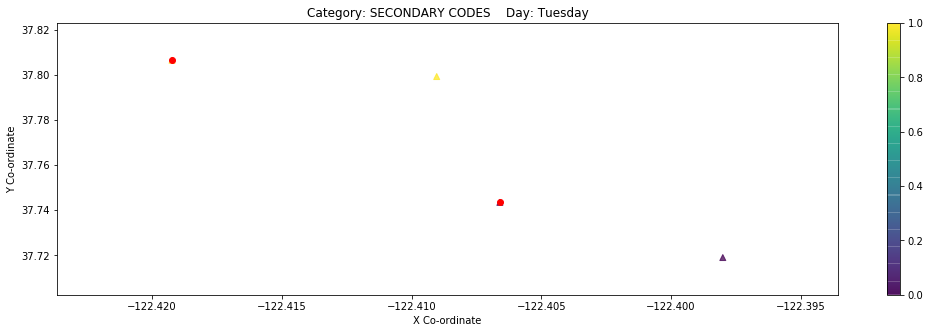

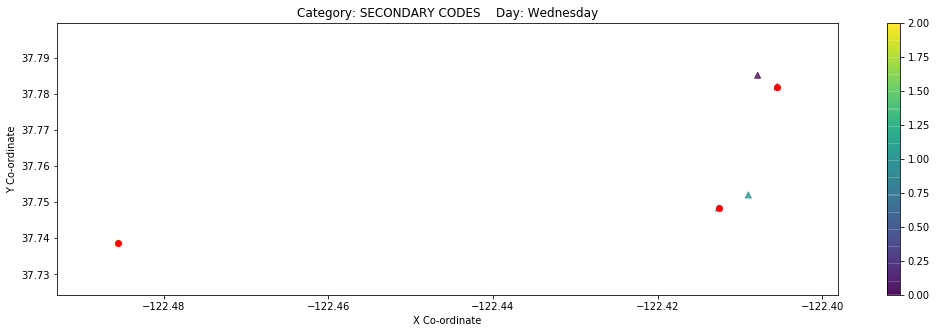

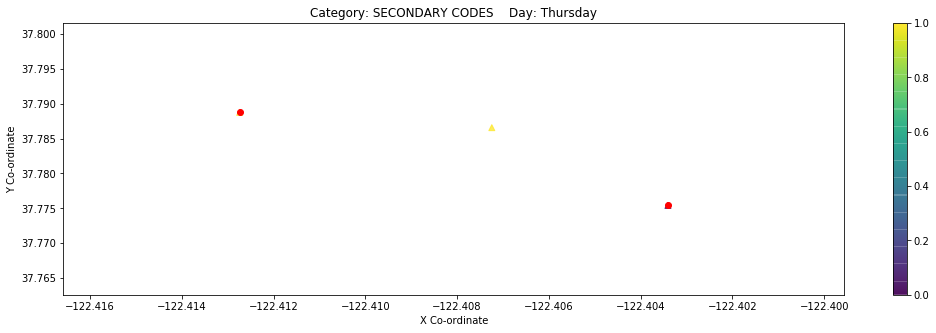

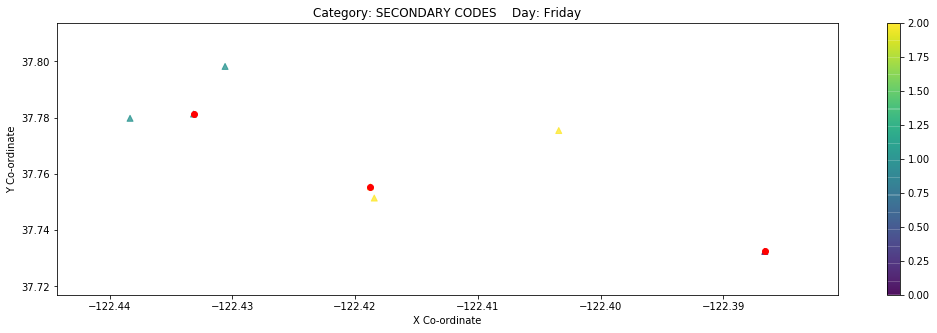

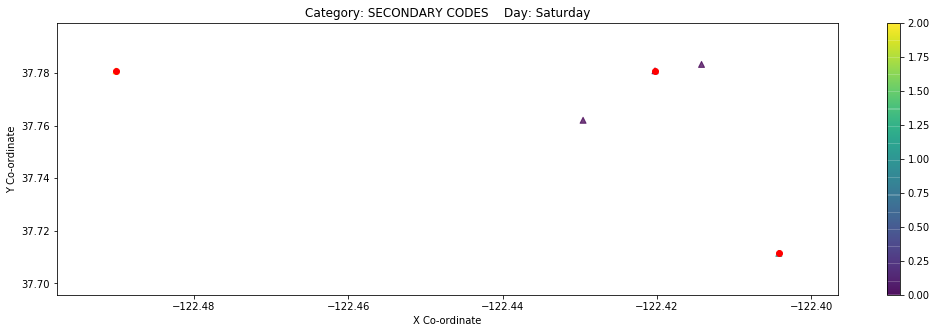

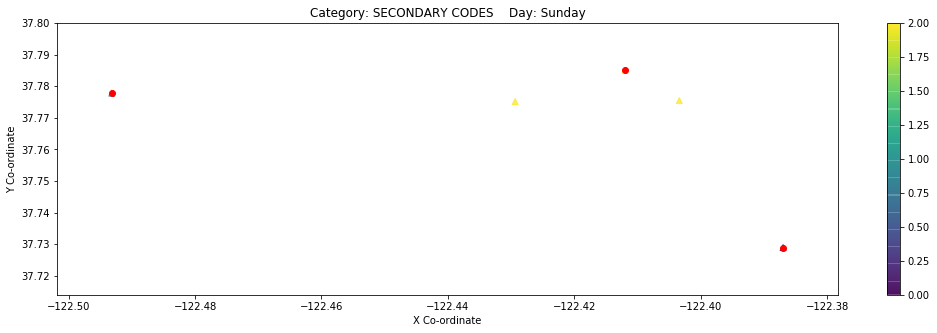

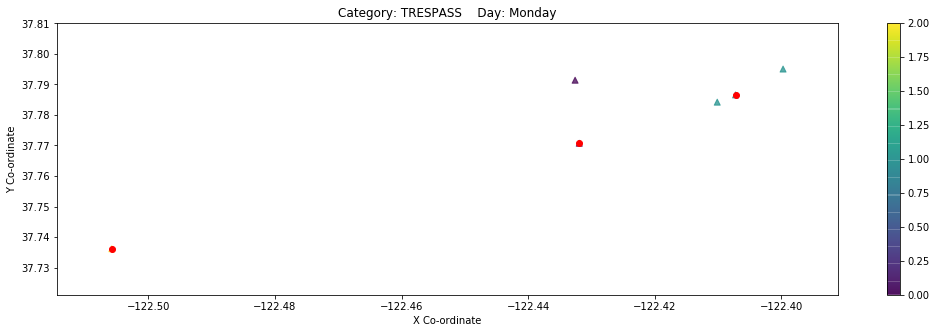

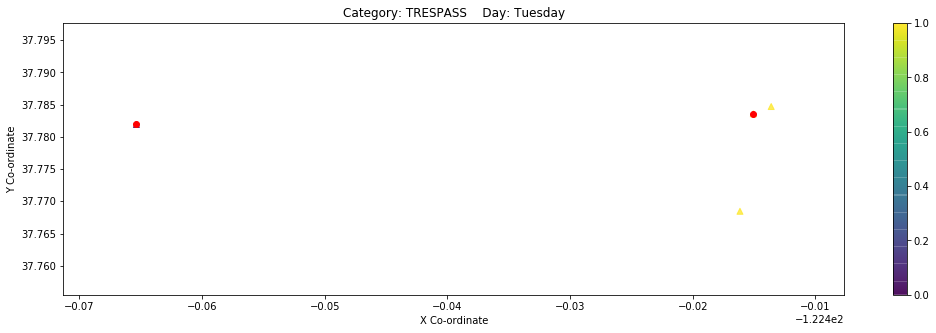

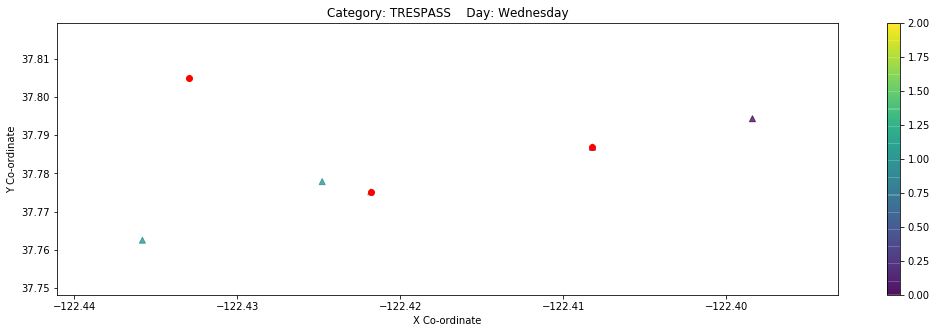

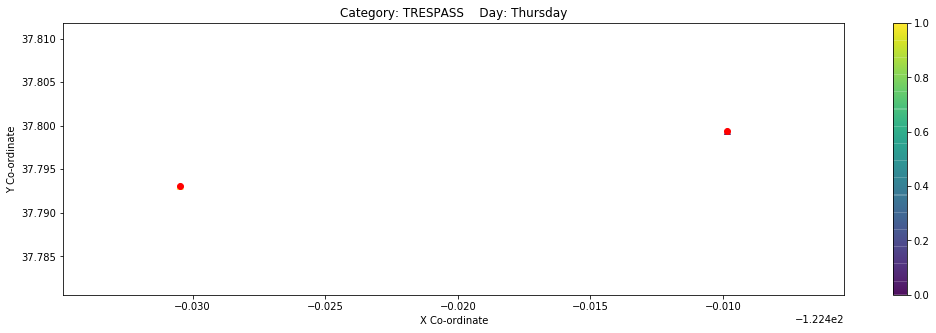

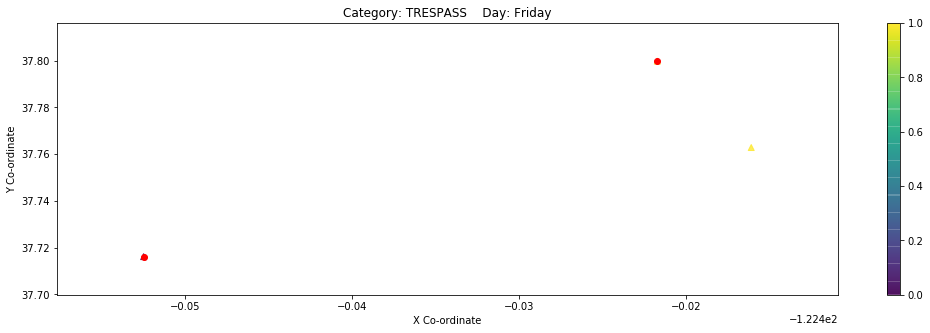

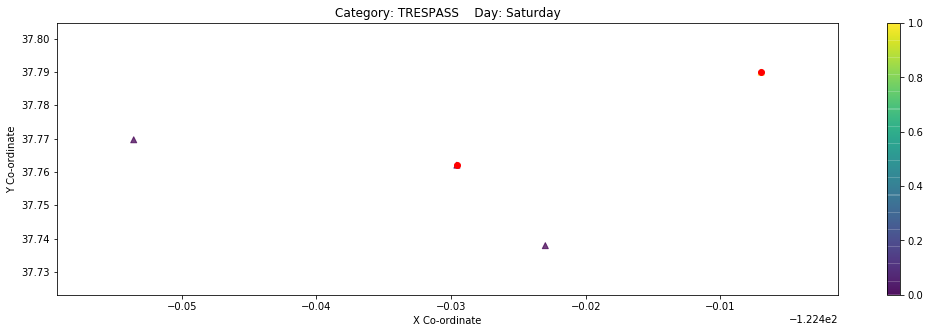

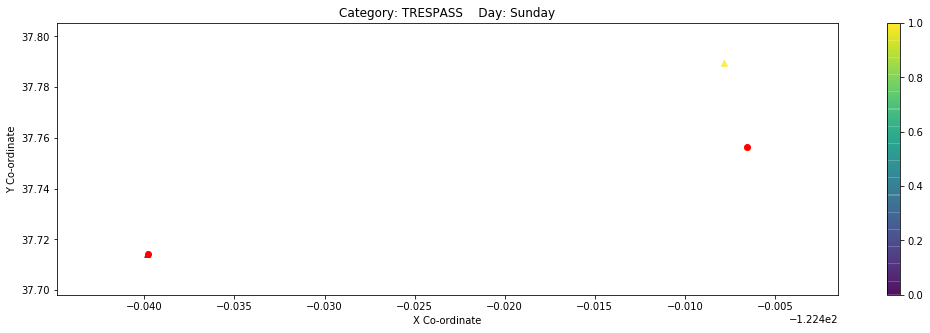

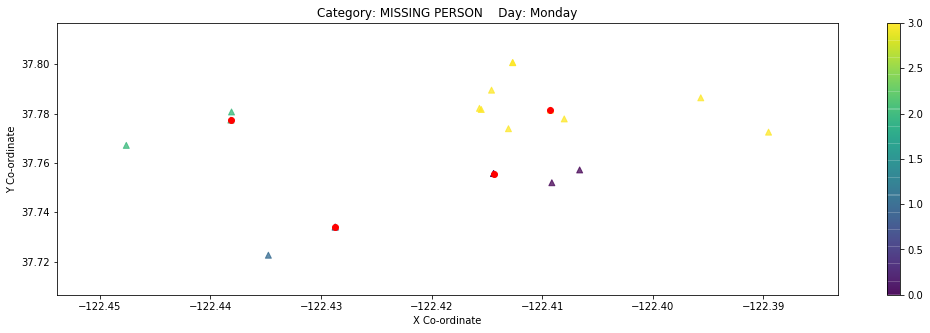

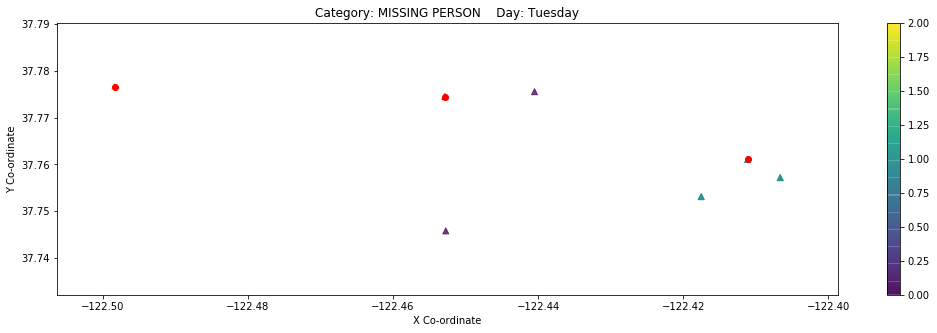

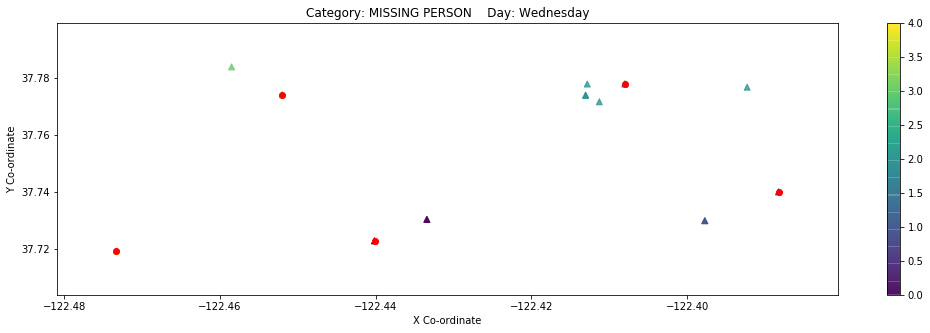

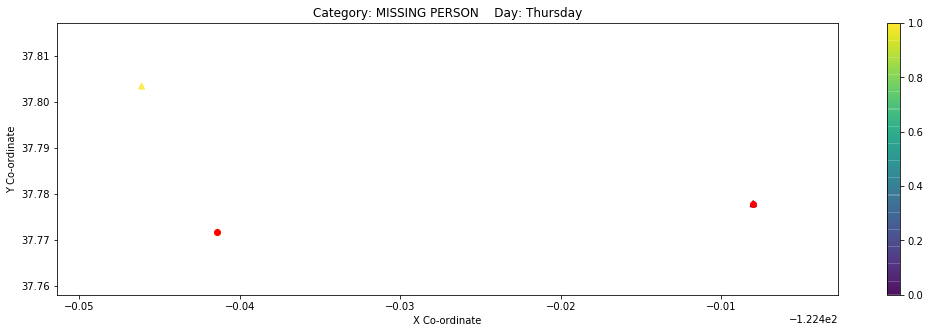

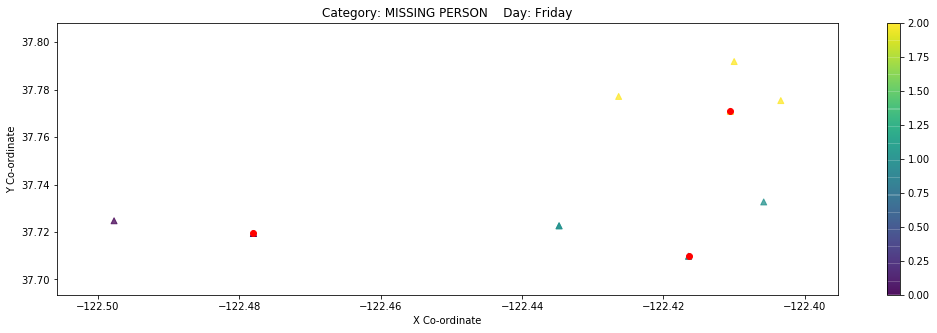

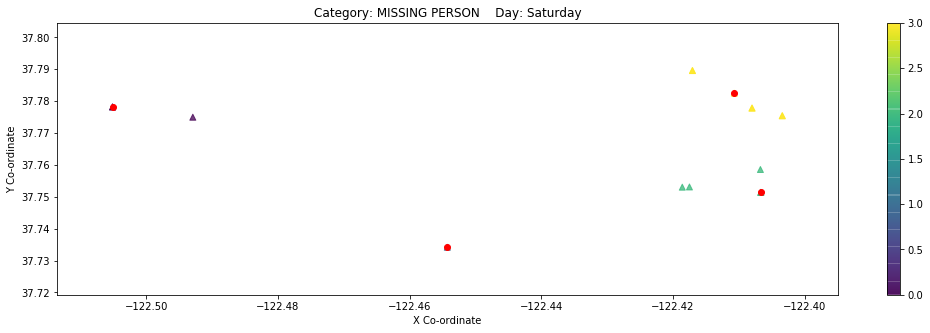

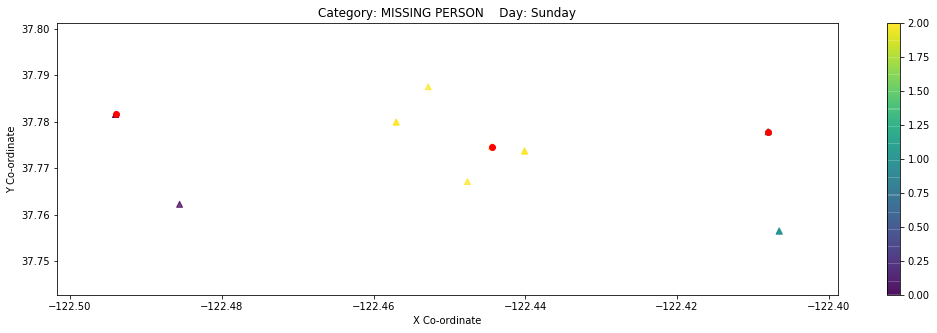

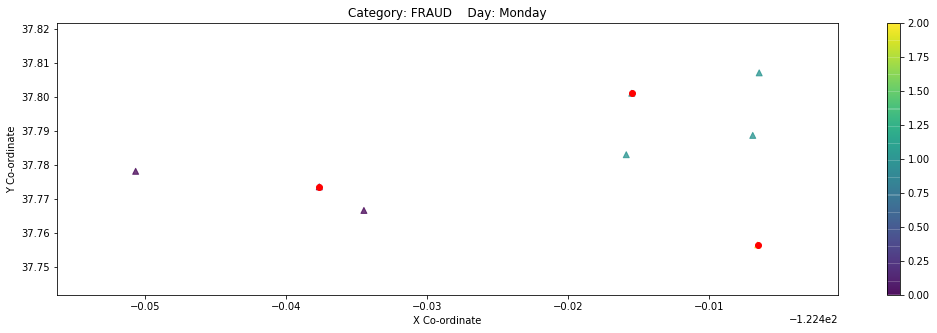

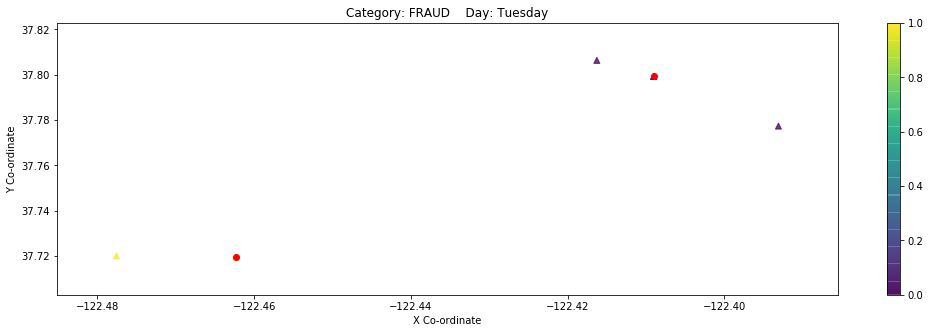

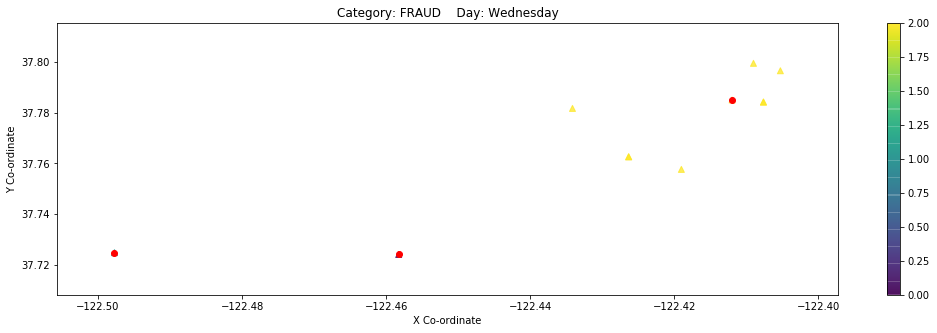

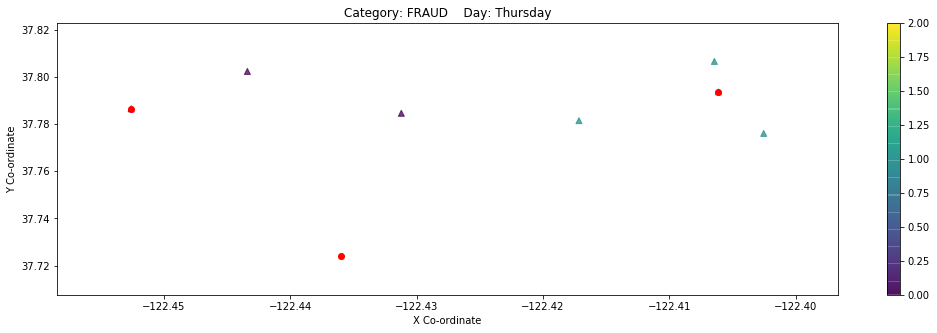

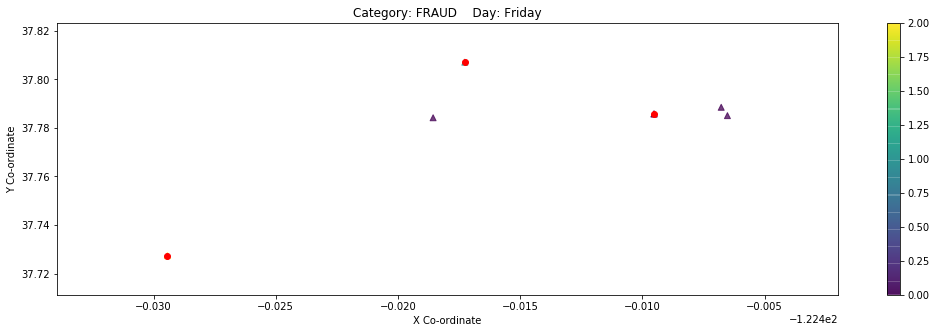

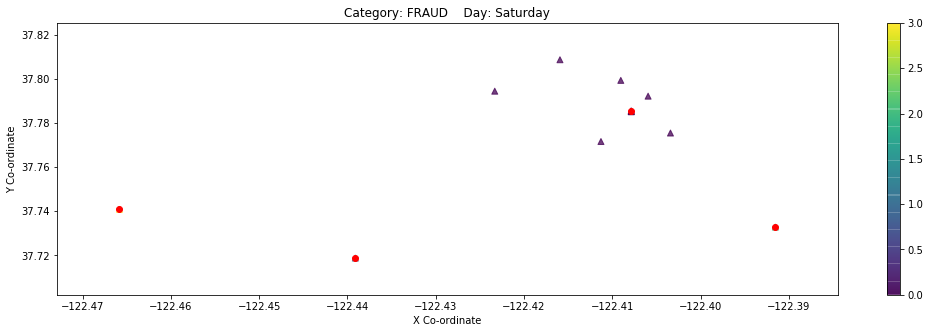

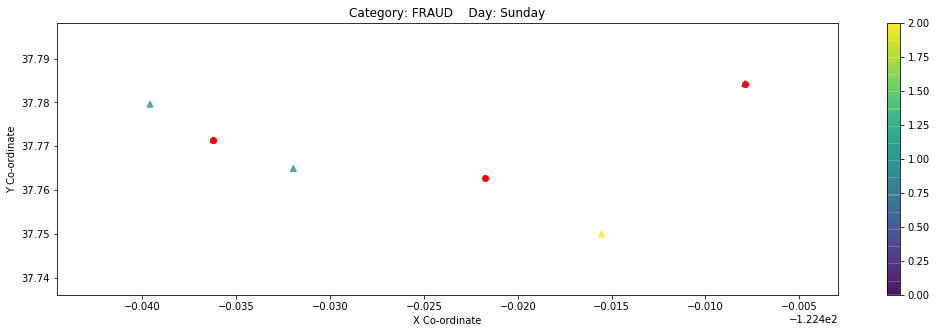

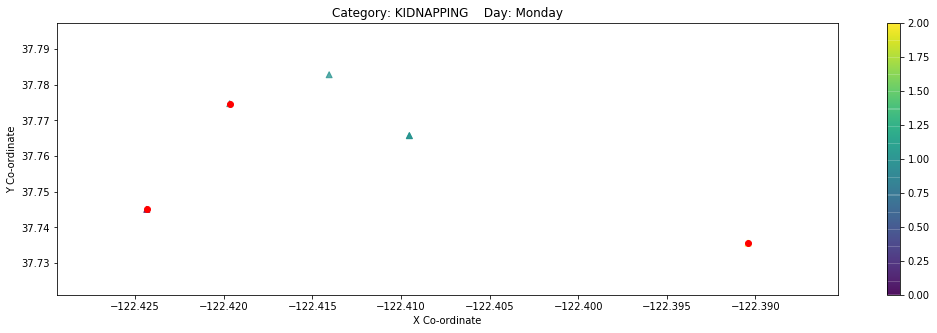

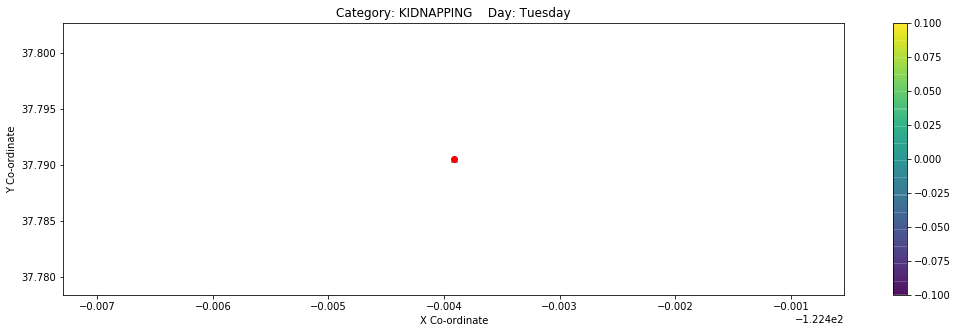

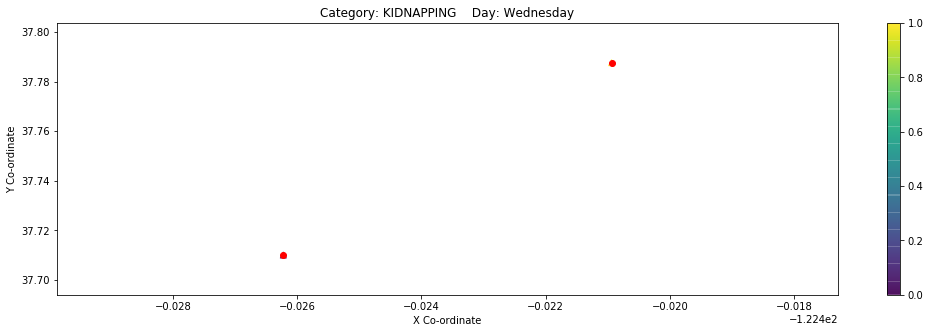

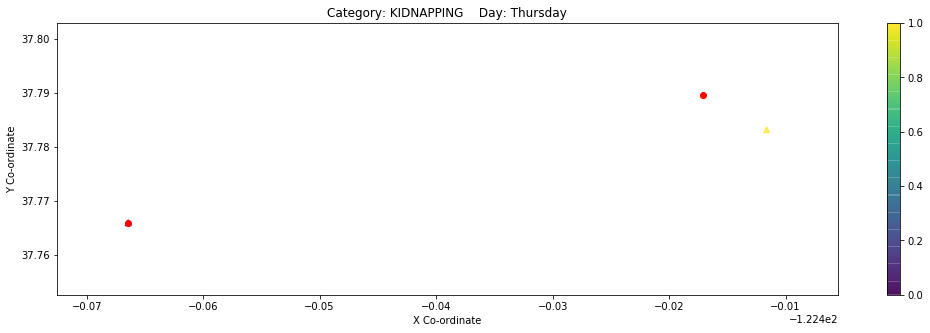

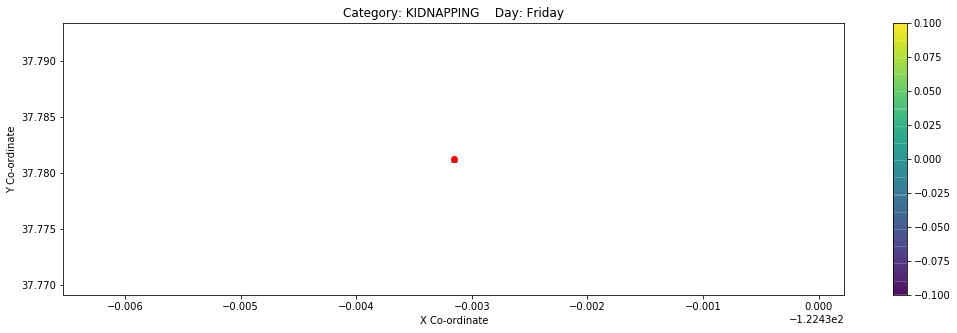

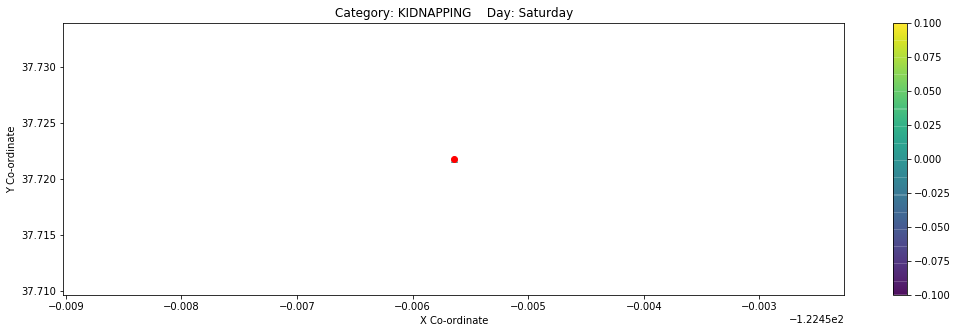

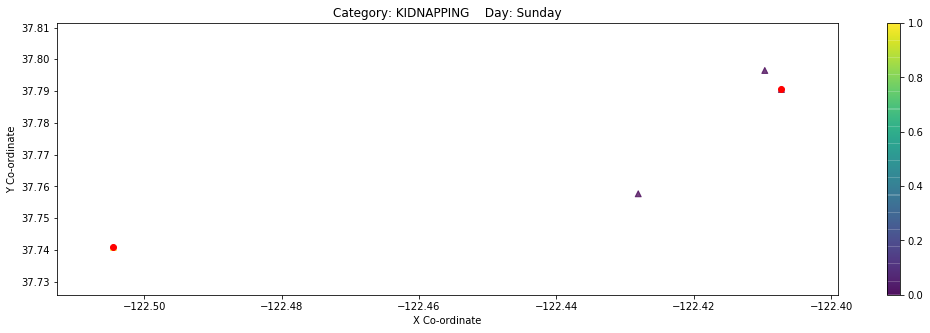

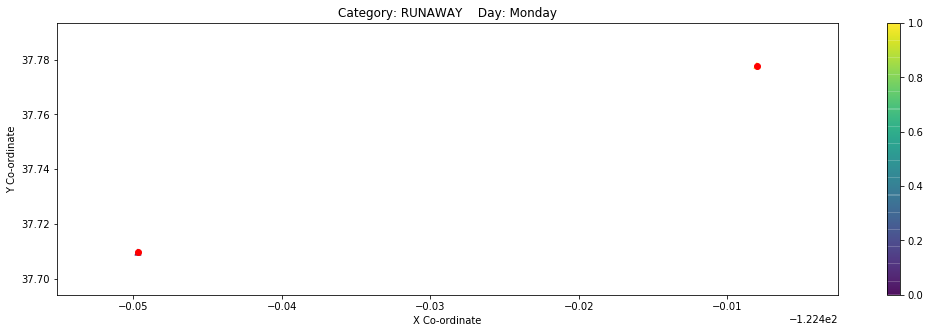

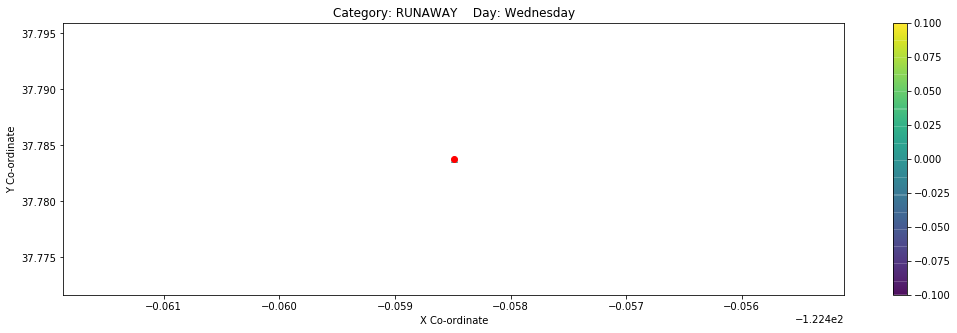

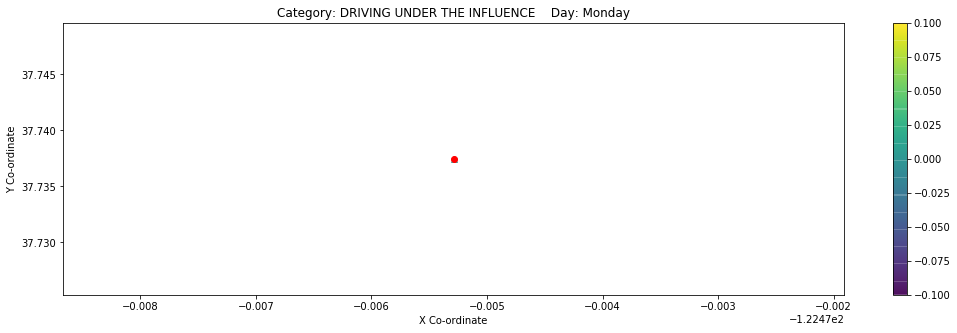

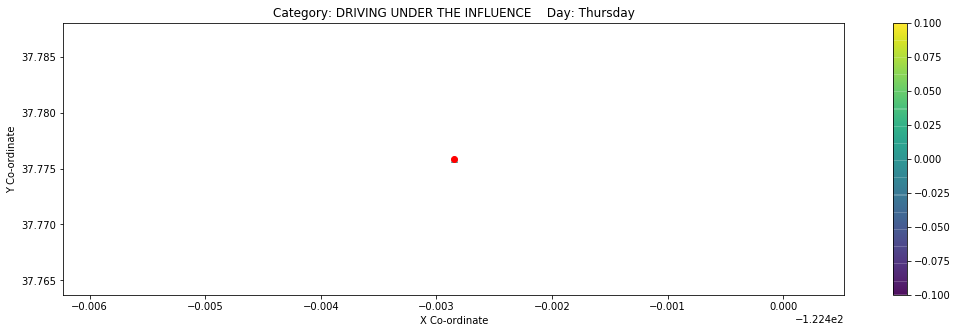

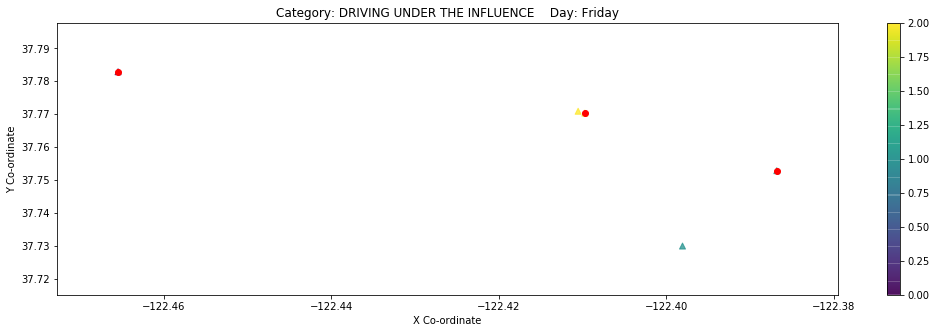

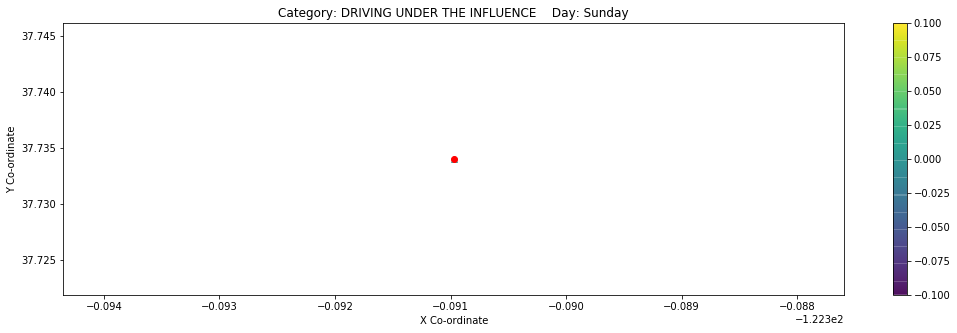

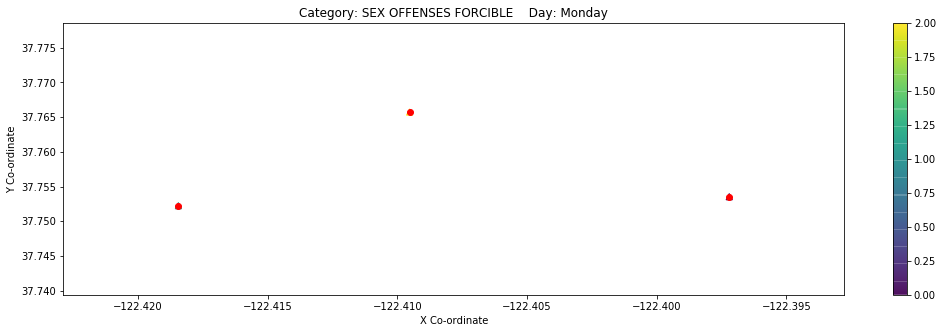

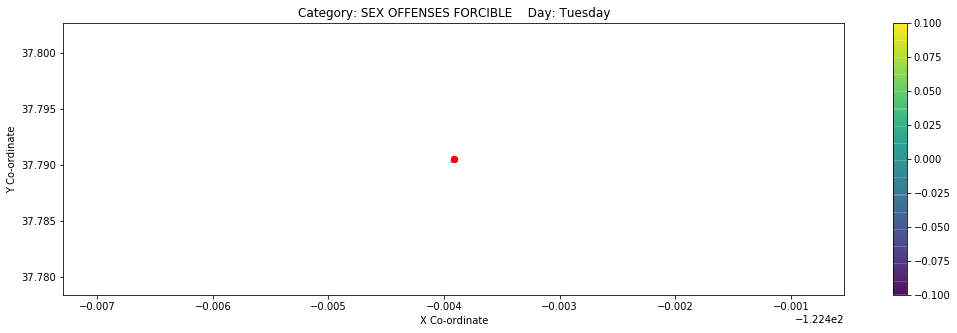

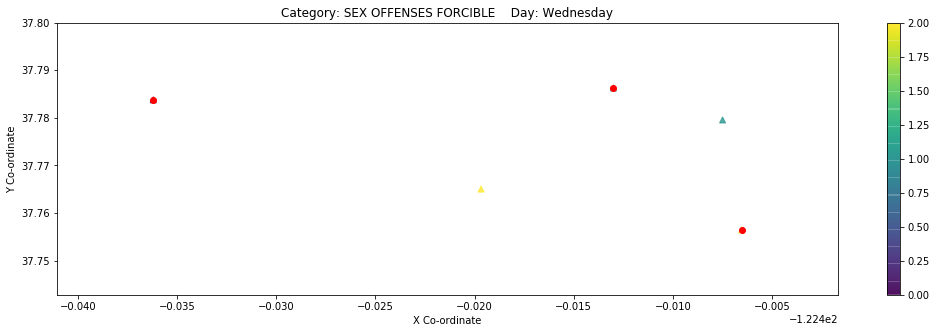

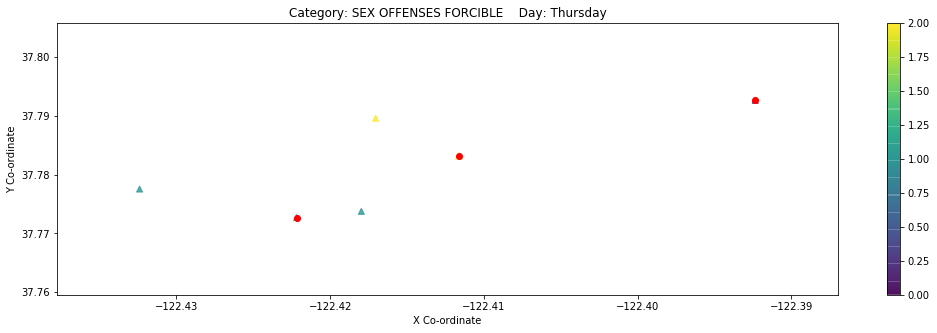

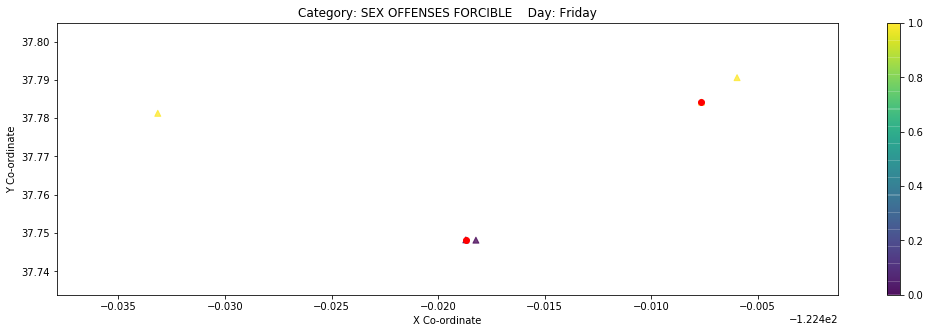

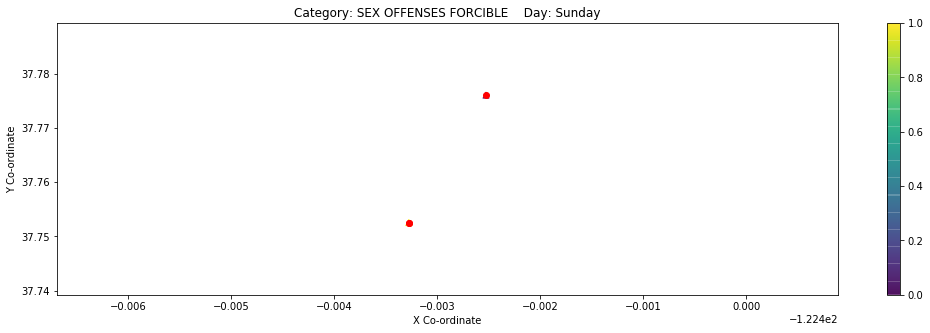

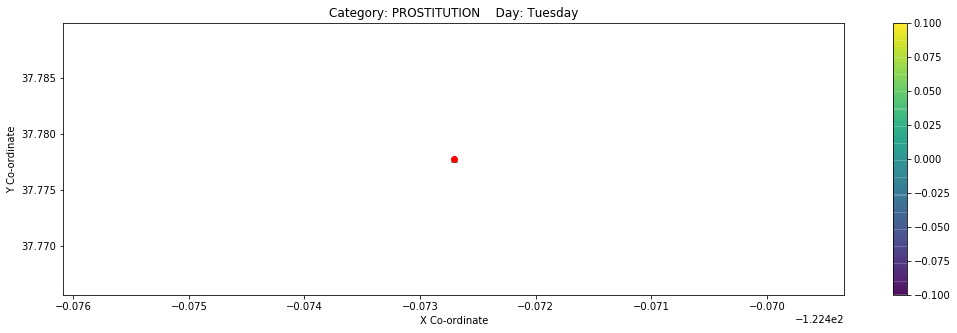

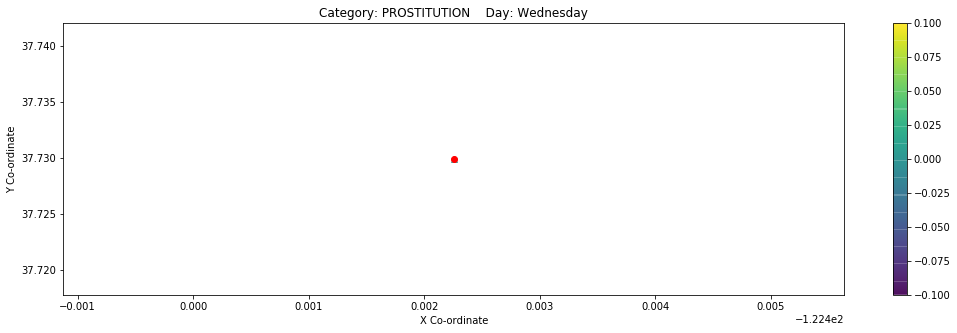

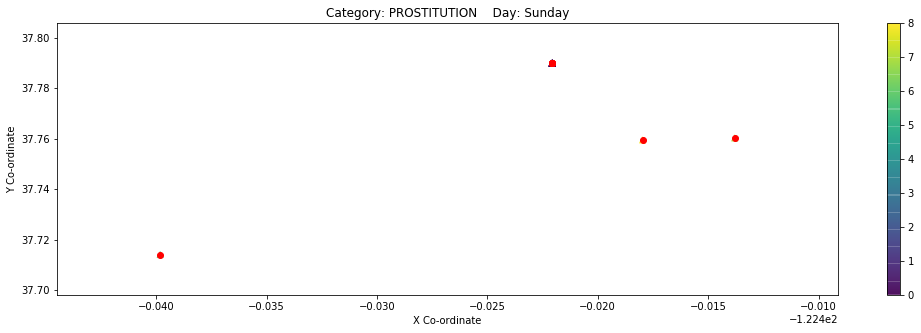

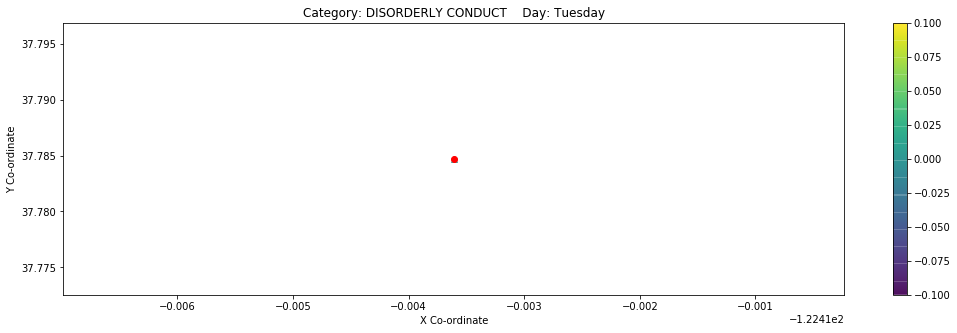

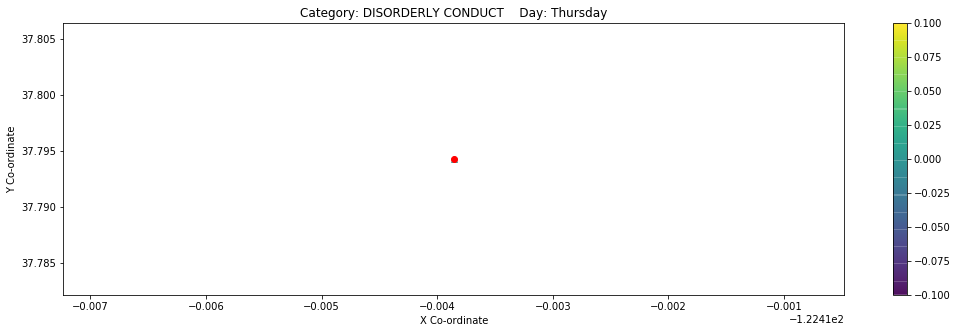

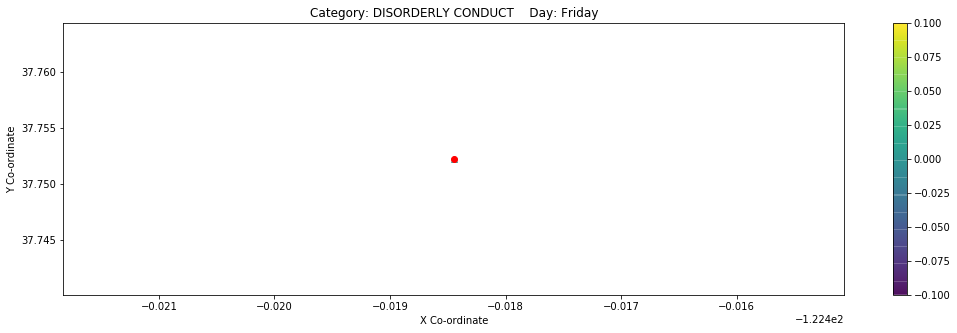

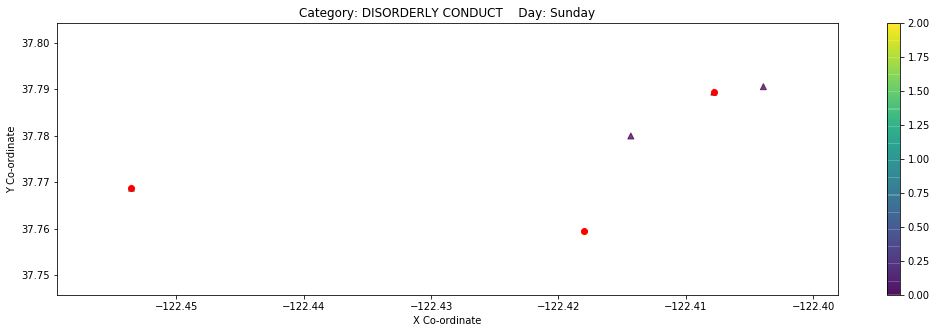

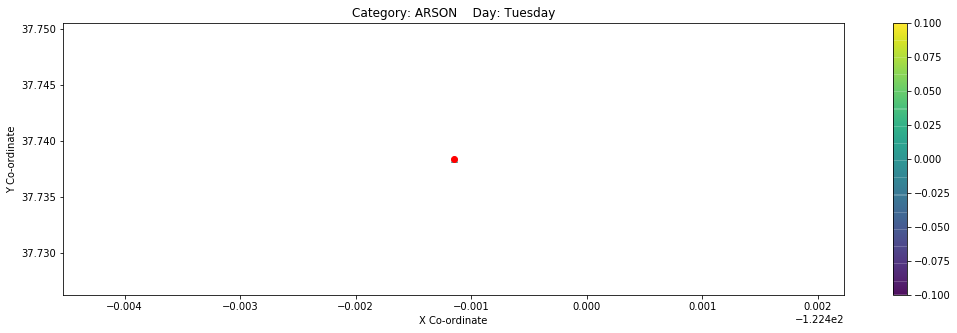

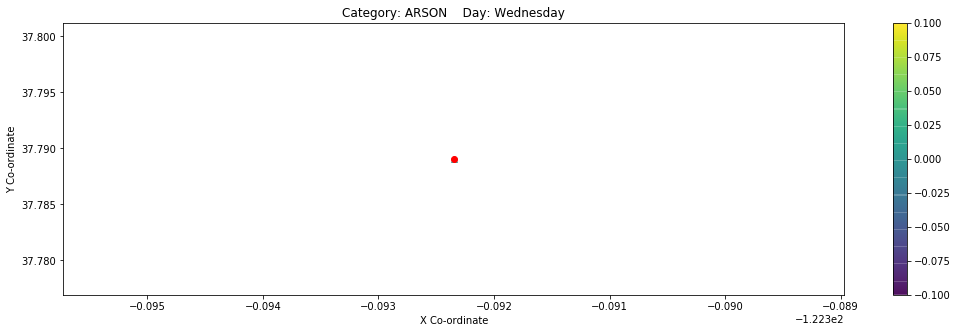

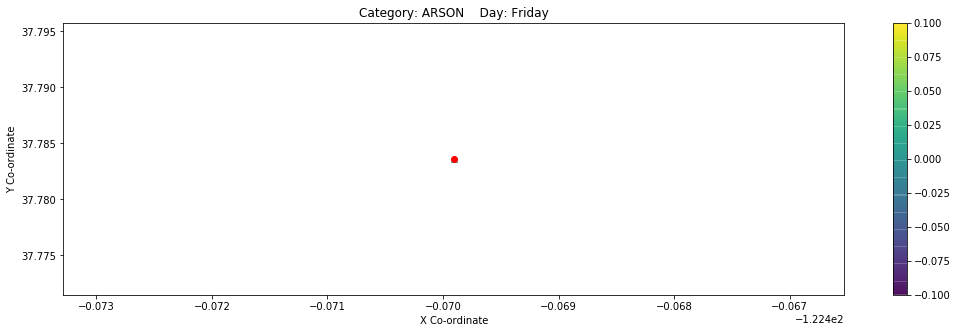

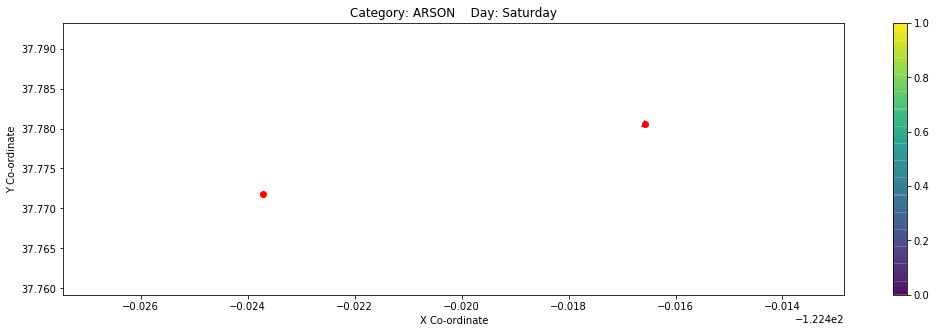

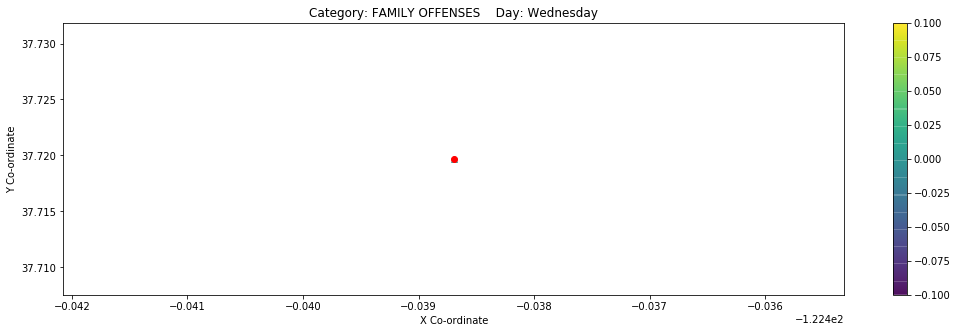

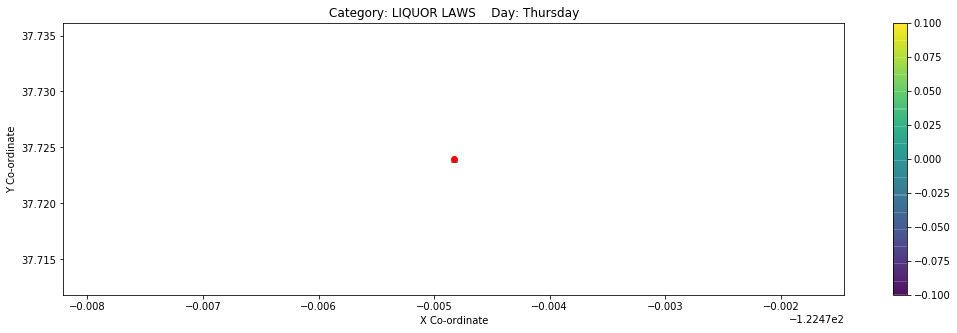

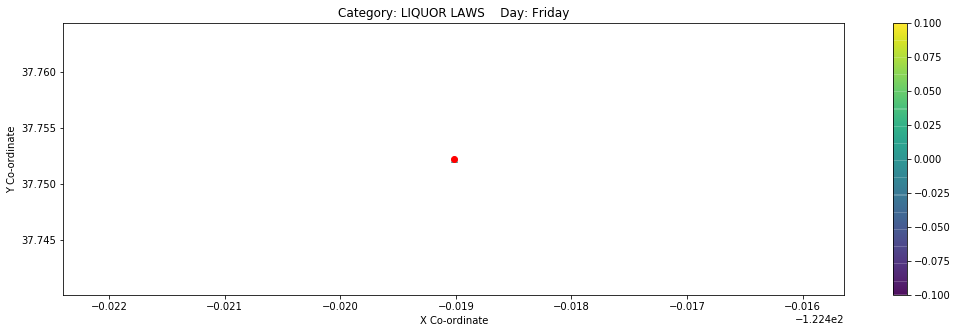

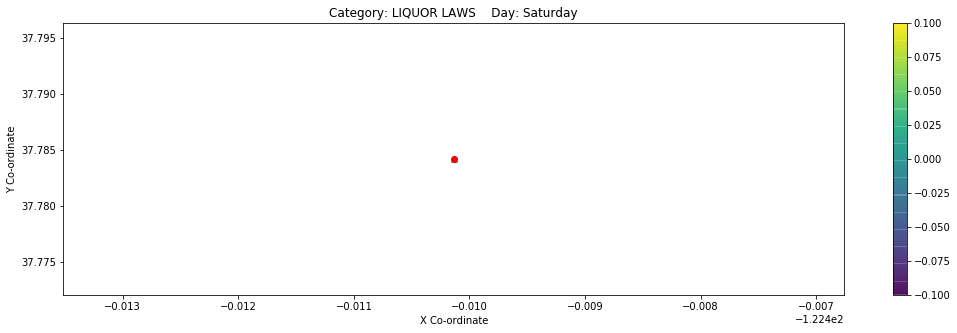

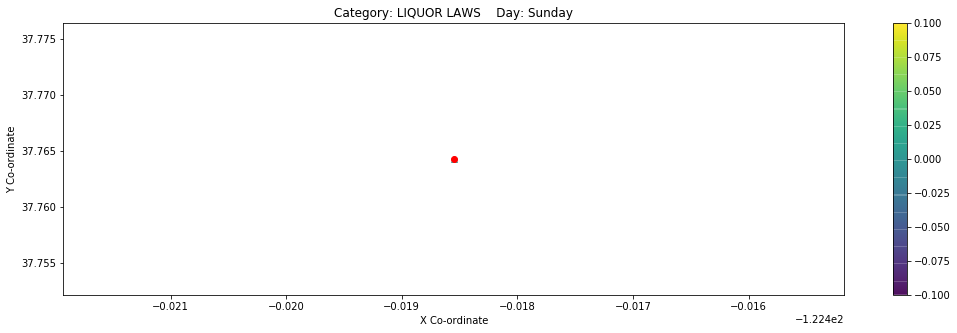

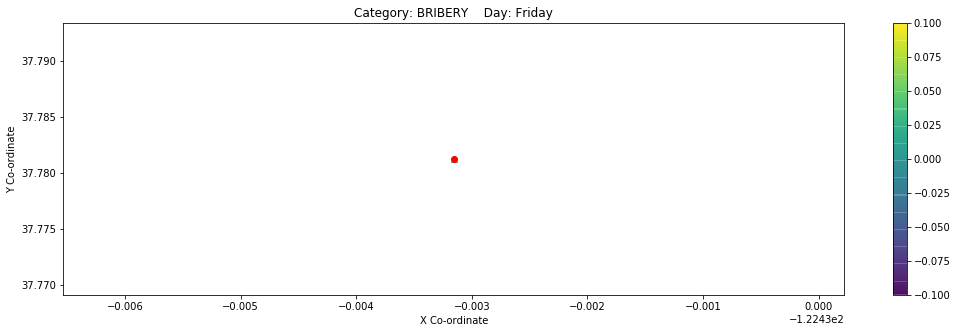

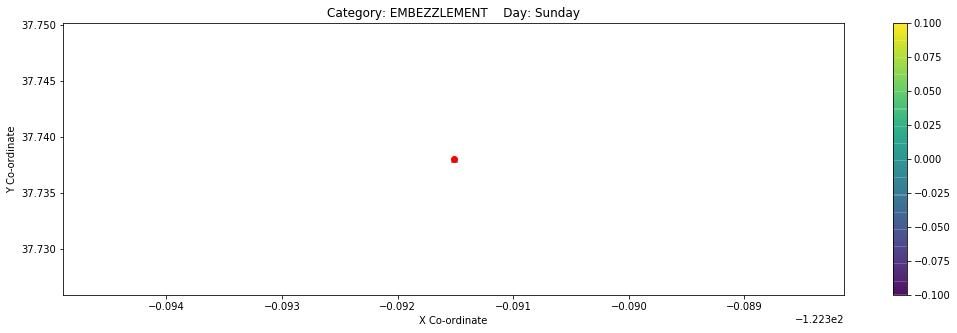

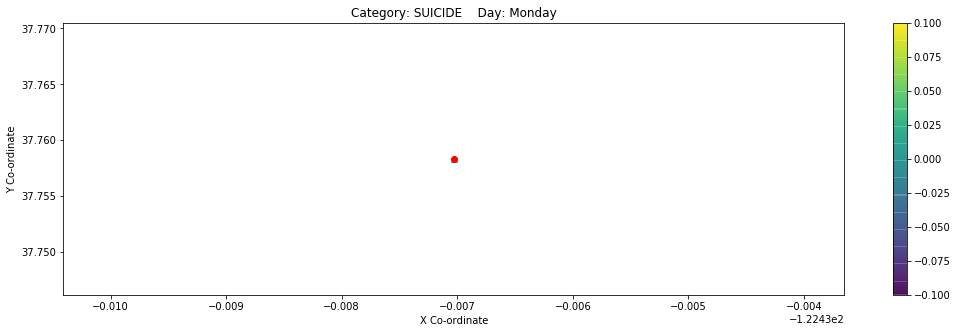

In [14]:
# Scatter plot of offences w.r.t day (clustering: per category based)

def weekdayCrime2(temp, day, crime):
    day_index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    clust_labels2, cent2 = doAffinity(temp)
    affinity = pd.DataFrame(clust_labels2)
    temp.insert((temp.shape[1]),'affinity',affinity)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(temp['X'], temp['Y'], c = affinity[0],  marker='^' , alpha=0.75)
    title = "Category: "+ crime + "    Day: "+ day_index[day]
    ax.set_title(title)
    ax.set_xlabel('X Co-ordinate')
    ax.set_ylabel('Y Co-ordinate')
    plt.colorbar(scatter)
    #plt.figure()
    plt.scatter(cent2[:,2],cent2[:,3], marker='o', color='r')

def crimeCatDay(df, cat):
    Cat_Index = ['WARRANTS','OTHER OFFENSES','LARCENY/THEFT','VEHICLE THEFT','VANDALISM','NON-CRIMINAL','ROBBERY','ASSAULT','WEAPON LAWS','BURGLARY','SUSPICIOUS OCC','DRUNKENNESS','FORGERY/COUNTERFEITING','DRUG/NARCOTIC','STOLEN PROPERTY','SECONDARY CODES','TRESPASS','MISSING PERSON','FRAUD','KIDNAPPING','RUNAWAY','DRIVING UNDER THE INFLUENCE','SEX OFFENSES FORCIBLE','PROSTITUTION','DISORDERLY CONDUCT','ARSON','FAMILY OFFENSES','LIQUOR LAWS','BRIBERY','EMBEZZLEMENT','SUICIDE']
    for i in range(0,7):
        temp = df.loc[(df['DayOfWeek_id'] == i) & (df['category_id']==cat)]
        if(len(temp)>0):
            weekdayCrime2(temp, i, Cat_Index[cat])
        
columnsTitles=['category_id', 'DayOfWeek_id','X','Y']
df_temp = crime_data.reindex(columns=columnsTitles)
for i in range(0,31):
    crimeCatDay(df_temp,i)

In [15]:
# we see that there's not much correlation between the other columns and the category so we would consider the other approach i.e., use "Descript" column from
# Crime1.csv and search for keywords specific to the crime

category_id_df = crime_data[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(crime_data['Descript']).toarray()
labels = crime_data['category_id']
features.shape

N = 2
for Category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Category))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  

# 'ARSON':
  . Most correlated unigrams:
       . attempted
       . arson
  . Most correlated bigrams:
       . theft locked
       . grand theft
# 'ASSAULT':
  . Most correlated unigrams:
       . assault
       . battery
  . Most correlated bigrams:
       . threats life
       . aggravated assault
# 'BRIBERY':
  . Most correlated unigrams:
       . theft
       . victim
  . Most correlated bigrams:
       . theft locked
       . grand theft
# 'BURGLARY':
  . Most correlated unigrams:
       . burglary
       . entry
  . Most correlated bigrams:
       . forcible entry
       . unlawful entry
# 'DISORDERLY CONDUCT':
  . Most correlated unigrams:
       . peace
       . disturbing
  . Most correlated bigrams:
       . grand theft
       . disturbing peace
# 'DRIVING UNDER THE INFLUENCE':
  . Most correlated unigrams:
       . influence
       . driving
  . Most correlated bigrams:
       . influence alcohol
       . driving influence
# 'DRUG/NARCOTIC':
  . Most correlated unigrams:
 

In [16]:
# spliting the training and testing sets
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, crime_data.index, test_size=0.2, random_state=0)

print('Data size of training set:',len(X_train))
print('Data size of testing set:',len(X_test))

Data size of training set: 2400
Data size of testing set: 600


In [17]:
#Linear SVC
lsvc = LinearSVC()
y_pred_LSVC = lsvc.fit(X_train, y_train).predict(X_test)
print("Accuracy of SVC: ", metrics.accuracy_score(y_test,y_pred_LSVC)*100)


Accuracy of SVC:  98.0


In [18]:
#DTC
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               min_samples_split =3)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 0,
                               min_samples_split =3)
y_pred_DTC_gini = clf_gini.fit(X_train, y_train).predict(X_test)
y_pred_DTC_entropy = clf_entropy.fit(X_train, y_train).predict(X_test)
print("Accuracy of DTC (gini): ", metrics.accuracy_score(y_test,y_pred_DTC_gini)*100)
print("Accuracy of DTC (entropy):", metrics.accuracy_score(y_test,y_pred_DTC_entropy)*100)


Accuracy of DTC (gini):  96.66666666666667
Accuracy of DTC (entropy): 97.33333333333334


In [19]:
#KNN
knn = KNeighborsClassifier(n_neighbors=25)
y_pred_knn = knn.fit(X_train, y_train).predict(X_test)
print("Accuracy of KNN:",metrics.accuracy_score(y_test, y_pred_knn)*100)


Accuracy of KNN: 94.83333333333334


In [20]:
#NAIVE BAYES
gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()

y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
y_pred_mnb = mnb.fit(X_train, y_train).predict(X_test)
y_pred_cnb = cnb.fit(X_train, y_train).predict(X_test)

print("Accuracy of GNB:",metrics.accuracy_score(y_test, y_pred_gnb)*100)
print("Accuracy of MNB:",metrics.accuracy_score(y_test, y_pred_mnb)*100)
print("Accuracy of CNB:",metrics.accuracy_score(y_test, y_pred_cnb)*100)


Accuracy of GNB: 92.83333333333333
Accuracy of MNB: 95.16666666666667
Accuracy of CNB: 96.5


In [21]:
#Logistic Regression
lr = LogisticRegression(random_state=0)
y_pred_lc = lr.fit(X_train, y_train).predict(X_test)
print("Accuracy of Logistic Regression:",metrics.accuracy_score(y_test, y_pred_lc)*100)


C:\Users\Sandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic Regression: 95.83333333333334


In [22]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
y_pred_rfc = rfc.fit(X_train, y_train).predict(X_test)
print("Accuracy of Random Forest Classifier:",metrics.accuracy_score(y_test, y_pred_rfc)*100)


Accuracy of Random Forest Classifier: 58.166666666666664


In [23]:
crime_data.describe()

category_id      Date_id      Time_id  DayOfWeek_id  PdDistrict_id  \
count  3000.000000  3000.000000  3000.000000   3000.000000    3000.000000   
mean      5.609667     3.513000   207.221667      2.750000       4.972333   
std       5.469547     2.247558   187.044702      2.118725       3.080378   
min       0.000000     0.000000     0.000000      0.000000       0.000000   
25%       2.000000     2.000000    56.000000      1.000000       2.000000   
50%       4.000000     4.000000   123.000000      3.000000       5.000000   
75%       7.000000     5.250000   312.000000      5.000000       8.000000   
max      30.000000     7.000000   703.000000      6.000000       9.000000   

       Resolution_id   Address_id            X            Y  
count    3000.000000  3000.000000  3000.000000  3000.000000  
mean        0.856000   813.880667  -122.424223    37.767803  
std         0.769932   522.838045     0.026684     0.024306  
min         0.000000     0.000000  -122.513642    37.708284  
25%         1.000000   358.750000  -122.434676    37.752522  
50%         1.000000   765.500000  -122.417289    37.775421  
75%         1.000000  1258.250000  -122.406976    37.785094  
max         8.000000  1805.000000  -122.365565    37.809671